# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [4]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    x_pos = X_train[Y_train==1]
    x_neg = X_train[Y_train==-1]

    y_pos = np.array([1]*len(x_pos))
    y_neg = np.array([1]*len(x_neg))

    mu_plus = np.mean(x_pos,axis=0)
    mu_minus = np.mean(x_neg,axis=0)

    cov_avg = np.identity(2)
    # print(cov_neg)

    alpha = len(y_pos)/len(Y_train)

    def eta(X_test):
        co2_pos = (np.matmul(X_test-mu_plus,np.linalg.inv(cov_avg))*(X_test-mu_plus)).sum(axis=1)
        co2_neg = (np.matmul(X_test-mu_minus,np.linalg.inv(cov_avg))*(X_test-mu_minus)).sum(axis=1)
        return 1/( 1 + ((1-alpha)/alpha) * np.exp( (co2_pos-co2_neg)/2 ) )

    Y_olaa = np.sign(2*eta(X_test)-1)
        
    return Y_olaa
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    x_pos = X_train[Y_train==1]
    x_neg = X_train[Y_train==-1]

    y_pos = np.array([1]*len(x_pos))
    y_neg = np.array([1]*len(x_neg))

    mu_plus = np.mean(x_pos,axis=0)
    mu_minus = np.mean(x_neg,axis=0)

    cov_pos = np.cov(x_pos.T,bias=True)
    cov_neg = np.cov(x_neg.T,bias=True)
    cov_avg = (len(x_pos)*cov_pos + len(x_neg)*cov_neg)/len(X_train)
    # print(cov_neg)

    alpha = len(y_pos)/len(Y_train)

    def eta(X_test):
        co2_pos = (np.matmul(X_test-mu_plus,np.linalg.inv(cov_avg))*(X_test-mu_plus)).sum(axis=1)
        co2_neg = (np.matmul(X_test-mu_minus,np.linalg.inv(cov_avg))*(X_test-mu_minus)).sum(axis=1)
        return 1/( 1 + ((1-alpha)/alpha) * np.exp( (co2_pos-co2_neg)/2 ) )

    Y_olaa = np.sign(2*eta(X_test)-1)
        
    return Y_olaa

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    x_pos = X_train[Y_train==1]
    x_neg = X_train[Y_train==-1]

    y_pos = np.array([1]*len(x_pos))
    y_neg = np.array([1]*len(x_neg))

    mu_plus = np.mean(x_pos,axis=0)
    mu_minus = np.mean(x_neg,axis=0)

    cov_pos = np.cov(x_pos.T,bias=True)
    cov_neg = np.cov(x_neg.T,bias=True)
    # print(cov_neg)
    
    sig_pos = np.linalg.det(cov_pos)**0.5
    sig_neg = np.linalg.det(cov_neg)**0.5

    alpha = len(y_pos)/len(Y_train)

    def eta(X_test):
        co2_pos = (np.matmul(X_test-mu_plus,np.linalg.inv(cov_pos))*(X_test-mu_plus)).sum(axis=1)
        co2_neg = (np.matmul(X_test-mu_minus,np.linalg.inv(cov_neg))*(X_test-mu_minus)).sum(axis=1)
        return 1/( 1 + ((1-alpha)/alpha) * (sig_pos/sig_neg) * np.exp( (co2_pos-co2_neg)/2 ) )

    Y_olaa = np.sign(2*eta(X_test)-1)
        
    return Y_olaa

    
    




In [5]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


<Figure size 1000x1000 with 0 Axes>

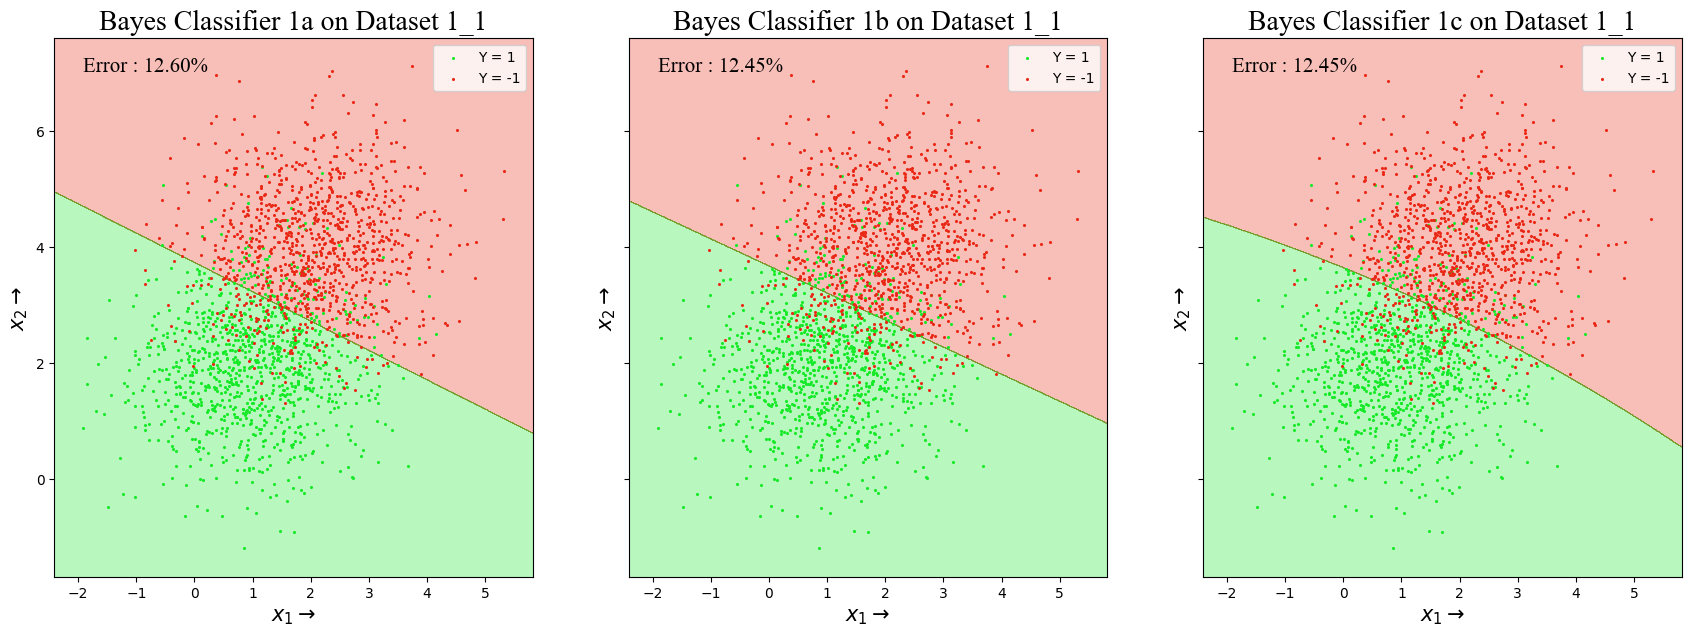

<Figure size 1000x1000 with 0 Axes>

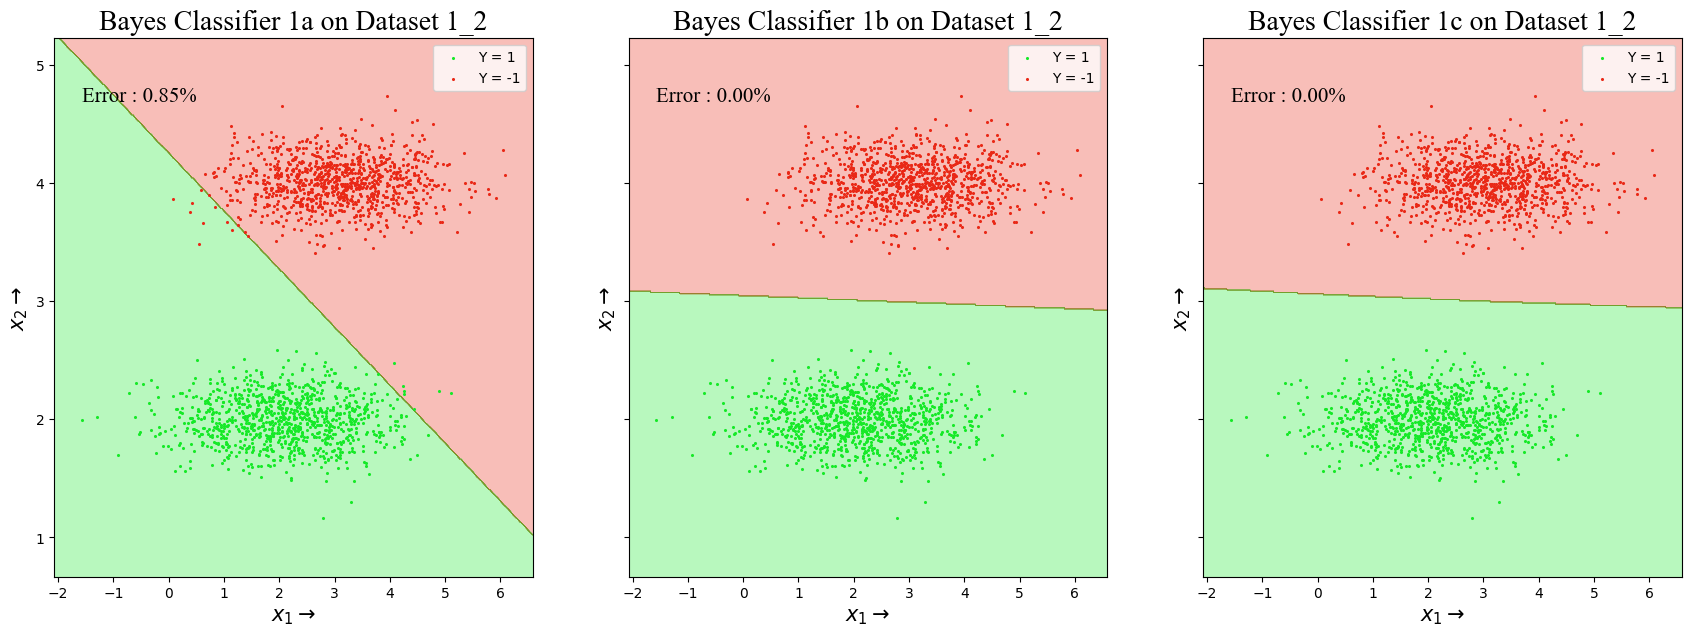

<Figure size 1000x1000 with 0 Axes>

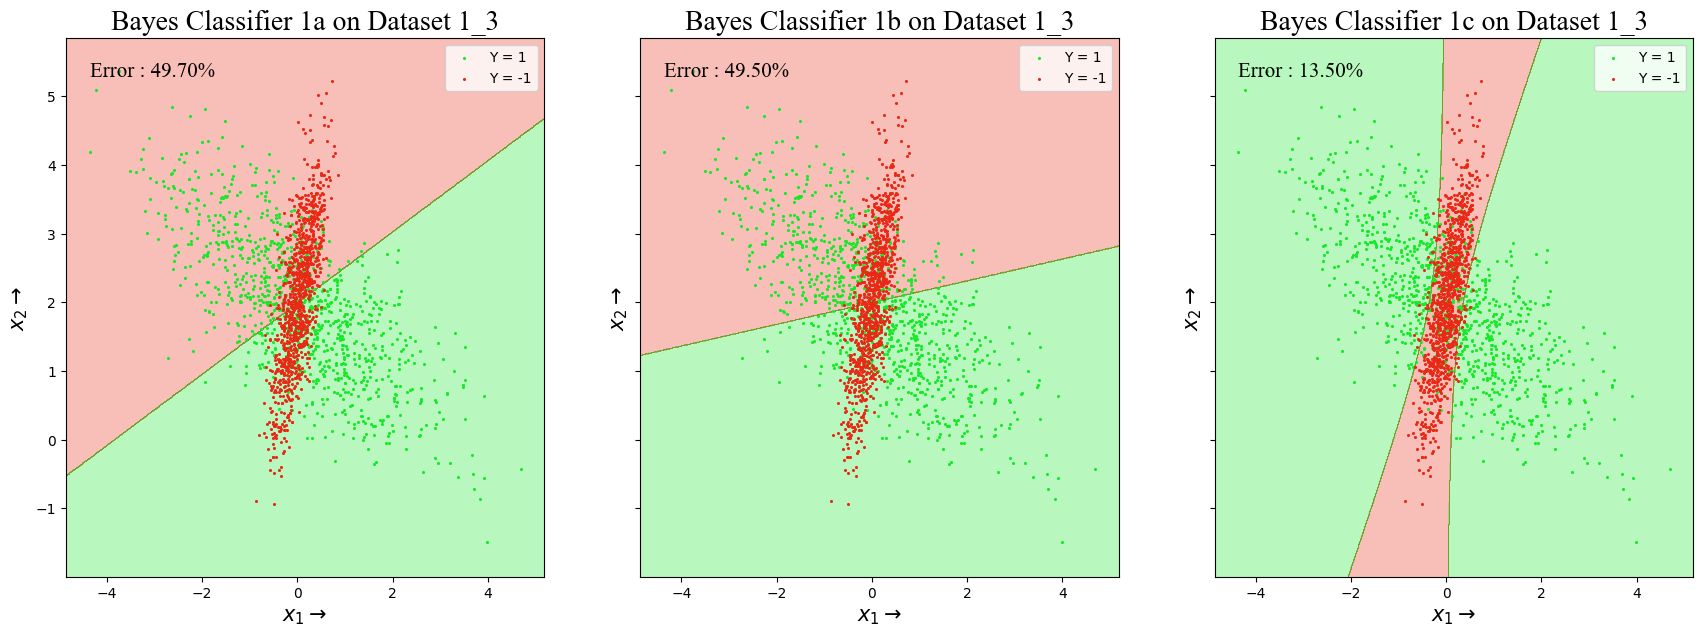

In [6]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

for k in range(3):
    data1_1 = np.load(f'Data/dataset1_{k+1}.npz')
    X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
    Y_preds = [Bayes1a(X_train,Y_train,X_test),Bayes1b(X_train,Y_train,X_test),Bayes1c(X_train,Y_train,X_test)]
    Y_errs = [(1-(np.sum(Y_test==Y_pred)/len(Y_pred)))*100 for Y_pred in Y_preds]
    # print(Y_errs)
    
    X_min = min(X_train[:,0]),min(X_train[:,1])
    X_max = max(X_train[:,0]),max(X_train[:,1])
    # print(X_min)


    X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.01),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.01))
    test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
    col = ['#E92816','#16E928']
    Za = Bayes1a(X_train,Y_train,test_samples)
    Zb = Bayes1b(X_train,Y_train,test_samples)
    Zc = Bayes1c(X_train,Y_train,test_samples)
    zlist = (Za,Zb,Zc)


    plt.figure(figsize=[10,10])
    f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(21,7))
    axlist = (ax1,ax2,ax3)
    
    
    for i,(t,z) in enumerate(zip(axlist,zlist)):
        t.contourf(X,Y,z.reshape(X.shape),colors=col,alpha=0.3)
        t.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=1.5,c=col[1],label='Y = 1')
        t.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=1.5,c=col[0],label='Y = -1')
        t.text(X_min[0],X_max[1],f'Error : {Y_errs[i]:.2f}%', verticalalignment='center', c = 'black', fontsize=15, font='Times New Roman')
        t.set_title(f'Bayes Classifier 1{chr(i+97)} on Dataset 1_{k+1}', font='Times New Roman', fontsize=20)
        t.set_xlabel(r'$x_{1}  \rightarrow$',size=15, font='Times New Roman')
        t.set_ylabel(r'$x_{2}  \rightarrow$',size=15, font='Times New Roman')
        t.legend() 

    plt.show()


---

Observations :


1. The Bayes1a classifier is a linear function of the features.
2. The Bayes1b classifier can handle data for which the class conditonal distributions have a common covariance matrix. That is, given the label, the features are correlated, but the covariance matrix is the same for data from both classes. Therefore, even for this case, the classifier decision is linear with respect to the features.
3. The Bayes1c classifier can handle data for which the class conditional distributions have different covariance matrices. Therefore, the classifier decision boundary could be a non-linear function of the features.
4. In dataset1_1, we see that for each cluster, the datapoints appear to be uncorrelated. Thus, we expect similar performance from all three classifiers, as shown in the plots above.
5. In dataset1_2, the features are correlated, but the datapoints are linearly separable. Bayes1a classifier decision boundary is always perpendicular to the line joining the mean vector of the class conditional distributions. Bayes1b classifier, which also incorporates the covariance of the features is able to separate the data points better, similar to Bayes1c classifier.
6. In dataset1_3, there is no possible linear boundary that can separate the data, and thus Bayes1a and Bayes2b classifiers fail. This can be clearly seen in the error rates for the two classifiers. Bayes1c can model non-linear decision boundaries and is thus able to separate the data points of the two classes.
The error rates (in %) are given in the table below :



Classifier Used | Dataset1_1 | Dataset1_2 | Dataset1_3 
--- | --- | --- | ---
Bayes 1a | 12.6 |  0.85 | 49.7 
Bayes 1b | 12.45 |  0.0 | 49.5
Bayes 1c | 12.45 |  0.0 | 13.5


---


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [46]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    
    L = np.array([[0,1,2,3],
                  [1,0,1,2],
                  [2,1,0,1],
                  [3,2,1,0]])
    
    X_class = [X_train[Y_train==i] for i in range(1,5)]
    # print(X_data[0])

    means = [np.mean(x,axis=0) for x in X_class]
    
    covs = [np.identity(2) for x in X_class]
    
    sigs = np.ones(len(X_class))
    # print(sigs)
    
    Y_olaa = np.zeros(len(X_test))

    for i,x in enumerate(X_test):
        eta = np.array( [ len(X_class[i])*(sigs[i]**(-0.5))*np.exp(-np.matmul(np.transpose(x-means[i]),x-means[i])/2) for i in range(4)] )
        thr = np.matmul(eta.T,L)
        Y_olaa[i] = int(np.argmin(thr)+1)
        
    # v = [len(X_class[i])*(sigs[i]**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-means[i]),np.linalg.inv(covs[i])),X_test[i,:]-means[i])/2) for i in range(4)]
    # Y_olaa = [np.argmin([len(X_class[i])*(sigs[i]**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(x-means[i]),invs[i]),x-means[i])/2) for i in range(4)])+1 for x in X_test]
        
    return Y_olaa
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2,3],
                  [1,0,1,2],
                  [2,1,0,1],
                  [3,2,1,0]])
    
    X_class = [X_train[Y_train==i] for i in range(1,5)]
    # print(X_data[0])

    means = [np.mean(x,axis=0) for x in X_class]
    
    covs = [np.cov(x.T,bias=True) for x in X_class]
    
    cov_avg = np.sum([cov*len(X_class[i]) for i,cov in enumerate(covs)],axis=0)/len(X_train)
    # print(cov_avg)
    
    inv = np.linalg.inv(cov_avg)
    # print(covs)
    
    sig = np.linalg.det(cov_avg)**0.5
    # print(sigs)
    
    Y_olaa = np.zeros(len(X_test))

    for i,x in enumerate(X_test):
        eta = np.array([len(X_class[i])*(sig**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(x-means[i]),inv),x-means[i])/2) for i in range(4)])
        thr = np.matmul(eta.T,L)
        Y_olaa[i] = int(np.argmin(thr)+1)
        
    # v = [len(X_class[i])*(sigs[i]**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-means[i]),np.linalg.inv(covs[i])),X_test[i,:]-means[i])/2) for i in range(4)]
    # Y_olaa = [np.argmin([len(X_class[i])*(sigs[i]**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(x-means[i]),invs[i]),x-means[i])/2) for i in range(4)])+1 for x in X_test]
        
    return Y_olaa

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2,3],
                  [1,0,1,2],
                  [2,1,0,1],
                  [3,2,1,0]])
    
    X_class = [X_train[Y_train==i] for i in range(1,5)]
    # print(X_data[0])

    means = [np.mean(x,axis=0) for x in X_class]
    
    covs = [np.cov(x.T,bias=True) for x in X_class]
    
    invs = [np.linalg.inv(cov) for cov in covs]
    # print(covs)
    
    sigs = [np.linalg.det(cov)**0.5 for cov in covs]
    # print(sigs)
    
    Y_olaa = np.zeros(len(X_test))

    for i,x in enumerate(X_test):
        eta = np.array([len(X_class[i])*(sigs[i]**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(x-means[i]),invs[i]),x-means[i])/2) for i in range(4)])
        thr = np.matmul(eta.T,L)
        Y_olaa[i] = int(np.argmin(thr)+1)
        
    # v = [len(X_class[i])*(sigs[i]**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-means[i]),np.linalg.inv(covs[i])),X_test[i,:]-means[i])/2) for i in range(4)]
    # Y_olaa = [np.argmin([len(X_class[i])*(sigs[i]**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(x-means[i]),invs[i]),x-means[i])/2) for i in range(4)])+1 for x in X_test]
        
    return Y_olaa

def confusion_matrix(Y,Y_pred):
    
    labels = np.unique(Y)
    c_matrix = np.zeros((len(labels),len(labels)))

    for i in range(len(labels)):
        for j in range(len(labels)):
            c_matrix[i][j]  = ((Y==i+1)*(Y_pred==j+1)).sum()

    return c_matrix

def matrix_to_latex(matrix):
    """
    Convert a numpy matrix into LaTeX string format.
    
    Parameters:
        matrix (numpy.ndarray): The input matrix to be converted.
    
    Returns:
        str: LaTeX string representation of the matrix.
    """
    matrix_str = "$\\begin{bmatrix} "
    for row in matrix[:]:
        matrix_str += " & ".join(map(str, row.astype(int))) + " \\\\ "
    matrix_str += "\\end{bmatrix}$"
    return matrix_str


In [29]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


<Figure size 1000x1000 with 0 Axes>

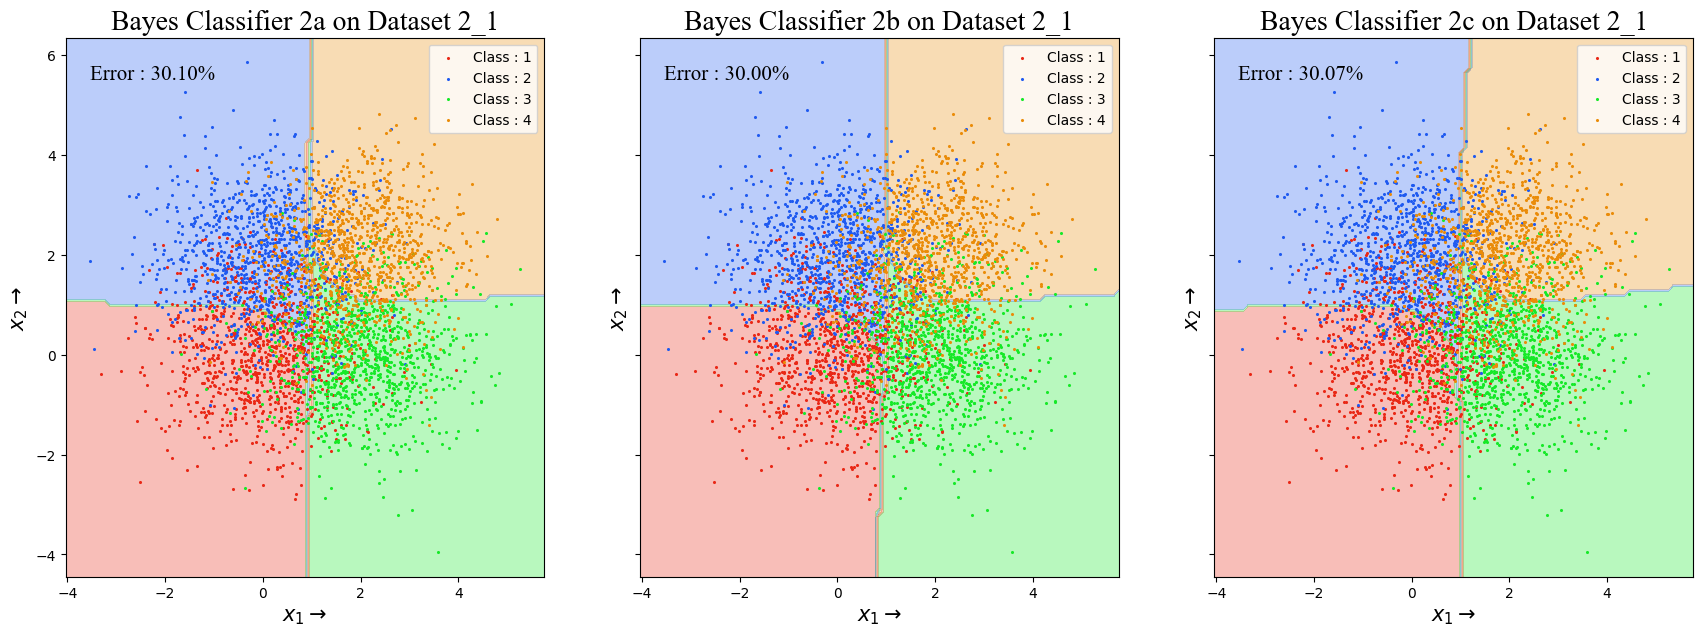

<Figure size 1000x1000 with 0 Axes>

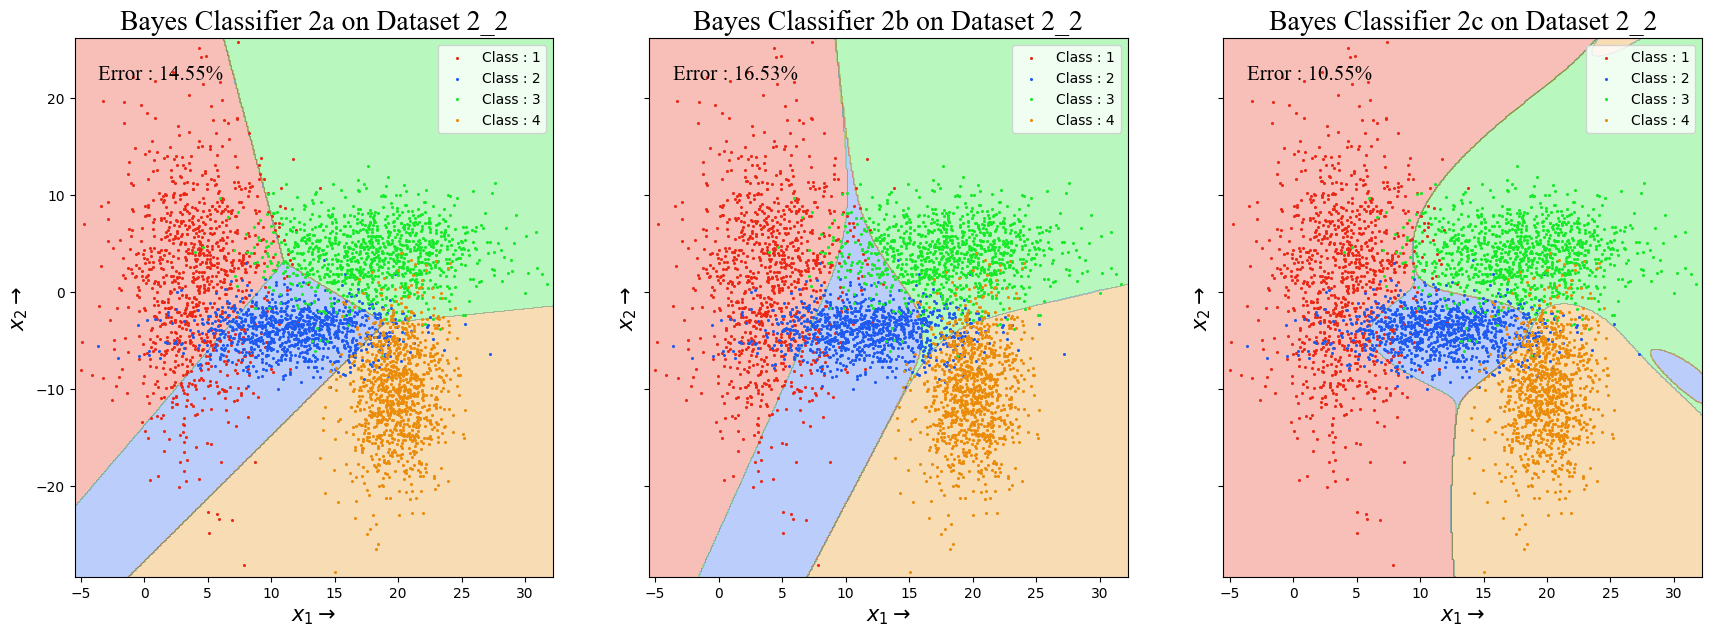

In [59]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

for k in range(2):
    data2 = np.load(f'Data/dataset2_{k+1}.npz')
    X_train, Y_train, X_test, Y_test = data2['arr_0'],data2['arr_1'],data2['arr_2'],data2['arr_3']
    Y_preds = [Bayes2a(X_train,Y_train,X_test),Bayes2b(X_train,Y_train,X_test),Bayes2c(X_train,Y_train,X_test)]
    Y_errs = [(1-(np.sum(Y_test==Y_pred)/len(Y_pred)))*100 for Y_pred in Y_preds]
    # print(C(Y_preds[0]))
    
    X_min = min(X_train[:,0]),min(X_train[:,1])
    X_max = max(X_train[:,0]),max(X_train[:,1])
    # print(X_min)
    # for i, y in enumerate(Y_preds):
        # print(f'{i = }')
        # print(matrix_to_latex(confusion_matrix(Y_test, y)))

    X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.1),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.1))
    test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
    col = ['#E92816','#16E928','#1F5AF0','#EA8C09']
    order = [0,2,1,3]
    Za = Bayes2a(X_train,Y_train,test_samples)
    Zb = Bayes2b(X_train,Y_train,test_samples)
    Zc = Bayes2c(X_train,Y_train,test_samples)
    zlist = (Za,Zb,Zc)


    plt.figure(figsize=[10,10])
    f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(21,7))
    axlist = (ax1,ax2,ax3)
    
    for i,(t,z) in enumerate(zip(axlist,zlist)):
        t.contourf(X,Y,z.reshape(X.shape),colors=col,alpha=0.3)
        for j in range(1,5):
            t.scatter(X_train[Y_train==j][:,0],X_train[Y_train==j][:,1],s=1.5,c=col[order[j-1]],label=f'Class : {j}')
        # t.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=1.5,c=col[0],label='Y = 2')
        t.text(0.05,0.95,f'Error : {Y_errs[i]:.2f}%', verticalalignment='top', c = 'black', fontsize=15, font='Times New Roman', transform=t.transAxes)
        t.set_title(f'Bayes Classifier 2{chr(i+97)} on Dataset 2_{k+1}', font='Times New Roman', fontsize=20)
        t.set_xlabel(r'$x_{1}  \rightarrow$',size=15, font='Times New Roman')
        t.set_ylabel(r'$x_{2}  \rightarrow$',size=15, font='Times New Roman')
        t.legend() 

    plt.show()


---

Observations :
1. The Bayes 2a classifier can handle data that is linearly separable.
2. The Bayes 2b classifier can handle data for which the class conditional distributions (multivariate gaussian) have a common covariance matrix.
3. The Bayes 2c classifier can handle data for which the class conditional distributions can have different covariance matrices. This results in higher flexibility of the model.
4. In case of dataset2_1, the features appear to be uncorrelated given the class. Thus, the decision boundaries of all the three models are very similar. Bayes 2c achieves the least expected loss as expected.
5. In case of dataset2_2, the class conditional distributions have different covariances across different classes.
6. Bayes 2a performs the worst, where the decision boundary between class A and B are dependent only on the direction of the difference between the mean vectors of A and B.
7. Bayes 2b performs at par with Bayes 2a, This is because of the inability to handle different correlation between the features for different classes.
8. Bayes 2c performs the best, as can be seen from the confusion matrix.

The expected loss is given by the following table :

Classifier Used | Dataset2_1 | Dataset2_2  
:--- | --- | --- 
Bayes 2a | 0.301 |    0.1455
Bayes 2b | 0.300 |  0.1653
Bayes 2c | 0.3007 |  0.1055

The Confusion matrices for the three classifiers, evaluated for both the datasets are as follows :

### Dataset 2_1 :

- Confusion matrix for Bayes2a $\rightarrow$ 
$\begin{bmatrix} 633 & 219 & 136 & 12 \\ 97 & 738 & 62 & 103 \\ 86 & 49 & 770 & 95 \\ 15 & 136 & 194 & 655 \\ \end{bmatrix}$
  
- Confusion matrix for Bayes2b $\rightarrow$ 
$\begin{bmatrix} 633 & 218 & 137 & 12 \\ 95 & 743 & 60 & 102 \\ 84 & 49 & 773 & 94 \\ 16 & 137 & 196 & 651 \\ \end{bmatrix}$
 
 
- Confusion matrix for Bayes2c $\rightarrow$ 
$\begin{bmatrix} 635 & 217 & 137 & 11 \\ 99 & 744 & 59 & 98 \\ 88 & 48 & 773 & 91 \\ 15 & 139 & 201 & 645 \\ \end{bmatrix}$
 
### Dataset 2_2 :

- Confusion matrix for Bayes2a $\rightarrow$ 
$\begin{bmatrix} 830 & 150 & 18 & 2 \\ 93 & 784 & 46 & 77 \\ 30 & 61 & 905 & 4 \\ 0 & 23 & 78 & 899 \\ \end{bmatrix}$
 
- Confusion matrix for Bayes2b $\rightarrow$ 
$\begin{bmatrix} 891 & 106 & 3 & 0 \\ 119 & 691 & 124 & 66 \\ 23 & 106 & 864 & 7 \\ 0 & 5 & 102 & 893 \\ \end{bmatrix}$
 
- Confusion matrix for Bayes2c $\rightarrow$ 
$\begin{bmatrix} 937 & 49 & 14 & 0 \\ 96 & 789 & 45 & 70 \\ 24 & 30 & 935 & 11 \\ 0 & 33 & 50 & 917 \\ \end{bmatrix}$

>**Note:** All entries in the confusion matrices have been multiplied by 4000.


---

In [18]:
# Cell type: convenience



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




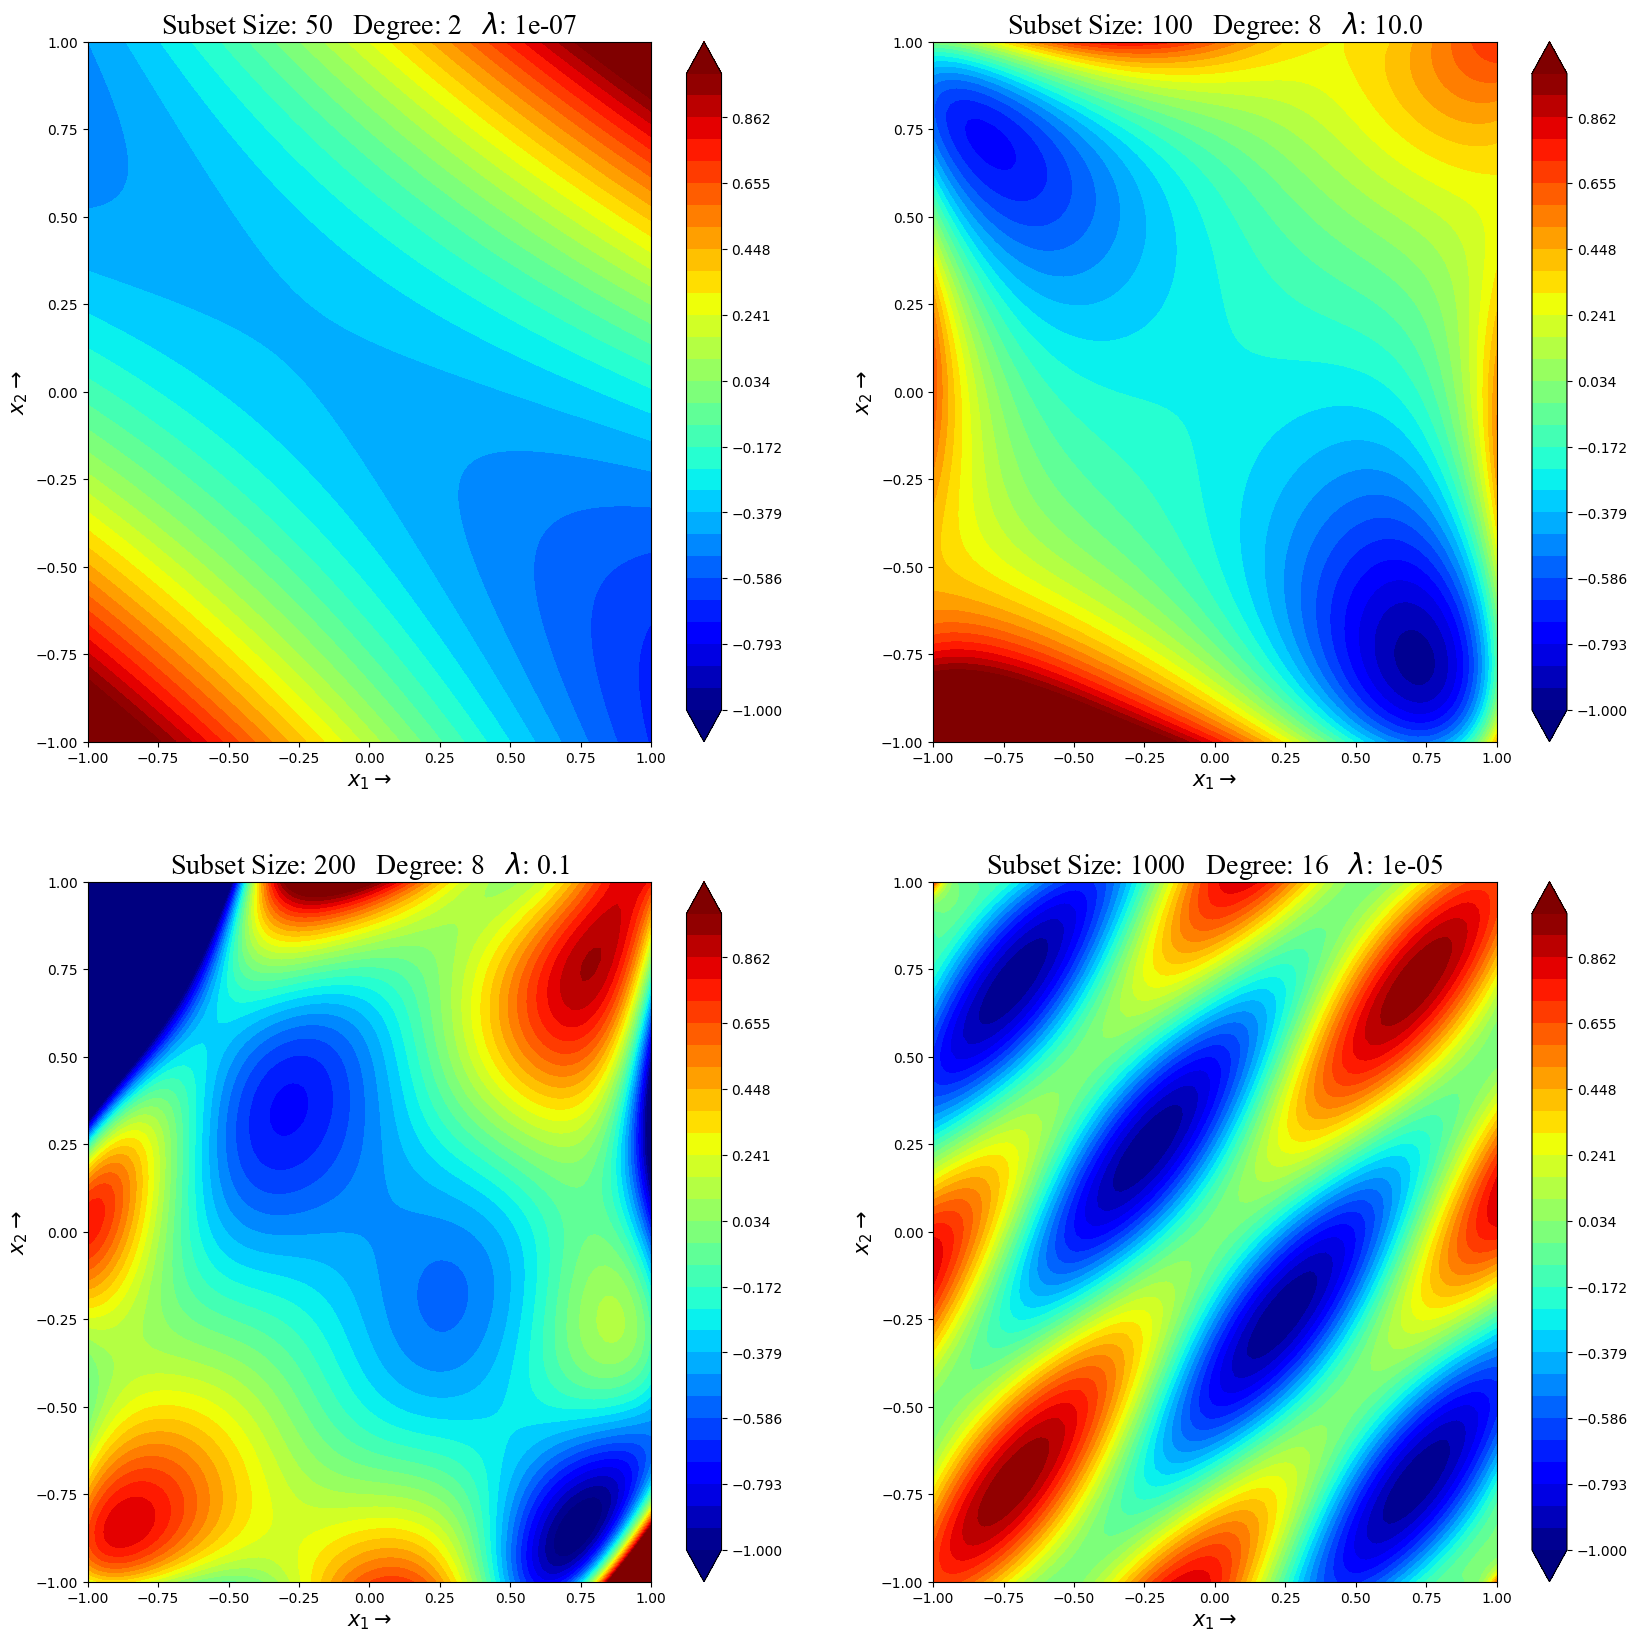

In [56]:
# Cell type : CodeWrite 
def array_to_markdown_table(array, row_labels=None, col_labels=None):
    """
    Converts a numpy array to a Markdown table with labeled rows and columns.
    
    Parameters:
        array (numpy.ndarray): The numpy array.
        row_labels (list): List of labels for rows. If None, row indices will be used.
        col_labels (list): List of labels for columns. If None, column indices will be used.
    
    Returns:
        str: Markdown table representation of the numpy array.
    """
    markdown_table = "|"
    
    # Add column labels
    if col_labels is None:
        col_labels = [f"Column {i + 1}" for i in range(array.shape[1])]
    for label in col_labels:
        markdown_table += f" {label} |"
    markdown_table += "\n|"
    
    # Add column separators
    for _ in range(len(col_labels)):
        markdown_table += " ------ |"
    markdown_table += "\n"
    
    # Add rows with labels
    for i, row in enumerate(array):
        if row_labels is None:
            markdown_table += f"| Row {i + 1} |"
        else:
            markdown_table += f"| {row_labels[i]} |"
        for val in row:
            markdown_table += f" {val:.4f} |"
        markdown_table += "\n"
    
    return markdown_table

def find_poly_alpha(X_train, Y_train, X_test, Y_test, degree, lamb, subset_size):
    
    #Define subset of training data
    sub = np.random.choice(len(X_train),subset_size,replace=False)
    
    X_train_sub = X_train[sub]
    Y_train_sub = Y_train[sub]
    
    # Find alpha and then calculate Y_test_pred
    
    # Find K 
    def lin_kernel(u,v,degree):
        return (u@v.T+1)**degree
    
    K = lin_kernel(X_train_sub,X_train_sub,degree)
    
    alpha = np.linalg.inv(K + lamb*np.identity(len(X_train_sub)))@Y_train_sub
    
    return alpha

def find_poly_pred(X_train, Y_train, X_test, Y_test, degree, lamb, subset_size):
    
    #Define subset of training data
    sub = np.random.choice(len(X_train),subset_size,replace=False)
    
    X_train_sub = X_train[sub]
    Y_train_sub = Y_train[sub]
    
    # Find alpha and then calculate Y_test_pred
    
    # Find K 
    def lin_kernel(u,v,degree):
        return (u@v.T+1)**degree
    
    K = lin_kernel(X_train_sub,X_train_sub,degree)
    
    alpha = np.linalg.inv(K + lamb*np.identity(len(X_train_sub)))@Y_train_sub
    
    Y_test_pred = alpha@lin_kernel(X_train_sub,X_test,degree)
    
    loss = np.mean((Y_test-Y_test_pred)**2)
    # print(f'{subset_size = :>3}  ||  {degree = :>3}  ||  {lamb = :>5}  ||  {loss = :>5}')
    
    return Y_test_pred, loss


data3 = np.load(f'Data/dataset3_1.npz')
X_train, Y_train, X_test, Y_test = data3['arr_0'],data3['arr_1'],data3['arr_2'],data3['arr_3']

training_set_size = [50,100,200,1000]
degrees = [1,2,4,8,16]
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
test_sq_error = np.zeros((len(training_set_size),len(degrees), len(reg_params)))
train_sq_error = np.zeros_like(test_sq_error)
best_algo_indices = np.zeros((len(training_set_size),2))

for i in range(len(training_set_size[:])):

    for d in range(len(degrees)):

        for r in range(len(reg_params)):

            y_train_predicted , train_sq_error[i,d,r] = find_poly_pred(X_train, Y_train, X_train, Y_train, degrees[d], reg_params[r], training_set_size[i])

            y_test_predicted , test_sq_error[i,d,r] = find_poly_pred(X_train, Y_train, X_test, Y_test, degrees[d], reg_params[r], training_set_size[i])
            
    best_algo_indices[i,:] = np.concatenate(np.where(test_sq_error[i,:,:] == np.amin(test_sq_error[i,:,:])))

X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
X_ = X.copy().reshape(-1,1)
Y_ = Y.copy().reshape(-1,1)

X_test = np.hstack((X_,Y_))
# print(X_test)

plt.figure(figsize=(20,20))

for i in range(len(training_set_size)):

    d = int(best_algo_indices[i,0])
    r = int(best_algo_indices[i,1])

    # wt_vector = polynomial_regression_ridge_train(X_train[:training_set_size[i],:], Y_train[:training_set_size[i]], degrees[i1], reg_params[i2])

    Z = find_poly_pred(X_train, Y_train, X_test, Y_test, degrees[d], reg_params[r], training_set_size[i])[0].reshape(100,100)

    title = r"Subset Size: {}   Degree: {}   $\lambda$: {}".format(training_set_size[i], degrees[d], reg_params[int(best_algo_indices[i][1])])
    plt.subplot(2,2,i+1)
    plt.contourf(X,Y,Z,levels=np.linspace(-1,1., 30), cmap='jet', extend='both')
    plt.title(title,font = 'Times New Roman',size = 20)
    plt.xlabel(r'$x_{1}  \rightarrow$',size=15, font='Times New Roman')
    plt.ylabel(r'$x_{2}  \rightarrow$',size=15, font='Times New Roman')
    plt.colorbar()
plt.show()

# for i,v in enumerate(train_sq_error):
#     print(array_to_markdown_table(v,row_labels=[f'Degree {2**i}' for i in range(0,5)],col_labels=np.arange(1,8)))


---

### Dataset Size:	50
		
MSE TRAIN

$\lambda$ $\rightarrow$   |    1e-9 |      1e-7|     1e-5 |    1e-3 |   1e-1 |  1e1
--- | --- | --- |--- |--- |--- |--- 
| Degree 1 | 0.2760 | 0.2562 | 0.2577 | 0.2423 | 0.2453 | 0.2423 |
| Degree 2 | 0.1593 | 0.1519 | 0.1446 | 0.1523 | 0.1820 | 0.2415 |
| Degree 4 | 0.3313 | 0.2132 | 0.1696 | 0.4135 | 0.1525 | 0.2279 |
| Degree 8 | 148.5761 | 83.0401 | 26.5293 | 2.9906 | 0.2142 | 0.1975 |
| Degree 16 | 2805.6735 | 6549.1955 | 121.7599 | 574.9917 | 33.3538 | 1.0500 |

MSE TEST

$\lambda$ $\rightarrow$   |      1e-9 |       1e-7|      1e-5 |   1e-3 |  1e-1| 1e1 
--- | --- | --- |--- |--- |--- |--- 
| Degree 1 | 0.2849 | 0.2883 | 0.2823 | 0.2848 | 0.2690 | 0.2657 |
| Degree 2 | 0.1728 | 0.1596 | 0.1912 | 0.1669 | 0.1816 | 0.2624 |
| Degree 4 | 0.3374 | 0.2427 | 0.1668 | 0.1814 | 0.1508 | 0.2508 |
| Degree 8 | 33.1975 | 82.8237 | 68.9238 | 1.2618 | 0.4058 | 0.2238 |
| Degree 16 | 1127.4252 | 1742.4459 | 647.6687 | 165.8772 | 64.9685 | 2.3901 |

- MSE_train lowest for 	degree: 2 and	$\lambda$: $10^{-05}$
- MSE_test lowest for 	degree: 4 and	$\lambda$: $10^{-01}$

---
### Dataset Size:	100

MSE TRAIN

$\lambda$ $\rightarrow$   |     1e-9 |      1e-7 |     1e-5 |     1e-3 |     1e-1 |      1e1 
--- | --- | --- |--- |--- |--- |--- 
| Degree 1 | 0.2435 | 0.2414 | 0.2540 | 0.2471 | 0.2716 | 0.2427 |
| Degree 2 | 0.1422 | 0.1426 | 0.1497 | 0.1482 | 0.1566 | 0.2395 |
| Degree 4 | 0.1365 | 0.1473 | 0.1565 | 0.1414 | 0.1505 | 0.2174 |
| Degree 8 | 7.2545 | 0.3160 | 0.4623 | 0.4448 | 0.1782 | 0.1793 |
| Degree 16 | 133.0759 | 26.3667 | 21.3968 | 73.9262 | 0.8200 | 0.4775 | 

MSE TEST

$\lambda$ $\rightarrow$   |        1e-9 |       1e-7 |      1e-5 |      1e-3 |    1e-1 |     1e1
--- | --- | --- |--- |--- |--- |--- 
| Degree 1 | 0.2649 | 0.2622 | 0.2693 | 0.2679 | 0.2668 | 0.2642 |
| Degree 2 | 0.1539 | 0.1531 | 0.1474 | 0.1512 | 0.1626 | 0.2626 |
| Degree 4 | 0.1572 | 0.1400 | 0.1494 | 0.1311 | 0.1449 | 0.2358 |
| Degree 8 | 0.5110 | 3.2410 | 0.3285 | 0.1693 | 0.2066 | 0.1927 |
| Degree 16 | 14.7906 | 2008.6066 | 1031.2745 | 9.1813 | 1.2610 | 0.4707 |

- MSE_train lowest for 	degree: 4 and	$\lambda$: $10^{-03}$
- MSE_test lowest for 	degree: 4 and	$\lambda$: $10^{-03}$

---
### Dataset Size:	200

MSE TRAIN

$\lambda$ $\rightarrow$   |      1e-9 |     1e-7 |      1e-5 |     1e-3 |     1e-1 |      1e1
--- | --- | --- |--- |--- |--- |--- 
| Degree 1 | 0.2440 | 0.2430 | 0.2414 | 0.2426 | 0.2425 | 0.2419 |
| Degree 2 | 0.1399 | 0.1486 | 0.1440 | 0.1428 | 0.1470 | 0.2359 |
| Degree 4 | 0.1319 | 0.1341 | 0.1361 | 0.1318 | 0.1365 | 0.2055 |
| Degree 8 | 0.1977 | 0.1252 | 0.1130 | 0.0958 | 0.1185 | 0.1712 |
| Degree 16 | 1.2221 | 0.6254 | 2.0206 | 0.0778 | 0.1334 | 0.3515 |

MSE TEST

$\lambda$ $\rightarrow$   |       1e-9 |      1e-7 |      1e-5 |      1e-3 |     1e-1 |      1e1 
--- | --- | --- |--- |--- |--- |--- 
| Degree 1 | 0.2654 | 0.2623 | 0.2691 | 0.2702 | 0.2721 | 0.2649 |
| Degree 2 | 0.1461 | 0.1455 | 0.1458 | 0.1439 | 0.1521 | 0.2566 |
| Degree 4 | 0.1525 | 0.1369 | 0.1297 | 0.1329 | 0.1463 | 0.2249 |
| Degree 8 | 11.1894 | 0.3319 | 0.2869 | 0.1632 | 0.1267 | 0.1830 |
| Degree 16 | 0.0660 | 2.3539 | 1.5136 | 0.1060 | 0.2182 | 0.1954 | 

- MSE_train lowest for 	degree: 16 and	$\lambda$: $10^{-09}$
- MSE_test lowest for 	degree: 16 and	$\lambda$: $10^{-09}$

---
### Dataset Size:	1000

MSE TRAIN

$\lambda$ $\rightarrow$   |       1e-9 |      1e-7 |      1e-5 |     1e-3 |     1e-1|      1e1 
--- | --- | --- |--- |--- |--- |--- 
| Degree 1 | 0.2407 | 0.2407 | 0.2407 | 0.2407 | 0.2407 | 0.2414 |
| Degree 2 | 0.1388 | 0.1388 | 0.1388 | 0.1388 | 0.1393 | 0.2129 |
| Degree 4 | 0.1250 | 0.1250 | 0.1250 | 0.1250 | 0.1262 | 0.1667 |
| Degree 8 | 0.0767 | 0.0767 | 0.0767 | 0.0770 | 0.0964 | 0.1427 |
| Degree 16 | 0.0002 | 0.0000 | 0.0000 | 0.0012 | 0.0187 | 0.0788 |

MSE TEST	

$\lambda$ $\rightarrow$   |       1e-9 |      1e-7 |     1e-5 |   1e-3 |   1e-1  |  1e1 
--- | --- | --- |--- |--- |--- |--- 
| Degree 1 | 0.2625 | 0.2625 | 0.2625 | 0.2625 | 0.2625 | 0.2635 |
| Degree 2 | 0.1424 | 0.1424 | 0.1424 | 0.1424 | 0.1436 | 0.2314 |
| Degree 4 | 0.1271 | 0.1271 | 0.1271 | 0.1271 | 0.1297 | 0.1784 |
| Degree 8 | 0.0848 | 0.0848 | 0.0848 | 0.0848 | 0.1013 | 0.1531 |
| Degree 16 | 0.0003 | 0.0000 | 0.0013 | 0.0064 | 0.0259 | 0.0869 |

- MSE_train lowest for degree: 16 and $\lambda$: $10^{-07}$
- MSE_test lowest for degree: 16 and $\lambda$: $10^{-07}$

Observations :

1. The optimal values of MSE train and MSE test are marked in bold.
The MSE on the trainset is always the best for λ=1e-9 and polynomial of degree 16. This is because a higher degree polynomial with low regularization will always fit the training data better.
2. Although the training MSE is very low for polynomials of higher degree when the dataset size is small, the test MSE is very high showing the model has just captured all the noise and has not learnt any useful generalization.
Lower degree polynomials with high enough λ do better on a smaller dataset showing they generalize better.
3. When we have higher number of data samples, we can fit higher degree polynomials which also generalize on the dataset.
---

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











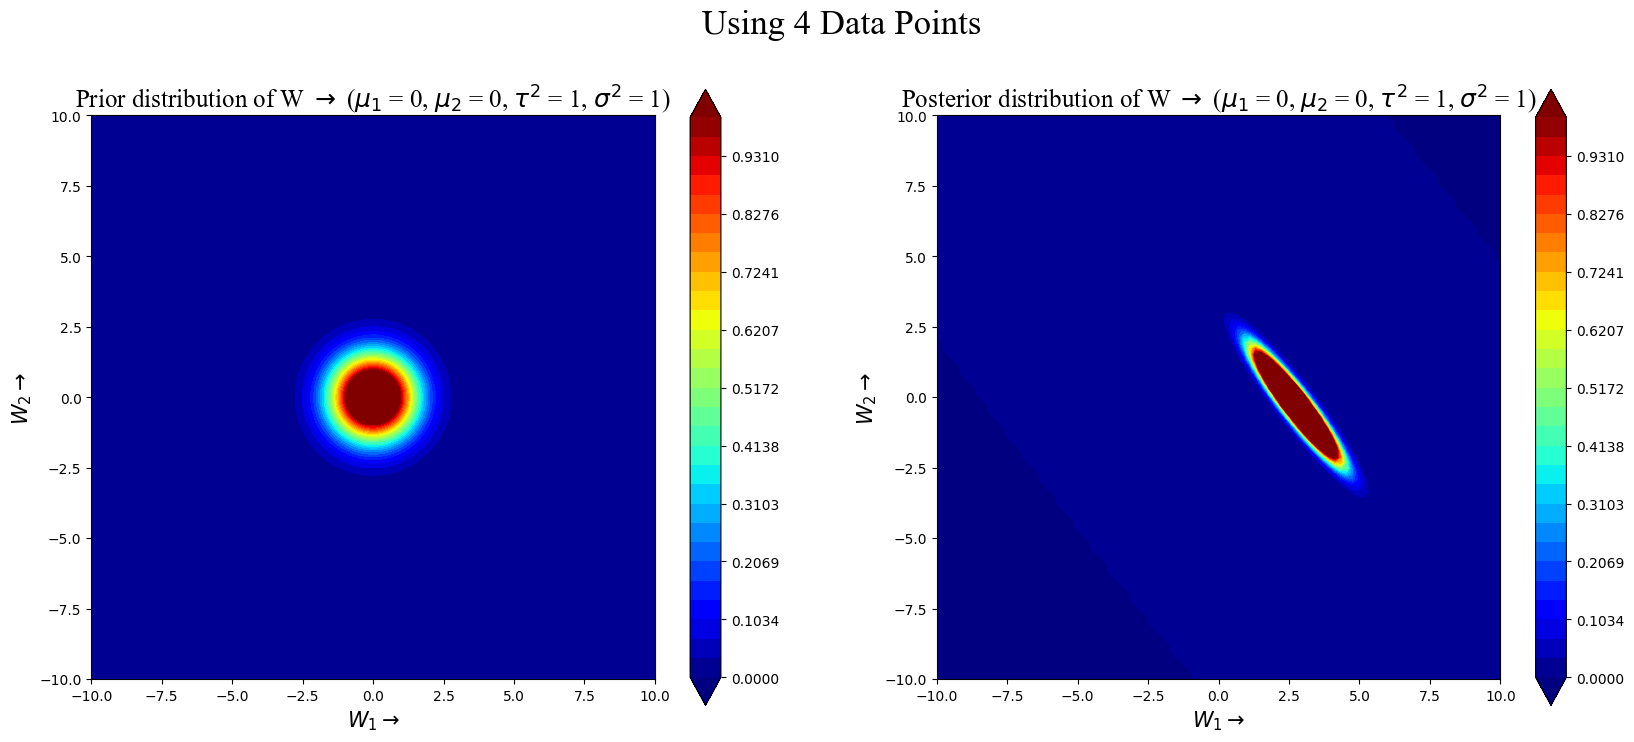

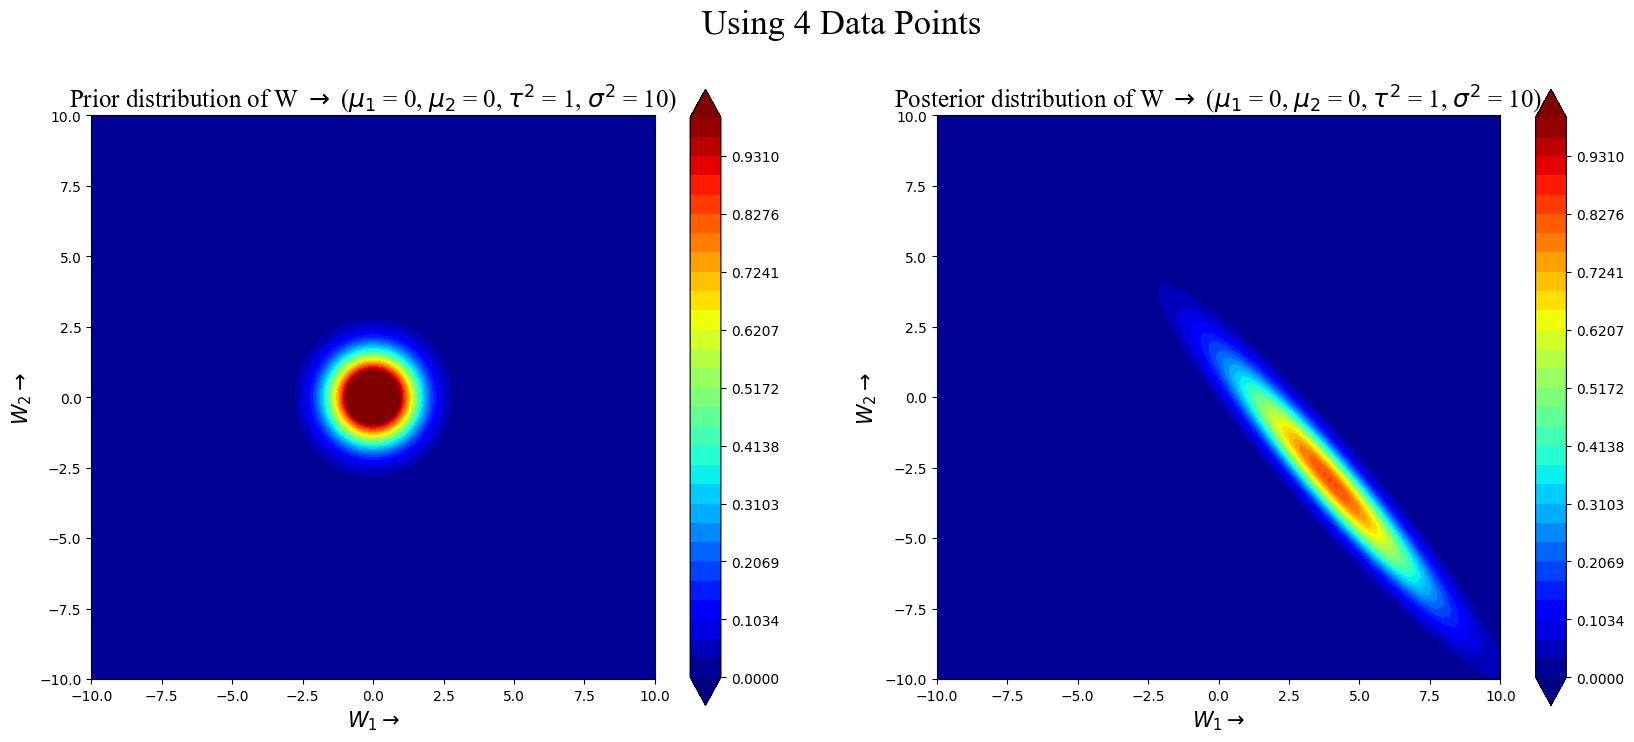

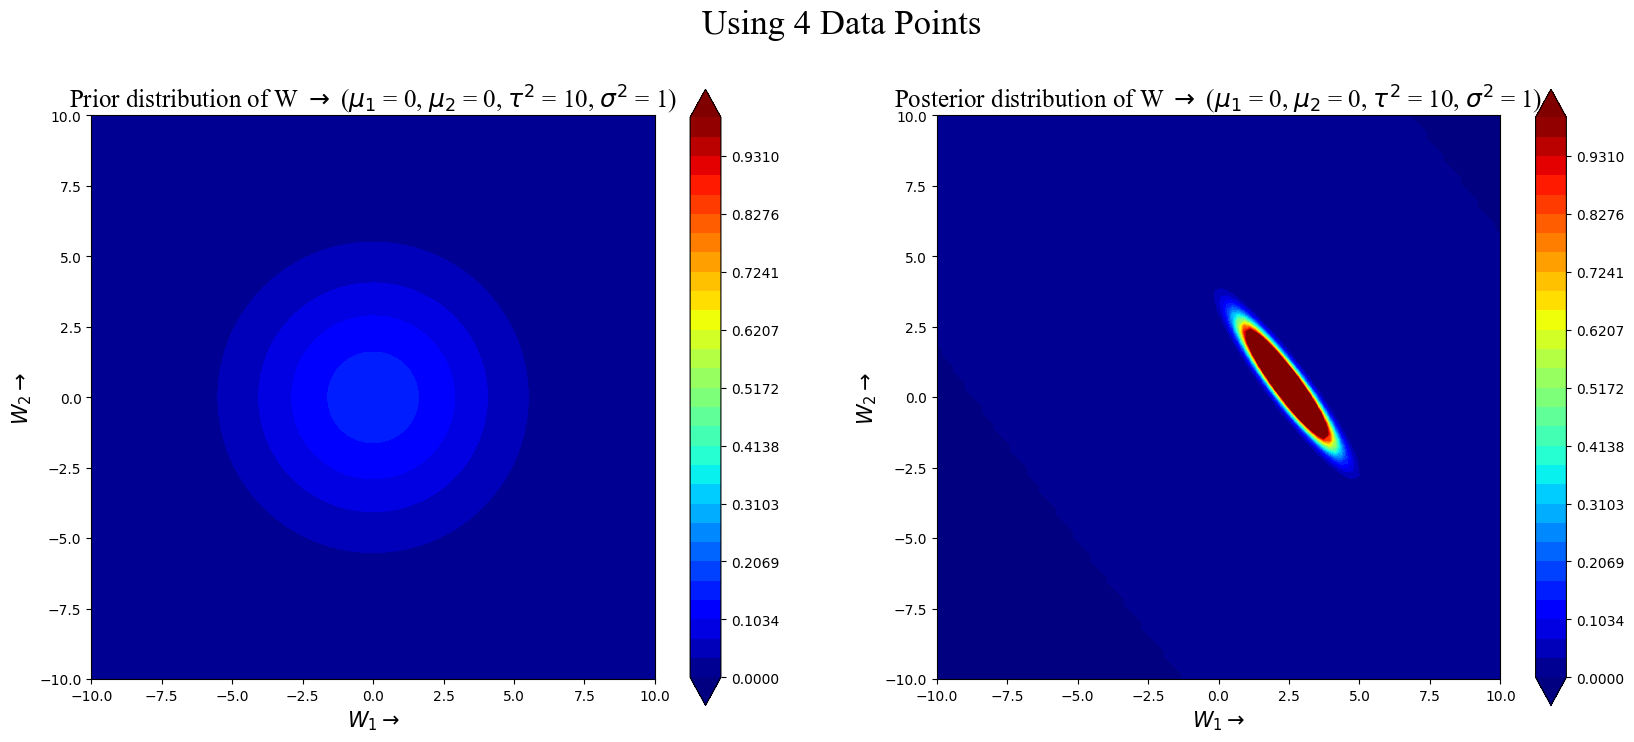

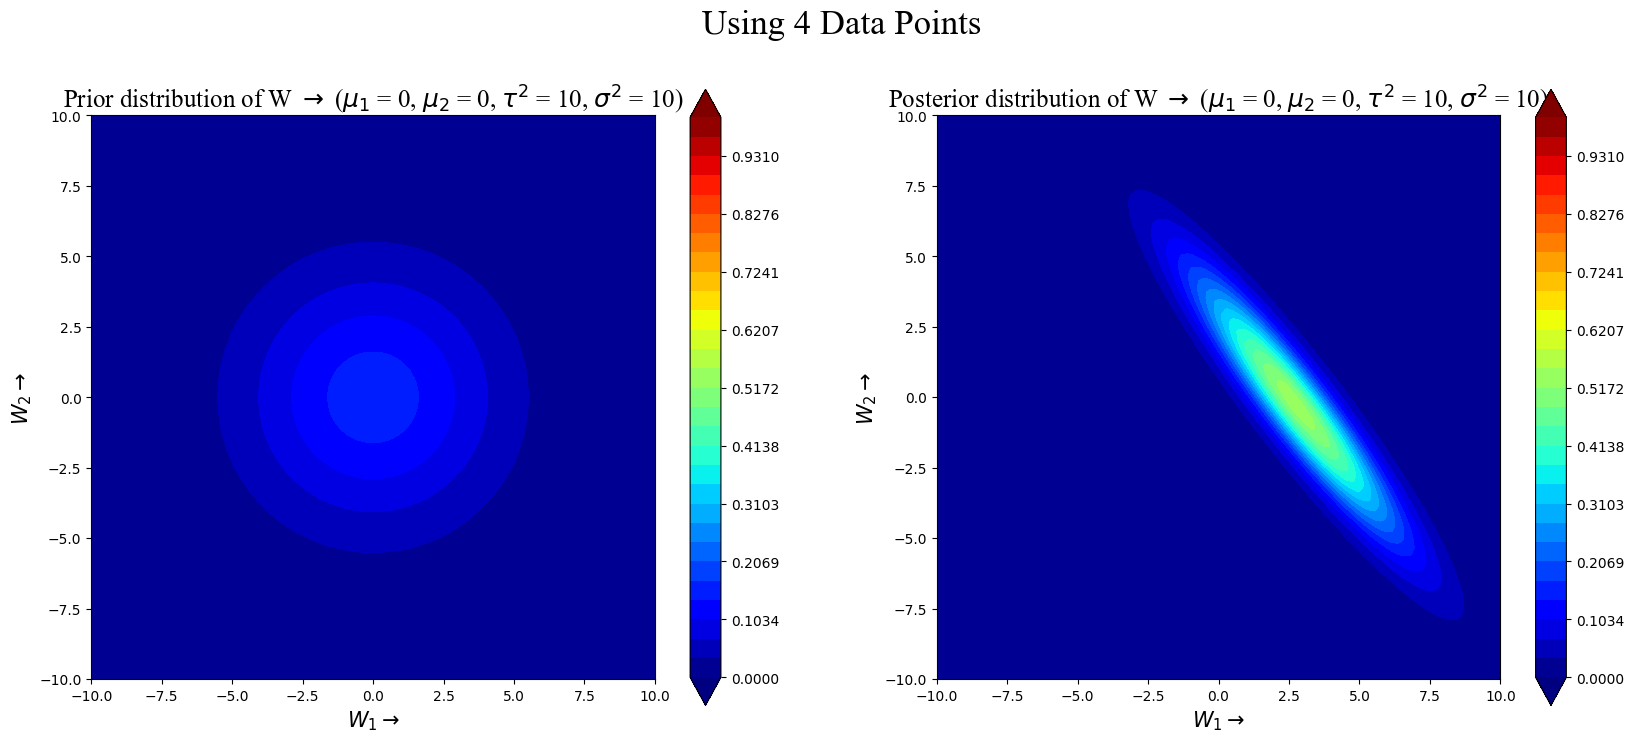

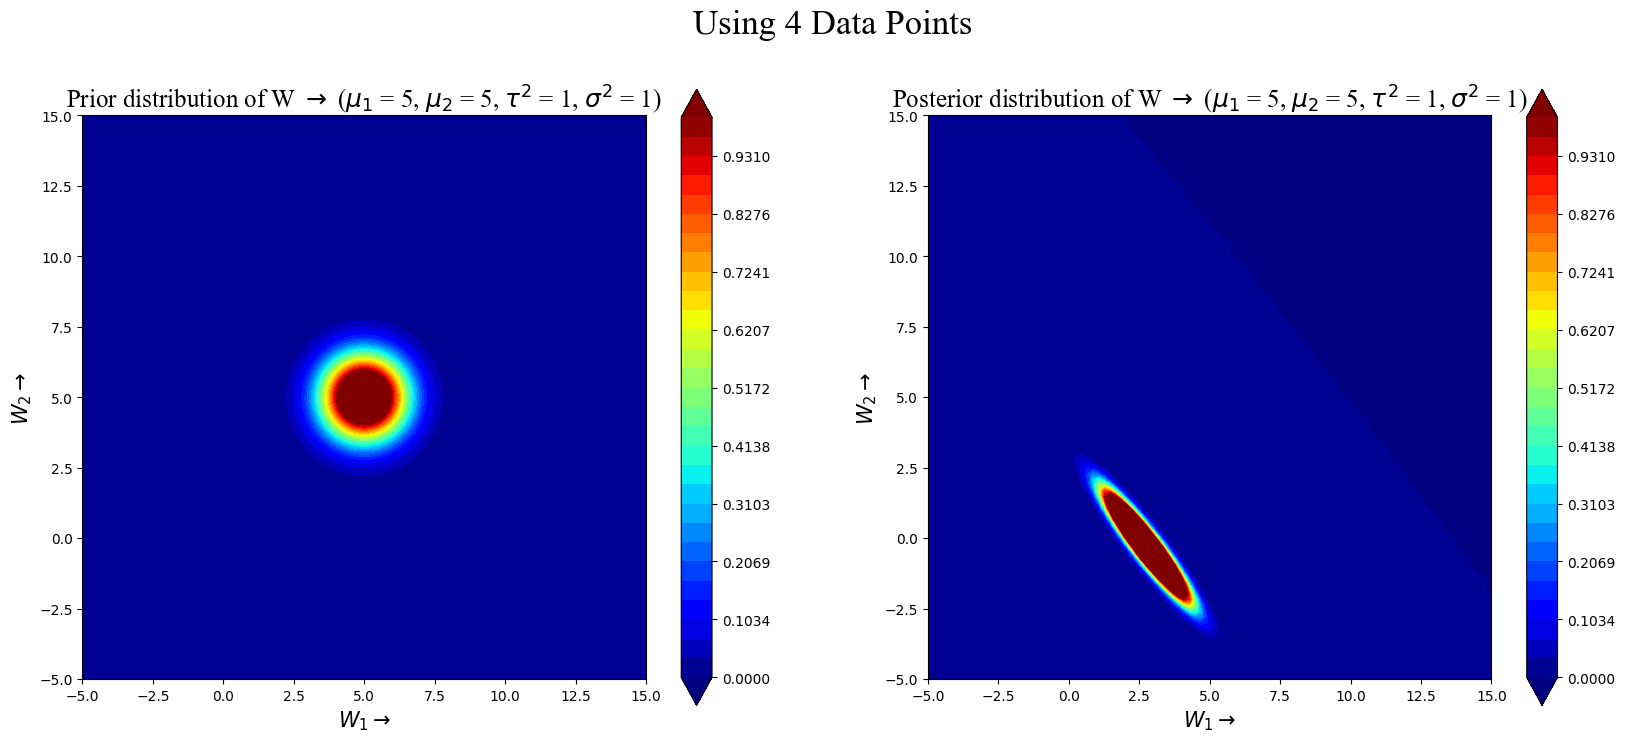

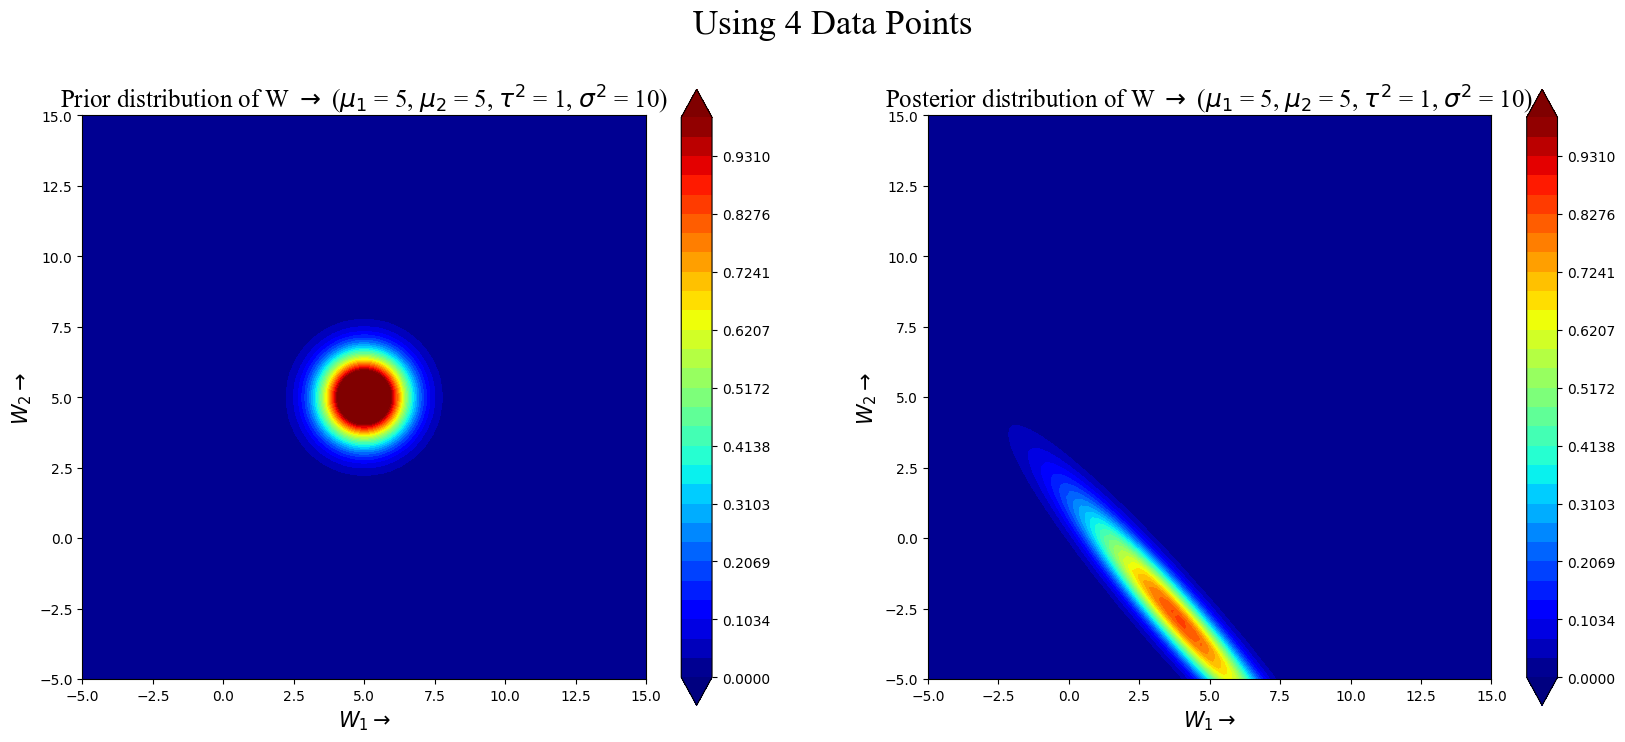

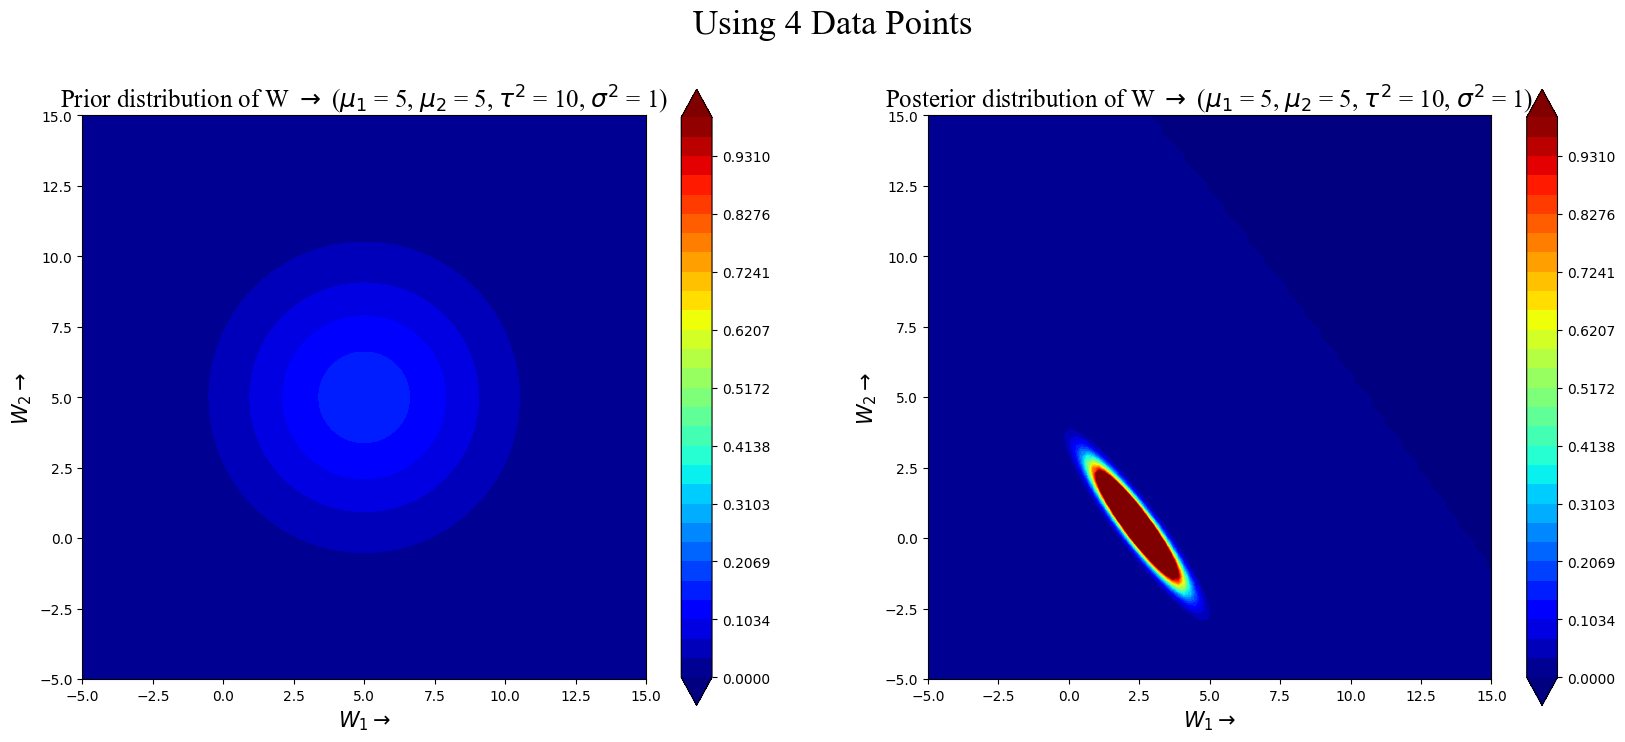

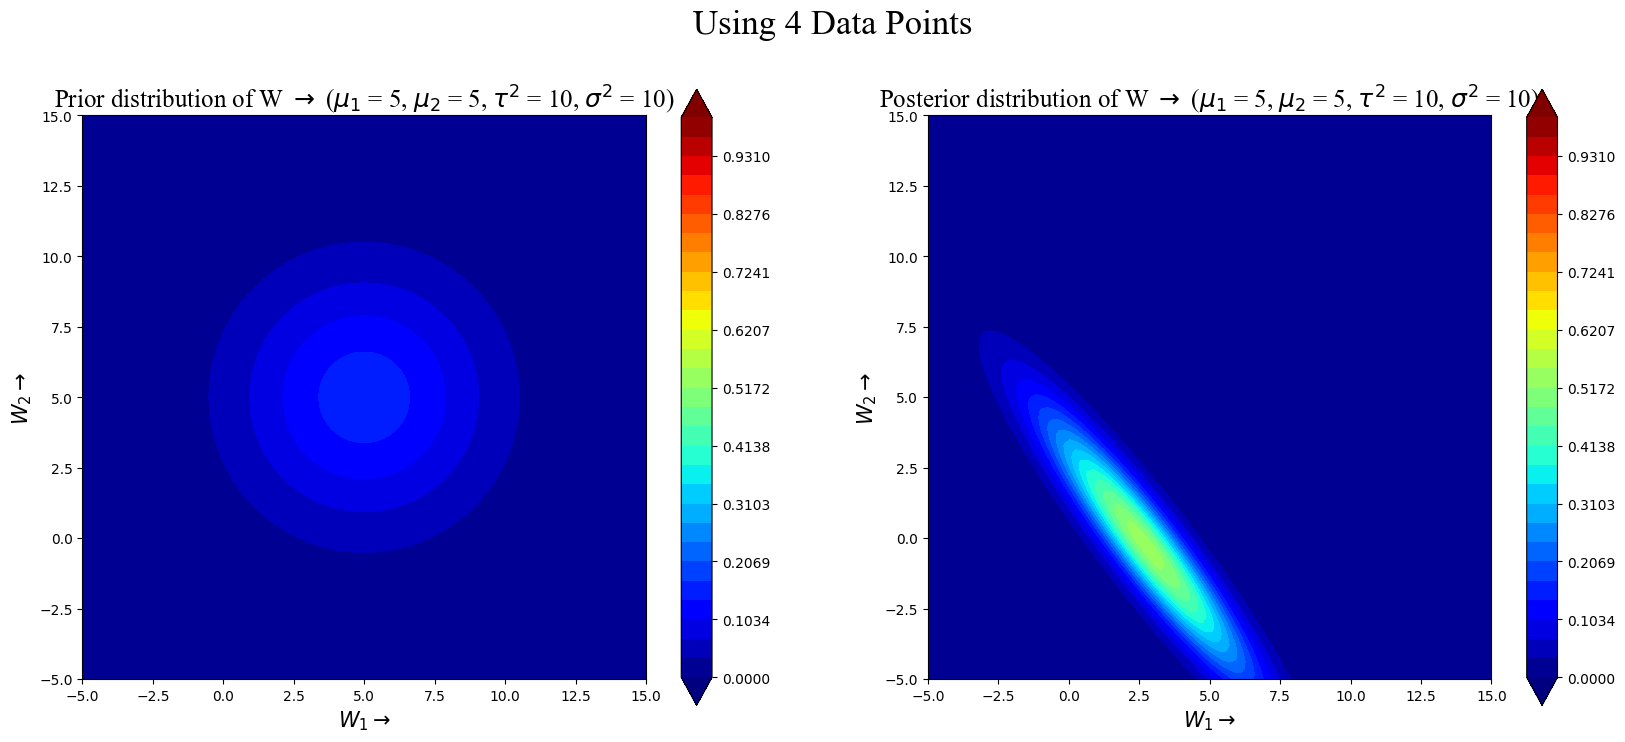

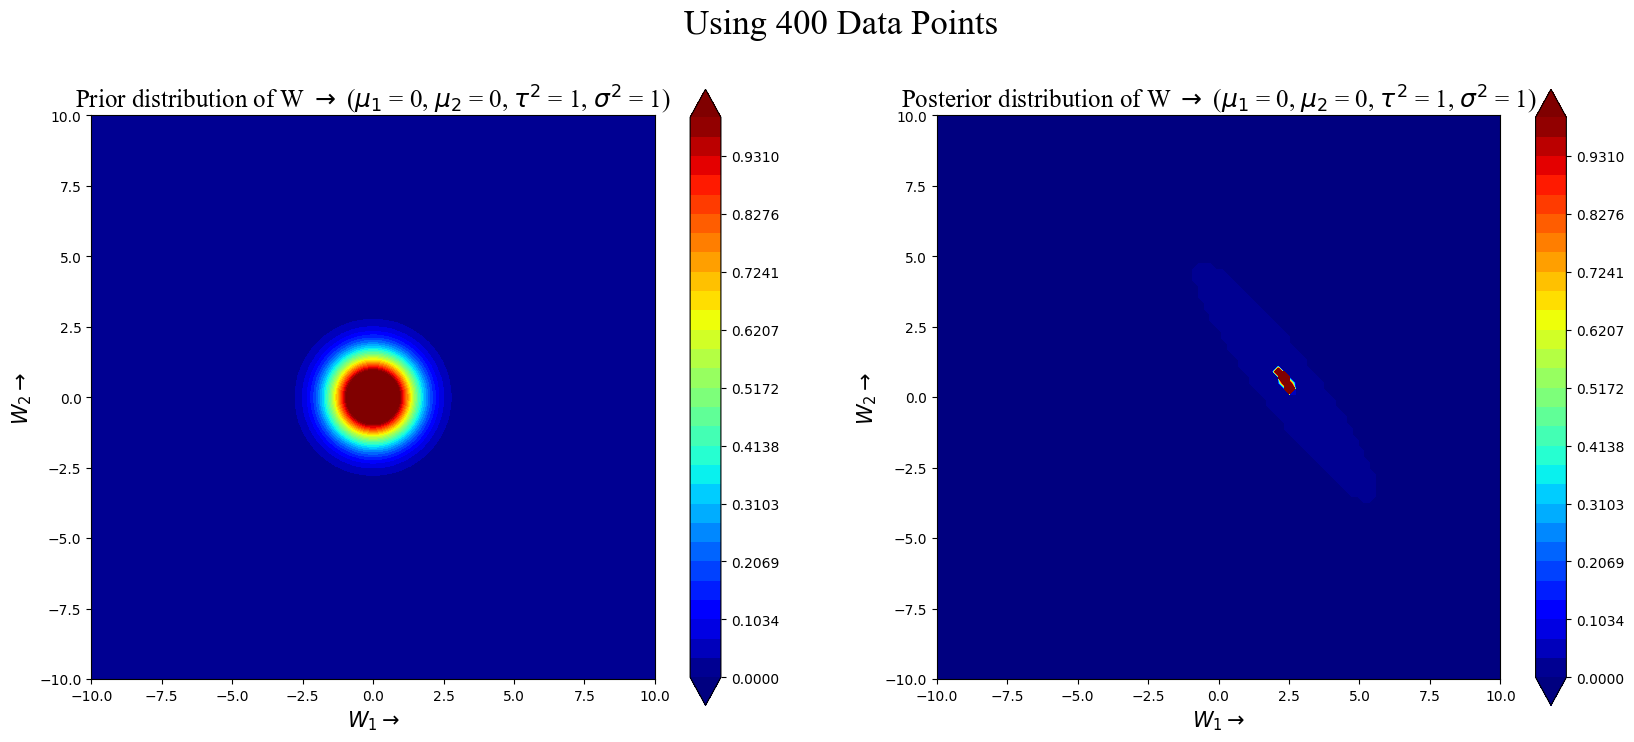

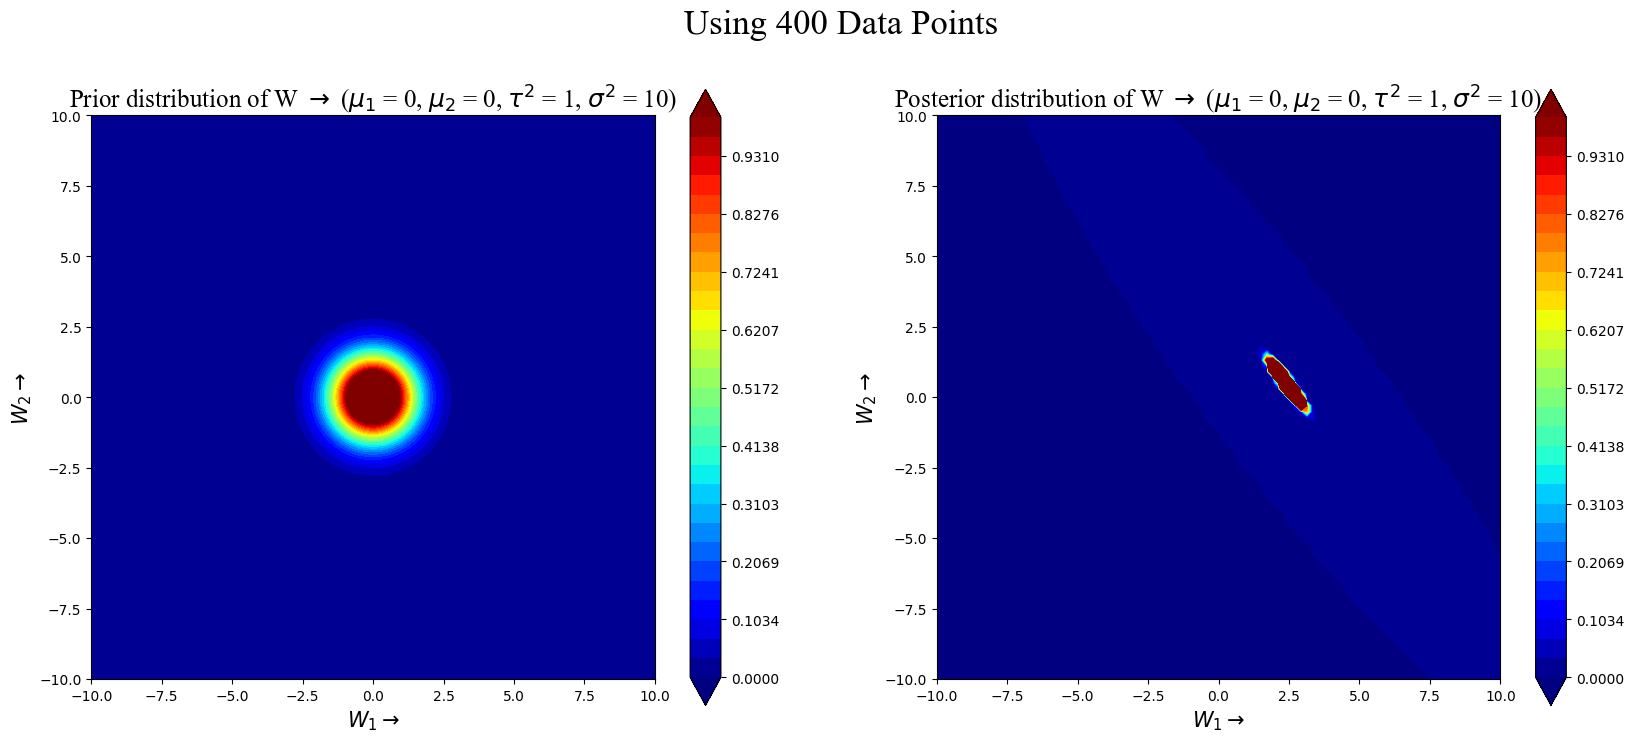

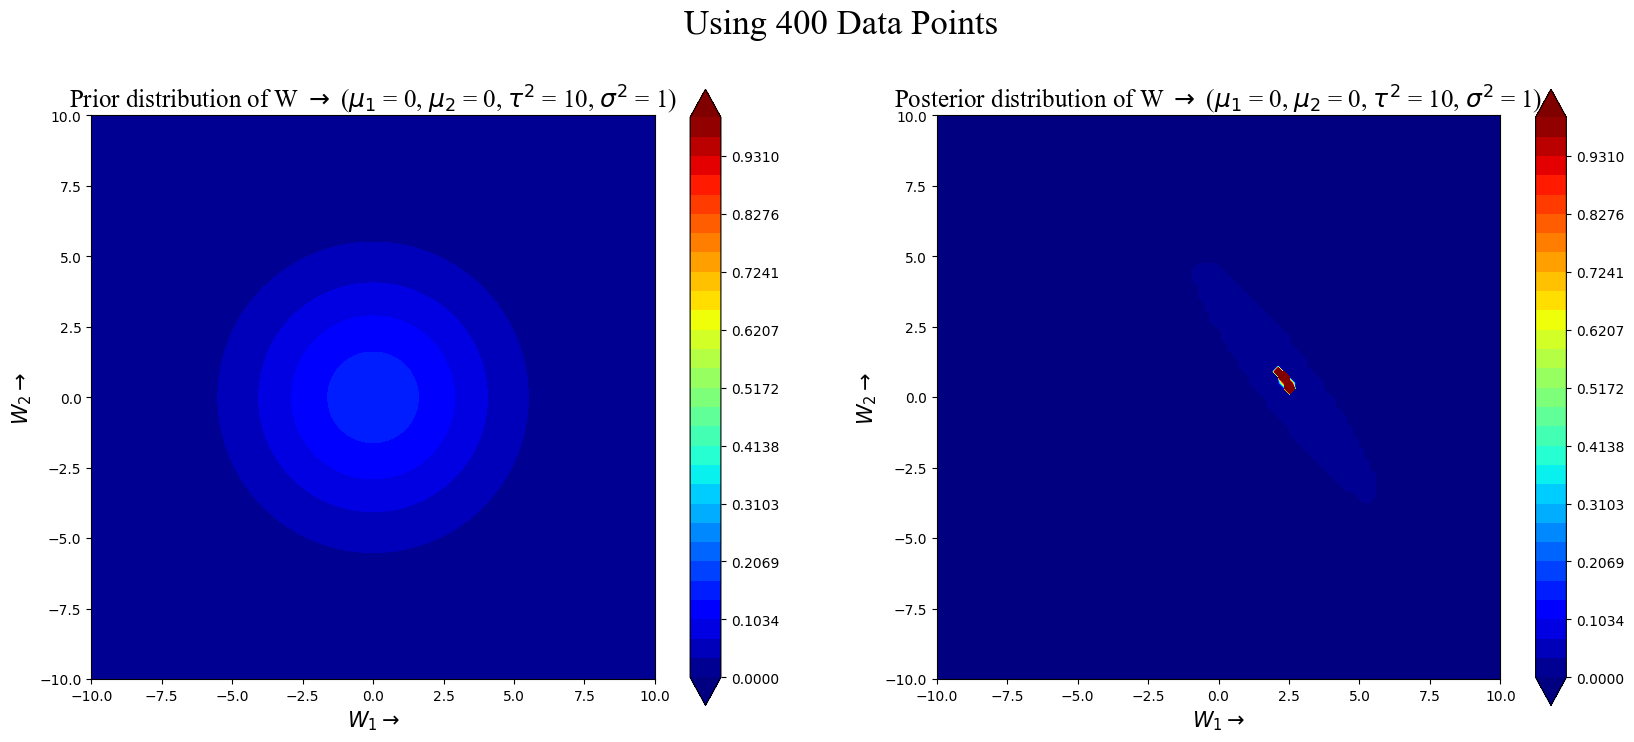

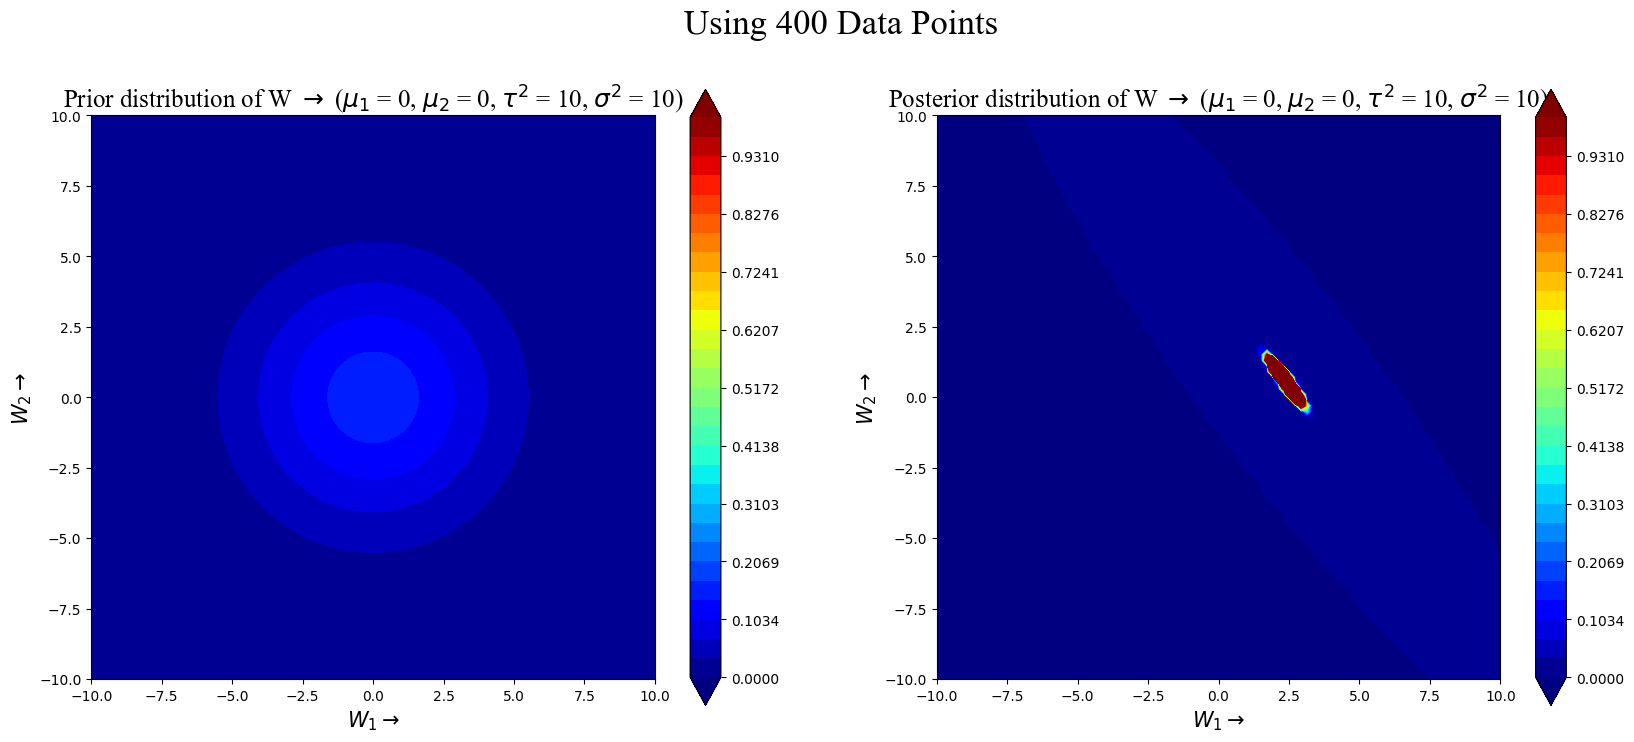

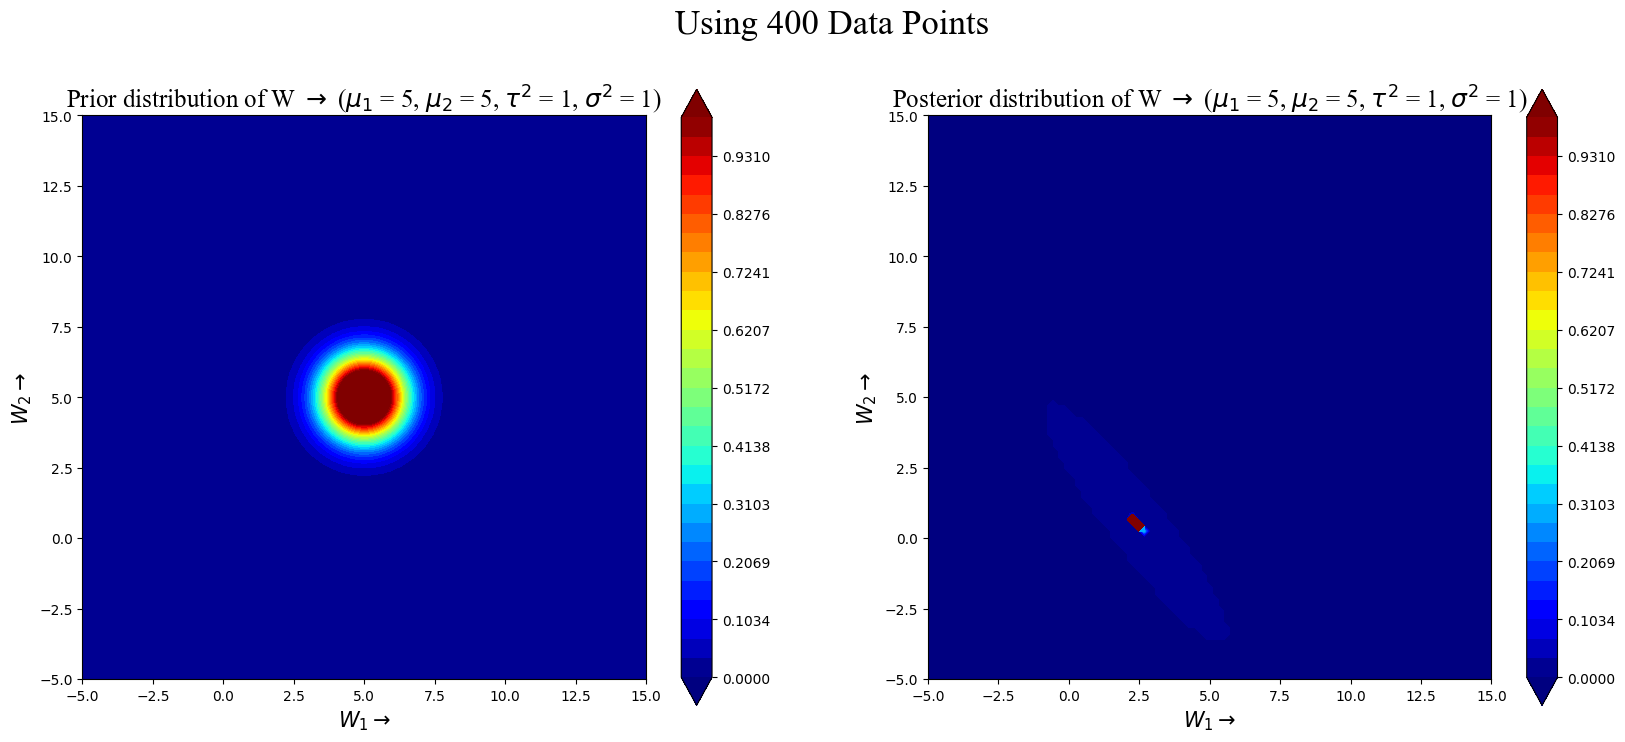

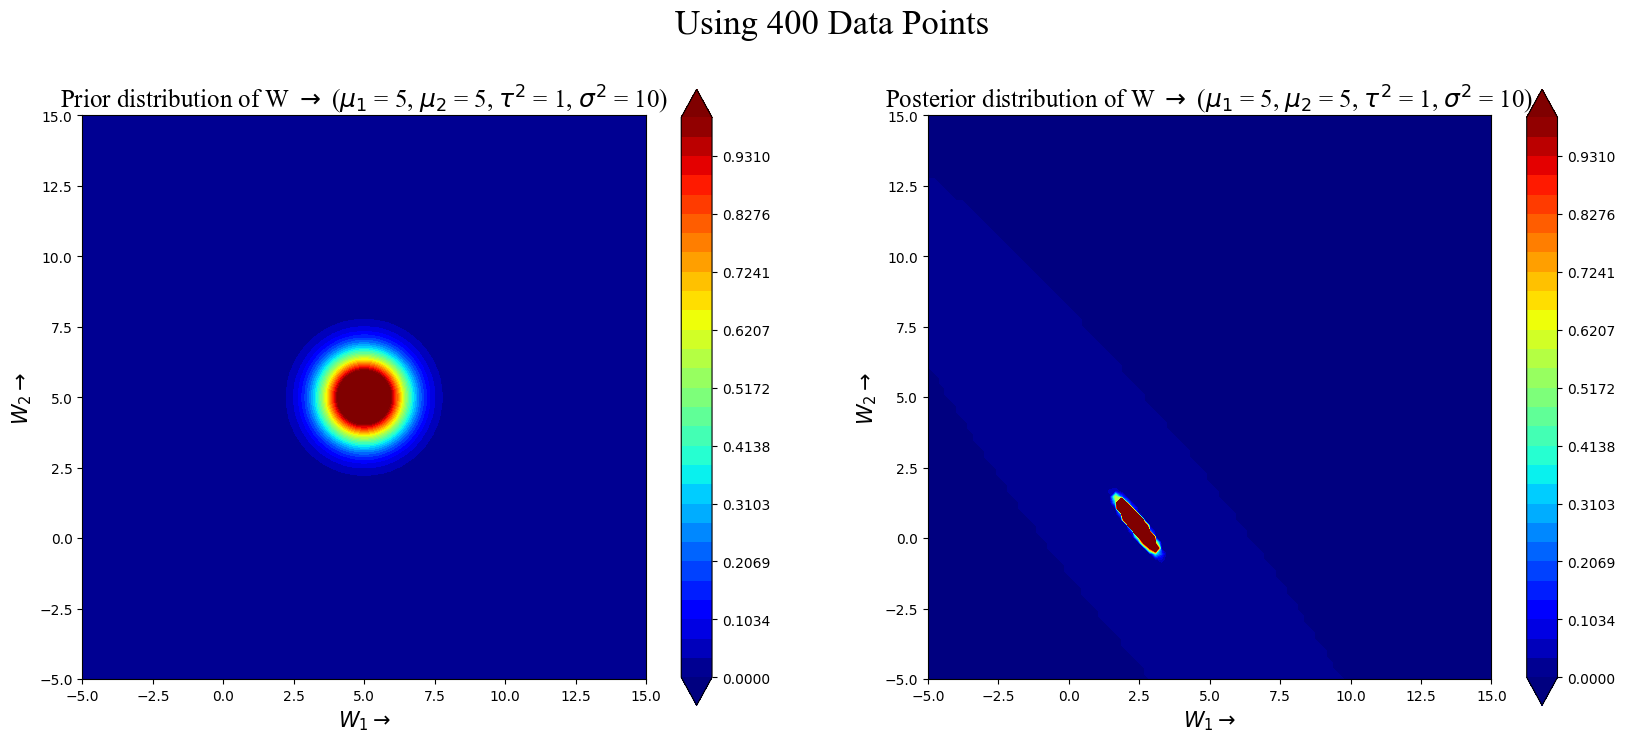

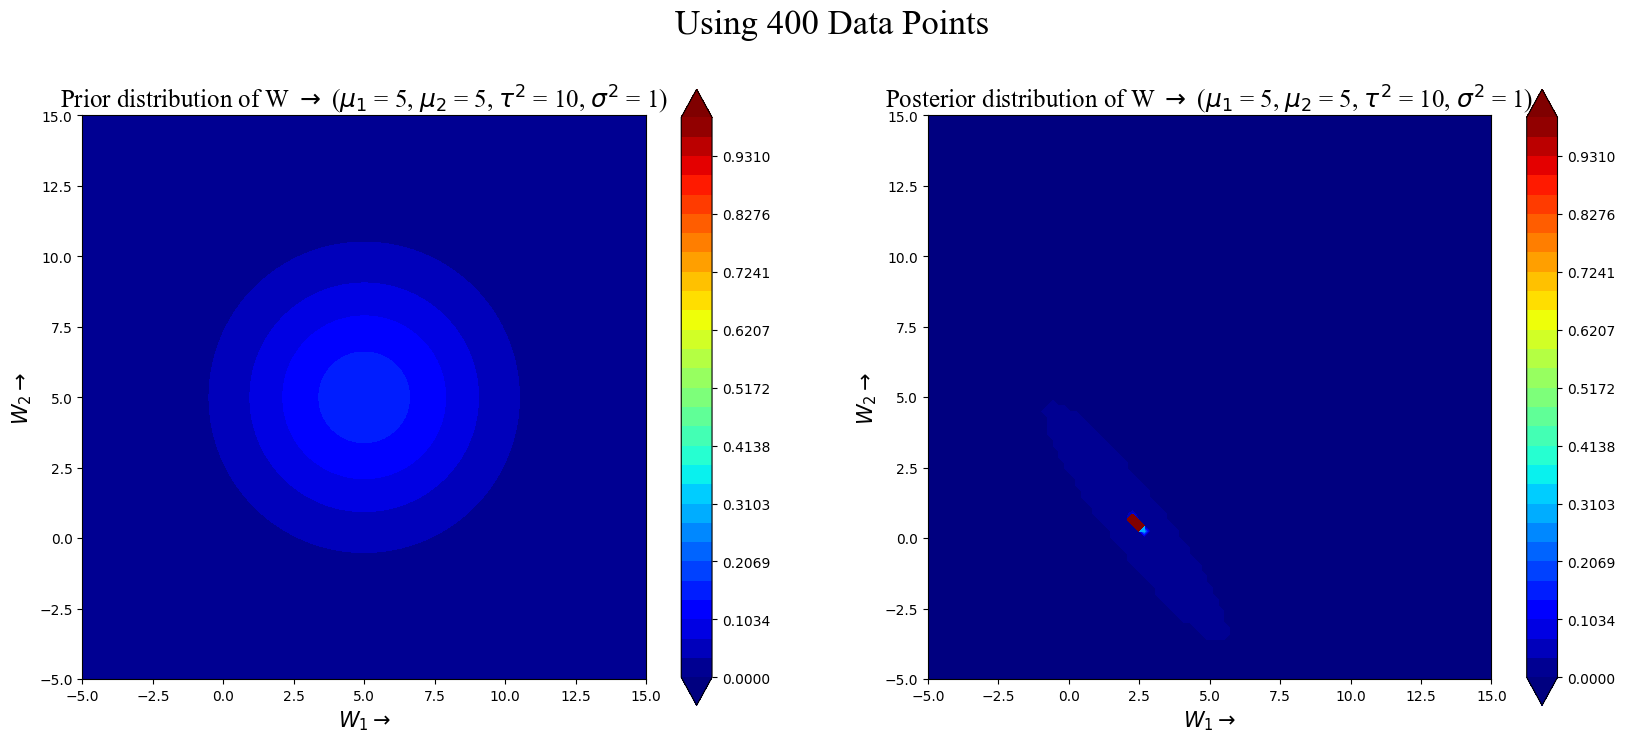

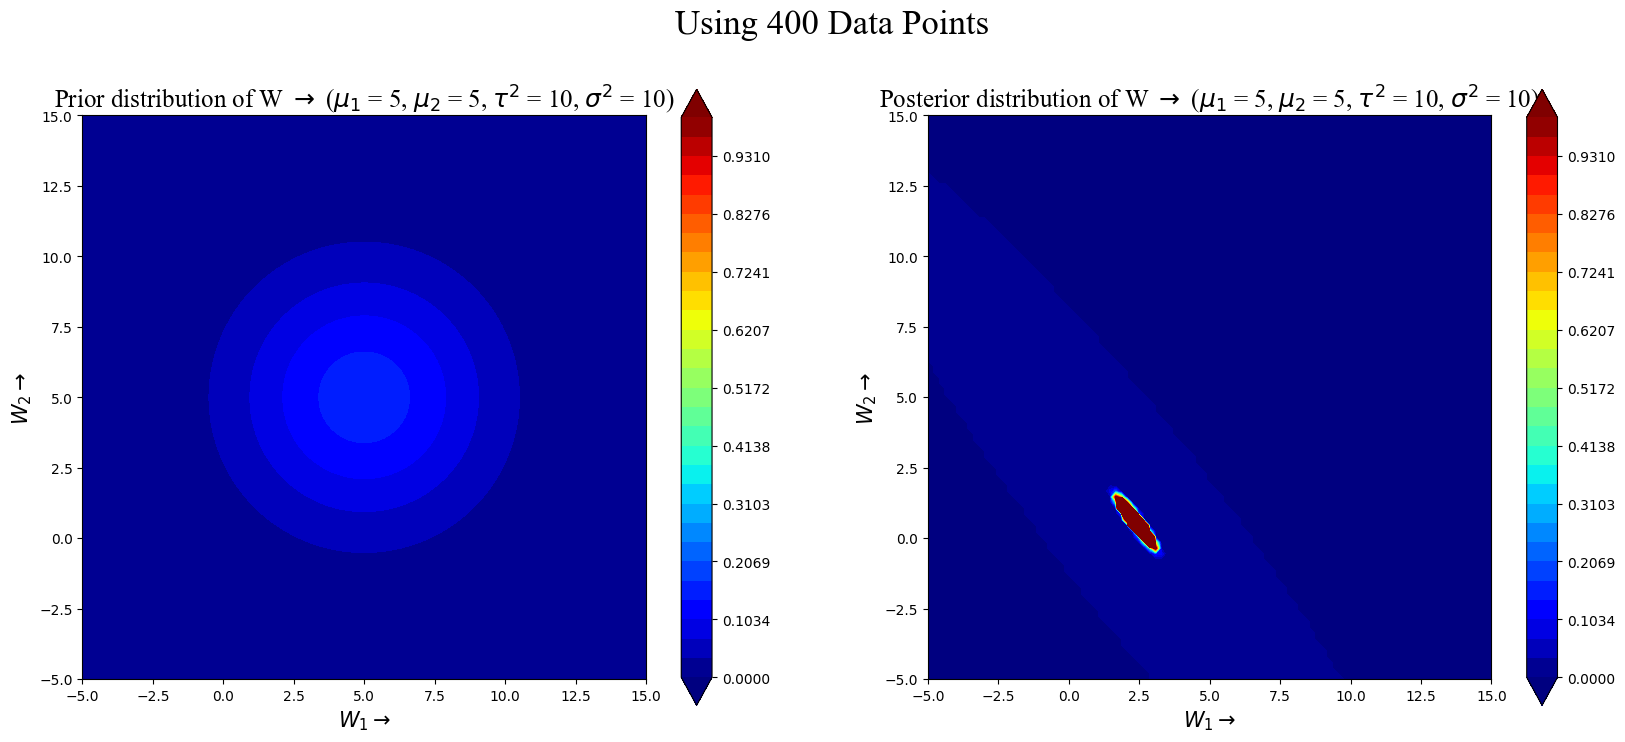

In [11]:
# Cell type : CodeWrite 

X_train = np.array([[1.0, 2.0],
           [2.0, 2.1],
           [0.6, 1.5],
           [1.1, 0.9]
           ])
Y_train = np.array([5.1,
           6.1,
           4.2,
           2.9
           ])

X_train_repeated = np.array(list(X_train)*100)
Y_train_repeated = np.array(list(Y_train)*100)

tau_vals = [1,10]
mu_vals = [0,5]
sig_vals = [1,10]

dim = 100

for X_train, Y_train in zip([X_train,X_train_repeated],[Y_train,Y_train_repeated]):
    for mu in mu_vals:
        for tau in tau_vals:
            for sig in sig_vals:
                plt.figure(figsize=(20,8))

                mesh_x = np.linspace(-10+mu,10+mu,dim)
                mesh_y = np.linspace(-10+mu,10+mu,dim)

                X, Y = np.meshgrid(mesh_x, mesh_y)
                Z = np.zeros((dim,dim))

                covariance_inv_prior = 1/tau*np.eye(2)
                coeff = (np.sqrt(np.linalg.det(covariance_inv_prior)) / 2*round(np.pi,4))

                for x1 in range(dim):
                    for y1 in range(dim):
                        x_mux_y_mux = np.array([mesh_x[x1]-mu,mesh_y[y1]-mu])
                        t1 = (x_mux_y_mux.T@covariance_inv_prior)
                        Z[x1,y1] = coeff * np.exp( t1@x_mux_y_mux /-2 )

                plt.subplot(1,2,1)
                plt.contourf(X,Y,Z,levels=np.linspace(0,1., 30), cmap='jet', extend='both')
                plt.title(r'Prior distribution of W $\rightarrow$ ($\mu_1$ = {}, $\mu_2$ = {}, $\tau^2$ = {}, $\sigma^2$ = {})'.format(mu,mu,tau,sig),font = 'Times New Roman',size = 18)
                plt.colorbar()     
                plt.xlabel(r'$W_1  \rightarrow$',font = 'Times New Roman',size = 15)
                plt.ylabel(r'$W_2  \rightarrow$',font = 'Times New Roman',size = 15)
                plt.gca().set_aspect('equal')

                covariance_inv = X_train.T@X_train/sig + 1/tau
                coeff = (np.sqrt(np.linalg.det(covariance_inv)) / 2*round(np.pi,4))

                mu_post = Y_train.T@X_train@np.linalg.inv(covariance_inv)/sig

                for x1 in range(dim):
                    for y1 in range(dim):
                        x_mux_y_mux = np.array([mesh_x[x1]-mu_post[0],mesh_y[y1]-mu_post[1]])
                        t1 = (x_mux_y_mux.T@covariance_inv)
                        Z[x1,y1] = coeff * np.exp( t1@x_mux_y_mux /-2 )
                        
                plt.subplot(1,2,2)
                plt.contourf(X,Y,Z,levels=np.linspace(0,1., 30), cmap='jet', extend='both')
                plt.title(r'Posterior distribution of W $\rightarrow$ ($\mu_1$ = {}, $\mu_2$ = {}, $\tau^2$ = {}, $\sigma^2$ = {})'.format(mu,mu,tau,sig),font = 'Times New Roman',size = 18)
                plt.colorbar()     
                plt.xlabel(r'$W_1  \rightarrow$',font = 'Times New Roman',size = 15)
                plt.ylabel(r'$W_2  \rightarrow$',font = 'Times New Roman',size = 15)
                plt.gca().set_aspect('equal')
                
                plt.suptitle(f'Using {len(X_train)} Data Points',font = 'Times New Roman',size = 25)
                plt.show()


---

### Observations : 

- The posterior distribution also follows a Gussian distribution.
- We can see that when $\tau^2$ is greater than $\sigma^2$, that is when our confidence on the correctness of the prior is low, the posterior distribution is quite different from the prior distribution, as it depends more strongly on the observed data.
---

**Cell type : TextRead**

# 5. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [4]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100):
    #Arguments:
    #X : (n,d) shape numpy array
    #Y : (n,)  shape numpy array
    #X_test : (m,d) shape numpy array
    #kernel = 'linear' or 'rbf' or 'poly' 
    #reg_param = $\lambda$
    #num_iter_gd = number of GD iterations.

    #Returns the result of kernel logistic regression :
    #alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    #Primal problem:
    #$ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    #the dual of which is

    #$ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    #where $\phi$ is the feature got by the kernel.

    #Where K is the nxn kernel matrix computed on the training data.

    #The kernel is defined by the kernel_param:
    #If kernel=linear: K(\u,\v) = \u^\top \v  
    #If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    #If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)

    n = X.shape[0]
    K = np.zeros([n,n])

    if kernel == 'linear':

      K = linear_kernel(X, X)

    if kernel == 'poly':

      K = polynomial_kernel(X, X, kernel_param, 1)

    if kernel == 'rbf':

      for i in range(n):
        for j in range(n):
          K[i,j] = np.exp(-kernel_param*np.linalg.norm(X[i]-X[j])**2)

    alpha = np.random.randn(n,1)

    learning_rate = 0.01

    sum = np.zeros([n,n])

    for j in range(num_iter_gd):
      p = 0
      for i in range(n):
        s = -Y[i]*np.dot(alpha.T,K[:,i])          
        p += sigmoid(s)*(-Y[i]*K[:,i])
        
      gradient = p.reshape(-1,1) + reg_param*np.dot(K,alpha)
      alpha = alpha - learning_rate*gradient
      
    return alpha

def sigmoid(u):

  if u>=100:

    return 1

  if u<=-100:

    return 0

  return 1/(1+np.exp(-u))

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    
    n_train = train_X.shape[0]
    n_test = test_X.shape[0]
    K = np.zeros([n_train,n_test])

    if kernel == 'linear':

      K = linear_kernel(train_X, test_X)

    if kernel == 'poly':

      K = polynomial_kernel(train_X, test_X, kernel_param, 1)

    if kernel == 'rbf':

      for i in range(n_train):
        for j in range(n_test):
          K[i,j] = np.exp(-kernel_param*np.linalg.norm(train_X[i]-test_X[j])**2)

    
    pred_Y = np.sign(alpha.T@K)
    pred_Y = pred_Y.reshape(-1,1)

    return pred_Y
    
def linear_kernel(X,Y):
    
    K = np.matmul(X,Y.T)
    return K

def polynomial_kernel(X,Y,kernel_param,bias):
        
    K = np.matmul(X,Y.T)
    K = K + bias
    K = np.power(K,kernel_param) 
    return K


In [ ]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 
alph = ['A','B','C','D']

for ok, valll in enumerate(alph):
    data1_1 = np.load('Data/dataset_'+alph[ok]+'.npz')
    X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']

    kernel_param_vals = [1e-3,1e-2,1e-1,1,2,3,4,5]
    reg_param_vals = [1e-3,1e-2,1e-1,1,10,100]
    n1 = len(kernel_param_vals)
    n2 = len(reg_param_vals)

    linear_validation_error = np.zeros((n1,n2))
    poly_validation_error = np.zeros((n1,n2))
    rbf_validation_error = np.zeros((n1,n2))
    X_validation = X_train[:200,:]
    Y_validation = Y_train[:200].reshape(-1,1)

    for i in range(len(kernel_param_vals)):
        # print(f'{i = }')
        for j in range(len(reg_param_vals)):
            # print(j)
            alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

            pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'linear', kernel_param_vals[i])  

            linear_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

            alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

            pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'poly', kernel_param_vals[i])  

            poly_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

            alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

            pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'rbf', kernel_param_vals[i])  

            rbf_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])
        
    linear_optimal_a = np.where(linear_validation_error == np.amin(linear_validation_error))[1][0]
    poly_optimal_kernel_a = np.where(poly_validation_error == np.amin(poly_validation_error))[0][0]
    poly_optimal_reg_a = np.where(poly_validation_error == np.amin(poly_validation_error))[1][0]
    rbf_optimal_kernel_a = np.where(rbf_validation_error == np.amin(rbf_validation_error))[0][0]
    rbf_optimal_reg_a = np.where(rbf_validation_error == np.amin(rbf_validation_error))[1][0]

    print('dataset A',"linear error",linear_validation_error[0,linear_optimal_a],"poly error",poly_validation_error[poly_optimal_kernel_a,poly_optimal_reg_a],"rbf error",rbf_validation_error[rbf_optimal_kernel_a,rbf_optimal_reg_a])
    print('linear-param', reg_param_vals[linear_optimal_a])
    print('poly-param',kernel_param_vals[poly_optimal_kernel_a],reg_param_vals[poly_optimal_reg_a])
    print('rbf-param',kernel_param_vals[rbf_optimal_kernel_a],reg_param_vals[rbf_optimal_reg_a])



---

Percentage errors are shown below.
For linear kernel : 

Dataset | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 0.01 | 16.67 | 16.0
B | 1 | 18.0 | 20.8
C | 0.0001 | 50.2 | 43.2
D | 0.0001 | 43.25 | 23.07

For poly kernel : 

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 3 | 0.001 | 14 | 14.5
B |2 | 0.001 | 15.5 | 16
C |0.0001 | 0.0001 | 49.7 | 48.6
D |0.0001 | 0.0001 | 43.2 | 23.1

For rbf kernel : 

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 1 | 0.0001 | 0.3 | 0.6
B | 4 | 0.001 | 15.5 | 17
C | 0.001 | 0.0001 | 0 | 2.6
D | 0.01 | 0.0001 | 0 | 8.3

**Dataset A** : 
  - This dataset requires a non-linear decision boundary to separate the classes. Hence the linear kernel performs much worse than the other two kernel choices. 
  - For the RBF kernel, the train error and test error are rather small due to the fact that this model can learn highly non-linear decision boundaries. 
  -For the polynomial kernel, it was noticed that even polynomials performed far worse than odd polynomials. This is because the boundary required is (close to) an odd function.

**Dataset B** :
  - For this dataset, a linear boundary is the best that can be done to separate the classes. Thus, all three kernels have comparable performance.
  - The best performing polynomial kernel was one of degree 1, with other degrees sometimes performing much worse.
  -  In general, optimisation was harder, as datapoints belonging to different classes are intermixed and there is no "perfect" solution.

**Dataset C** :
  - Better performance was achieve with non-linear decision boundaries, indicating that the data is not linearly separable by a hyperplane in the 64-dim space.

**Dataset D** :
  - The performance of linear and polynomial kernel was comparable.  

---

<Figure size 1300x800 with 0 Axes>

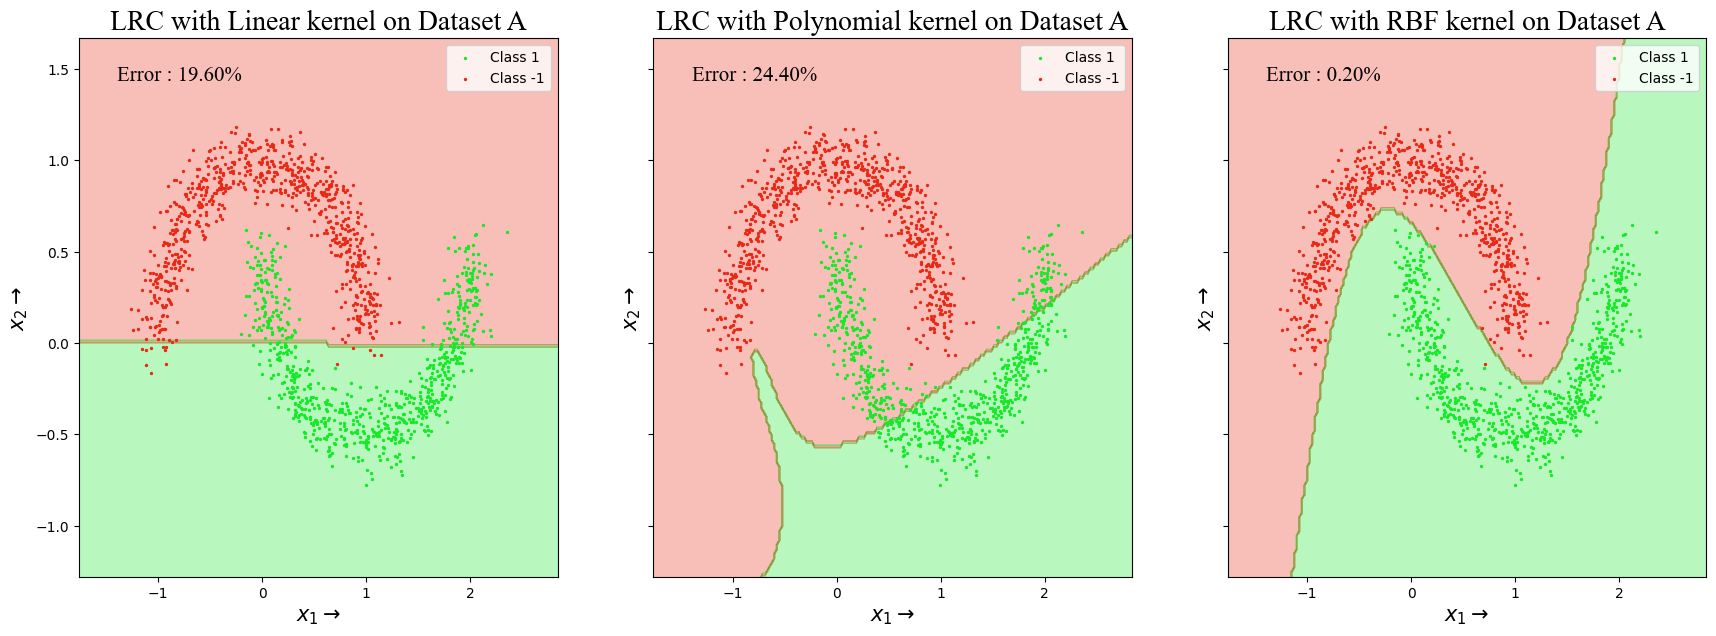

<Figure size 1300x800 with 0 Axes>

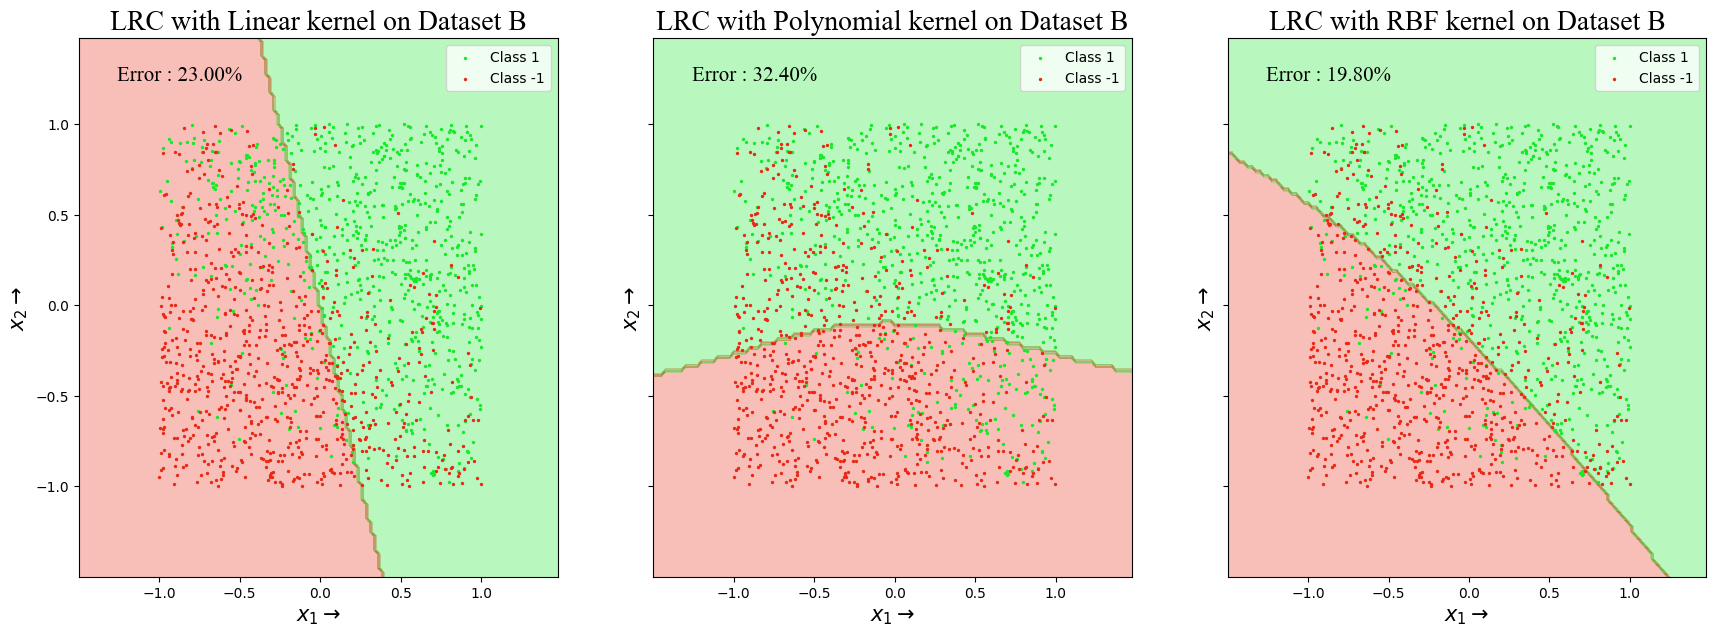

In [48]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
alph = ['A', 'B']
col = ['#E92816','#16E928']
type = ['Linear', 'Polynomial', 'RBF']

for i,a in enumerate(alph):
    data_A = np.load('Data/dataset_'+str(alph[i])+'.npz')
    X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

    X_min = min(X_train[:,0]),min(X_train[:,1])
    X_max = max(X_train[:,0]),max(X_train[:,1])


    X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.025),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.025))
    test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
    
    alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=0.0001, kernel_param=1, num_iter_gd=100)
    pred_y_a = test_pred(alpha, X_train, Y_train, test_samples, kernel='linear',kernel_param= 1)
    pred_Y_test_a = test_pred(alpha, X_train, Y_train, X_test, kernel='linear',kernel_param= 1)
    
    alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=0.001, kernel_param=3, num_iter_gd=100)
    pred_y_b = test_pred(alpha, X_train, Y_train, test_samples, kernel='poly',kernel_param= 3)
    pred_Y_test_b = test_pred(alpha, X_train, Y_train, X_test, kernel='poly',kernel_param= 3)
    
    alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=0.0001, kernel_param=1, num_iter_gd=100)
    pred_y_c = test_pred(alpha, X_train, Y_train, test_samples, kernel='rbf',kernel_param= 1)
    pred_Y_test_c = test_pred(alpha, X_train, Y_train, X_test, kernel='rbf',kernel_param= 1)
    
    pred_y = [pred_y_a,pred_y_b,pred_y_c]
    pred_Y_test = [pred_Y_test_a,pred_Y_test_b,pred_Y_test_c]
    
    Y_errs = [1-np.mean((Y_test.reshape(-1,1))==pred) for i,pred in enumerate(pred_Y_test)]
    # print(Y_errs)

    plt.figure(figsize=(13,8))
    axes = (ax1,ax2,ax3)
    f, axes = plt.subplots(1,3,sharex=False,sharey=True,figsize=(21,7))
    for ind, ax in enumerate(axes):
        ax.contourf(X,Y,pred_y[ind].reshape(X.shape),colors=col, alpha=0.3)
        ax.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c=col[1],label='Class 1')
        ax.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c=col[0],label='Class -1')
        ax.text(0.08,0.93,f'Error : {100*Y_errs[ind]:.2f}%', verticalalignment='center', c = 'black', fontsize=15, font='Times New Roman', transform=ax.transAxes)
        ax.set_title(f'LRC with {type[ind]} kernel on Dataset {alph[i]}', font='Times New Roman', fontsize=20)
        ax.set_xlabel(r'$x_{1}\rightarrow$',size=15)
        ax.set_ylabel(r'$x_{2}\rightarrow$',size=15)
        ax.legend() 
    plt.show()

**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [12]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    tree_dict = dict()
    create_branch(X, Y, tree_dict, criterion, num_nodes_stop, 1)
    return tree_dict

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    Y = np.zeros(len(test_X))
    
    for i, x in enumerate(test_X):
        Y[i] = read_tree(x,tree)
    return Y

def entropy_of_split(X, Y, index, threshold, true_val):
    right_count = 0
    left_count = 0
    right_pl = 0
    left_pl = 0
    
    for x, y in zip(X[:, index], Y[:]):
        if x>=threshold:
            right_count += 1
            if y==true_val:
                right_pl += 1
        else:
            left_count += 1
            if y==true_val:
                left_pl += 1
    if left_count==0 or right_count==0: return 100
    return (right_count*h(right_pl/right_count) + left_count*h(left_pl/left_count))/(left_count+right_count)

def h(p):
    if p==1 or p==0:
        return 0
    return (-p*np.log2(p)) + (-(1-p)*np.log2(1-p))

def accuracy_of_split(X, Y, index, threshold, true_val):
    right_count = 0
    left_count = 0
    right_pl = 0
    left_pl = 0
    
    for x, y in zip(X[:, index], Y[:]):
        if x>=threshold:
            right_count += 1
            if y==true_val:
                right_pl += 1
        else:
            left_count += 1
            if y==true_val:
                left_pl += 1
                
    return ((left_count-left_pl) + (right_pl)) / (right_count+left_count)

def comparer(X, Y, index, threshold, true_val, method):
    if method == 'entropy':
        return -entropy_of_split(X, Y, index, threshold, true_val)
    else:
        temp = accuracy_of_split(X, Y, index, threshold, true_val)
        return max(temp, 1-temp)
    
def data_splitter(X, Y, index, threshold):
    X_left = X[X[:,index]<threshold]
    Y_left = Y[X[:,index]<threshold]
    X_right = X[X[:,index]>=threshold]
    Y_right = Y[X[:,index]>=threshold]
    
    return X_left, Y_left, X_right, Y_right

def branch(X, Y, method):
    max_compare = -10
    optimal = [-1,-1,-1]
    for index in range(len(X[0])):
        if max(X[:,index])-min(X[:,index])<0.01:
            continue
        selection_array = np.linspace(min(X[:,index]), max(X[:,index]),4+1)[1:-2]
        selection_array_2 = X[:,index]
        mini = min(X[:,index])
        for threshold in selection_array:
            if threshold==mini: continue
            comp = comparer(X, Y, index, threshold, +1, method)
            # print(f'{comp = } {index = } { threshold = }')
            if comp>max_compare:
                max_compare = comp
                optimal[0], optimal[1], optimal[2] = index, threshold, None
    return optimal

def mode(arr):
    unique_elements, counts = np.unique(arr, return_counts=True)
    max_count_index = np.argmax(counts)
    return unique_elements[max_count_index]

def read_tree(x, tree_dict):
    tree_index = 1
    
    while tree_dict[tree_index][-1]==None:
        ind, thr, fin = tree_dict[tree_index]
        if x[ind]>=thr:
            tree_index = 2*tree_index+1
        else:
            tree_index = 2*tree_index
    
    return tree_dict[tree_index][-1]

def create_branch(X, Y, tree, method, min_nodes, tree_index=1):
    # print(f'Running Create Branch with {tree = }')
    if len(Y)<1:
        print('OHHHHHHH NOOOOOOOOOO NOT AGAIN !!!!!!!!')
        tree[tree_index] = (None, None, 0)
        return
    if len(Y)<=min_nodes:
        tree[tree_index] = (None, None, mode(Y))
        return
    if np.all(Y == Y[0]):
        # print(tree)
        tree[tree_index] = (None, None, Y[0])
        return
    
    optimal = branch(X, Y, method)
    tree[tree_index] = tuple(optimal)
    # print(tree)
    X_left, Y_left, X_right, Y_right = data_splitter(X, Y, optimal[0], optimal[1])
    # if len(X_left)==0:
    #     print('OH NOOO')
    #     print(f'{min(X[:,optimal[0]]) = }  ||  {max(X[:,optimal[0]]) = }')
    #     # print(f'{Y = }')
    #     print(f'{optimal = }')
    # elif len(X_right)==0:
    #     print('OH RIGHT!!')

    create_branch(X_left, Y_left, tree, method, min_nodes, tree_index*2)
    create_branch(X_right, Y_right, tree, method, min_nodes, tree_index*2+1)
    return

In [35]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.

alph = ['A', 'B', 'C', 'D']
num_nodes_hyperparam = [np.linspace(10,40,4,dtype=int),
                        np.linspace(100,150,6,dtype=int),
                        np.linspace(580,700,4,dtype=int),
                        np.linspace(20,100,4,dtype=int),
                        ]

for i in range(len(alph)):

    data1_1 = np.load('Data/dataset_'+alph[i]+'.npz')
    X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
    # print(len(X_train))

        
    err_acc = np.zeros(len(num_nodes_hyperparam[i]))
    err_entr = np.zeros(len(num_nodes_hyperparam[i]))
    test_err_acc = np.zeros(len(num_nodes_hyperparam[i]))
    test_err_entr = np.zeros(len(num_nodes_hyperparam[i]))
    n = np.zeros(len(num_nodes_hyperparam[i]))
    val_X = X_train[0:200]
    val_Y = Y_train[0:200]
    X_train = X_train[200:]
    Y_train = Y_train[200:]
    # print(f'{alph[i] = }')
    for iter in range(len(num_nodes_hyperparam[i])):
        # print(num_nodes_hyperparam[i][iter])
        tree1 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[i][iter], criterion='accuracy')
        tree2 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[i][iter], criterion='entropy')
        pred_Y1 = eval_decision_tree(tree1, val_X)  
        err_acc[iter] = 1 - len(val_Y[val_Y==pred_Y1])/len(val_Y)
        pred_Y2 = eval_decision_tree(tree2, val_X)
        err_entr[iter] = 1 - len(val_Y[val_Y==pred_Y2])/len(val_Y)
        test_pred_Y1 = eval_decision_tree(tree1, X_test)  
        test_err_acc[iter] = 1 - len(Y_test[Y_test==test_pred_Y1])/len(Y_test)
        test_pred_Y2 = eval_decision_tree(tree2, X_test)
        test_err_entr[iter] = 1 - len(Y_test[Y_test==test_pred_Y2])/len(Y_test)

    print(num_nodes_hyperparam[i])
    print(f'{err_acc = }')
    print(f'{err_entr = }')
    print(f'{test_err_acc = }')
    print(f'{test_err_entr = }')
    print('#########################################')

[10 20 30 40]
err_acc = array([0.04 , 0.035, 0.04 , 0.04 ])
err_entr = array([0.025, 0.005, 0.005, 0.005])
test_err_acc = array([0.01 , 0.012, 0.014, 0.014])
test_err_entr = array([0.004, 0.004, 0.004, 0.004])
#########################################
[100 110 120 130 140 150]
err_acc = array([0.17, 0.17, 0.17, 0.18, 0.18, 0.18])
err_entr = array([0.18, 0.18, 0.18, 0.18, 0.18, 0.18])
test_err_acc = array([0.214, 0.214, 0.214, 0.226, 0.226, 0.232])
test_err_entr = array([0.226, 0.226, 0.226, 0.226, 0.232, 0.232])
#########################################
[580 620 660 700]
err_acc = array([0.145, 0.13 , 0.13 , 0.13 ])
err_entr = array([0.12, 0.12, 0.12, 0.12])
test_err_acc = array([0.20538721, 0.21548822, 0.21548822, 0.21548822])
test_err_entr = array([0.23569024, 0.23569024, 0.23569024, 0.23569024])
#########################################
[ 20  46  73 100]
err_acc = array([0.13, 0.13, 0.13, 0.13])
err_entr = array([0.13, 0.13, 0.13, 0.13])
test_err_acc = array([0.05325444, 0.05325444,


---

### Accuracy :

Dataset | Stopping node choice | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 20 | $3.5\%$ | $1.6\%$
B | 120 | $17\%$ | $21.4\%$
C | 620 | $13\%$ | $21.5\%$
D | 20 | $13\%$ | $5.3\%$

### Entropy :

Dataset | Stopping node choice | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 20 | $0.5\%$ | $0.4\%$
B | 120| $18\%$ | $22.6\%$
C | 620|$12\%$ | $23.6\%$
D | 20| $13\%$ | $5.3\%$



## Observations
- The training error is minimum when num_nodes_stop is set to 1 irrespective of the dataset. Also, the training error is zero for this setting. This is a property of decision trees, ie, they can always be made to perfectly fit the training data.
- However, this takes an incredibly long time to process. Thus, for practical scenarios, we trade off some accuracy for shorter times and lesser over-fitting.

- Given the amount of overlap between positive and negative points in dataset B, unless a well designed feature mapping is used, we cannot get good separation. Since no such feature mapping is used in decision trees, the error rates are always high.
- Also, the best separation for dataset B, from the other classifiers, appears to be a diagonal separator. However, decision trees can make only horizontal or vertical boundaries. We need an infinite number of decision thresholds to model a smooth diagonal line like that. Hence decision trees are not able to model the boundary completely and perform the worst among the classifiers. 
hyperplane as the ideal separator from our observations earlier. 
- It is hard to make claims about dataset C and D as it is high dimensional and cannot be plotted.

---

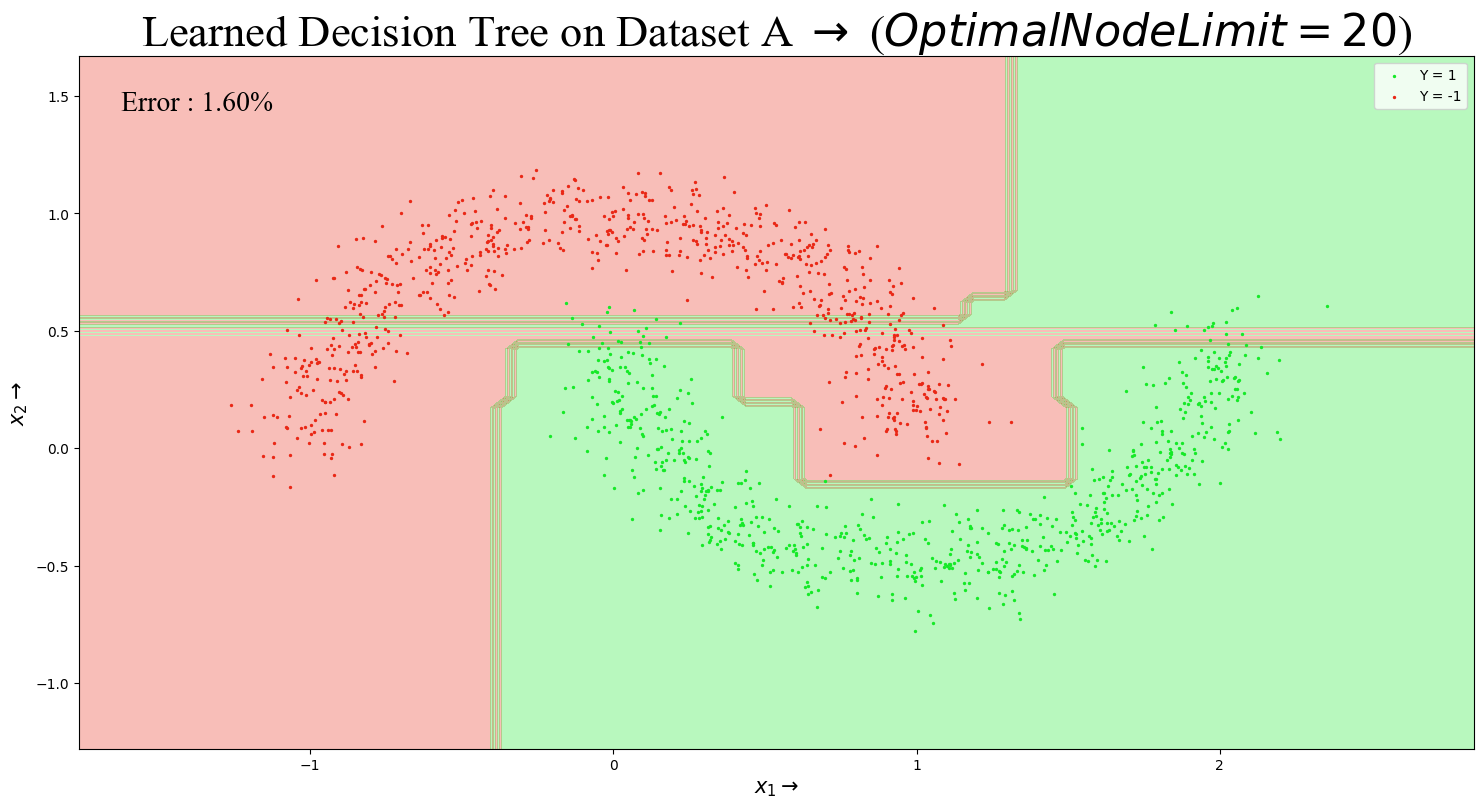

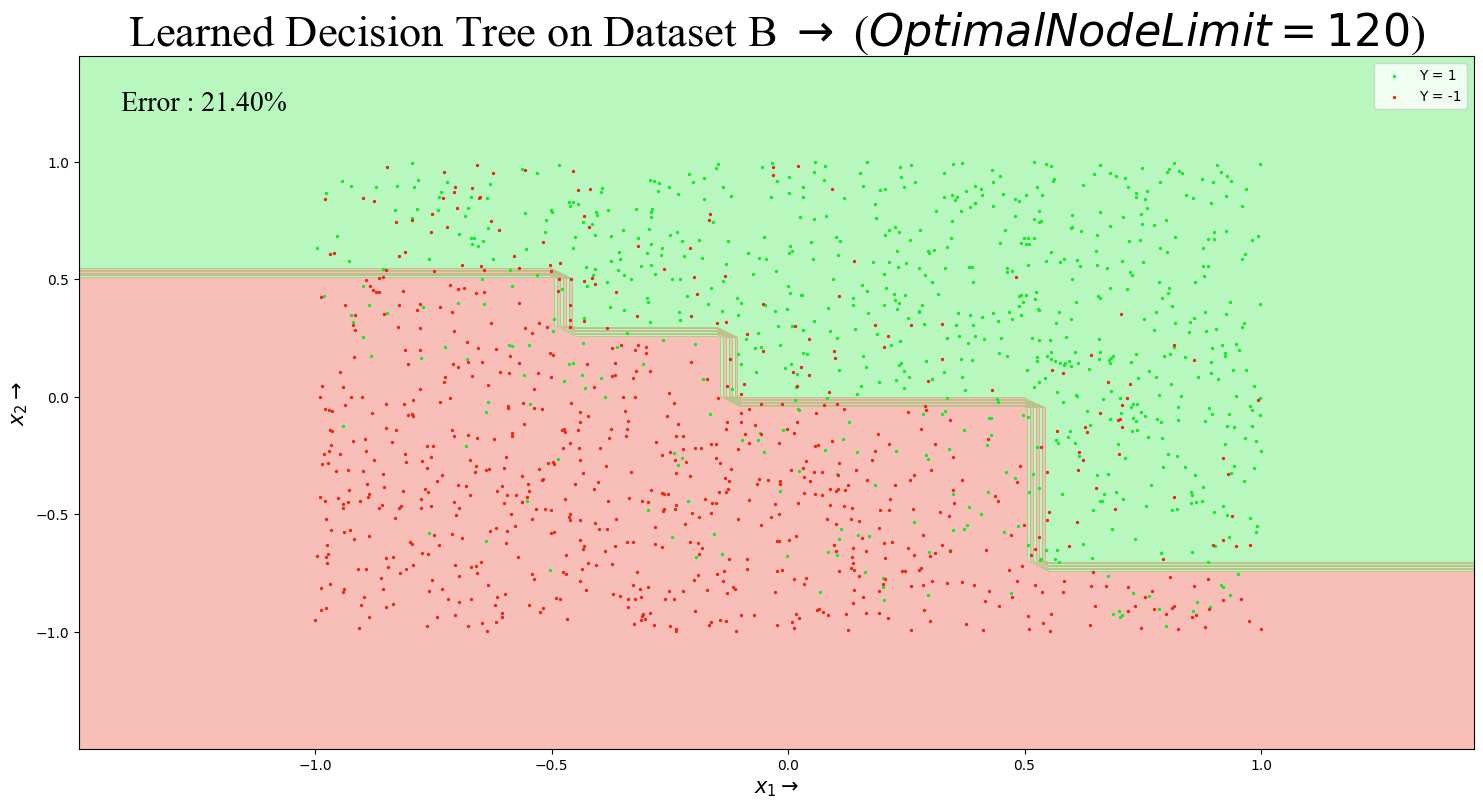

In [45]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

nodes_optimal = [20,120]

alph = ['A', 'B']

col = ['#E92816','#16E928']

for i in range(2):
    data_A = np.load('Data/dataset_'+alph[i]+'.npz')
    X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

    X_min = min(X_train[:,0]),min(X_train[:,1])
    X_max = max(X_train[:,0]),max(X_train[:,1])


    X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
    test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
    tree = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal[i], criterion='accuracy')
    pred_Y = eval_decision_tree(tree, test_samples)
    Y_err = 100*np.mean(Y_test!=eval_decision_tree(tree, X_test))

    # plt.figure(i)
    f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(18,9))
    ax1.contourf(X,Y,pred_Y.reshape(X.shape),colors=col, alpha = 0.3)
    ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c=col[1],label='Y = 1')
    ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c=col[0],label='Y = -1')
    ax1.set_title(r'Learned Decision Tree on Dataset {} $\rightarrow$ ($Optimal Node Limit = {}$)'.format(alph[i],nodes_optimal[i]),font = 'Times New Roman',size = 32)
    ax1.text(0.03,0.95,f'Error : {Y_err:.2f}%', verticalalignment='top', c = 'black', fontsize=20, font='Times New Roman', transform=ax1.transAxes)
    ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    ax1.legend() 
    plt.show()

**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [37]:
# CodeWrite cell
# Write Random Forest classifier. 
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. 
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    
    forest = []

    for iter in range(num_trees):
        
        sampled_indices = index_sampler(X_train, Y_train, a)
        sampled_features = feature_sampler(X_train, b)
        
        X_sampled = X_train[sampled_indices]
        Y_sampled = Y_train[sampled_indices]
        
        tree_dict = dict()
        create_branch_modified(X_sampled, Y_sampled, sampled_features, tree_dict, criterion, num_nodes_stop, 1)
        forest.append(tree_dict)
    
    return forest
    
def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    Y = np.zeros(len(test_X))
    
    for tree in random_forest:
        for i, x in enumerate(test_X):
            Y[i] += read_tree(x,tree)
    return np.sign(Y)

def entropy_of_split(X, Y, index, threshold, true_val):
    right_count = 0
    left_count = 0
    right_pl = 0
    left_pl = 0
    
    for x, y in zip(X[:, index], Y[:]):
        if x>=threshold:
            right_count += 1
            if y==true_val:
                right_pl += 1
        else:
            left_count += 1
            if y==true_val:
                left_pl += 1
    if left_count==0 or right_count==0: return 100
    return (right_count*h(right_pl/right_count) + left_count*h(left_pl/left_count))/(left_count+right_count)

def h(p):
    if p==1 or p==0:
        return 0
    return (-p*np.log2(p)) + (-(1-p)*np.log2(1-p))

def accuracy_of_split(X, Y, index, threshold, true_val):
    right_count = 0
    left_count = 0
    right_pl = 0
    left_pl = 0
    
    for x, y in zip(X[:, index], Y[:]):
        if x>=threshold:
            right_count += 1
            if y==true_val:
                right_pl += 1
        else:
            left_count += 1
            if y==true_val:
                left_pl += 1
                
    return ((left_count-left_pl) + (right_pl)) / (right_count+left_count)

def comparer(X, Y, index, threshold, true_val, method):
    if method == 'entropy':
        return -entropy_of_split(X, Y, index, threshold, true_val)
    else:
        temp = accuracy_of_split(X, Y, index, threshold, true_val)
        return max(temp, 1-temp)
    
def data_splitter(X, Y, index, threshold):
    X_left = X[X[:,index]<threshold]
    Y_left = Y[X[:,index]<threshold]
    X_right = X[X[:,index]>=threshold]
    Y_right = Y[X[:,index]>=threshold]
    
    return X_left, Y_left, X_right, Y_right

def branch_modified(X, Y, sampled_features, method):
    max_compare = -100
    optimal = [-1,-1,-1]
    for index in sampled_features:
        if max(X[:,index])-min(X[:,index])<0.01:
            continue
        selection_array = np.linspace(min(X[:,index]), max(X[:,index]),20+1)[1:-2]
        selection_array_2 = X[:,index]
        mini = min(X[:,index])
        for threshold in selection_array:
            if threshold==mini: continue
            comp = comparer(X, Y, index, threshold, +1, method)
            # print(f'{comp = } {index = } { threshold = }')
            if comp>max_compare:
                max_compare = comp
                optimal[0], optimal[1], optimal[2] = index, threshold, None
    if optimal == [-1,-1,-1]:
        print(X, Y)
    return optimal

def index_sampler(X, Y, a):
    m = len(X)
    
    sampled_indices = np.random.choice(range(m),int(a*m))
    return sampled_indices

def feature_sampler(X, b):
    d = len(X[0])
    
    sampled_features = np.random.choice(range(d),int(b*d))
    return sampled_features

def mode(arr):
    # if len(arr)<=0: return 1
    unique_elements, counts = np.unique(arr, return_counts=True)
    max_count_index = np.argmax(counts)
    return unique_elements[max_count_index]

def read_tree(x, tree_dict):
    tree_index = 1
    
    while tree_dict[tree_index][-1]==None:
        ind, thr, fin = tree_dict[tree_index]
        if x[ind]>=thr:
            tree_index = 2*tree_index+1
        else:
            tree_index = 2*tree_index
    
    return tree_dict[tree_index][-1]

def create_branch_modified(X, Y, sampled_features, tree, method, min_nodes, tree_index=1):
    # print(f'Running Create Branch with {tree = }')
    if len(Y)<1:
        print('OH NOOO')
        tree[tree_index] = (None, None, 0)
        return
    if len(Y)<=min_nodes:
        tree[tree_index] = (None, None, mode(Y))
        return
    if np.all(Y == Y[0]):
        tree[tree_index] = (None, None, Y[0])
        return
    
    optimal = branch_modified(X, Y, sampled_features, method)
    tree[tree_index] = tuple(optimal)
    # print(tree)
    X_left, Y_left, X_right, Y_right = data_splitter(X, Y, optimal[0], optimal[1])
    # if len(X_left)==0:
    #     print('OH NOOO')
    #     print(f'{min(X[:,optimal[0]]) = }  ||  {max(X[:,optimal[0]]) = }')
    #     # print(f'{Y = }')
    #     print(f'{optimal = }')
    # elif len(X_right)==0:
    #     print('OH RIGHT!!')

    create_branch_modified(X_left, Y_left, sampled_features, tree, method, min_nodes, tree_index*2)
    create_branch_modified(X_right, Y_right, sampled_features, tree, method, min_nodes, tree_index*2+1)
    return

In [38]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

alph = ['A', 'B', 'C', 'D']

for i in range(len(alph)):

    data1_1 = np.load('Data/dataset_'+alph[i]+'.npz')
    X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']

    num_trees = [[10]*8,
                 [10]*8,
                 [10]*8,
                 [10]*8,
                 ]
    
    num_nodes_hyperparam = [np.linspace(120,140,8,dtype=int),
                            np.linspace(120,140,8,dtype=int),
                            np.linspace(80,120,8,dtype=int),
                            np.linspace(20,60,8,dtype=int),
                            ]
        
    acc1 = np.zeros(len(num_nodes_hyperparam[i]))
    acc2 = np.zeros(len(num_nodes_hyperparam[i]))
    n = np.zeros(len(num_nodes_hyperparam[i]))
    val_X = X_train[0:200]
    val_Y = Y_train[0:200]
    X_train = X_train[200:]
    Y_train = Y_train[200:]
    # print(f'{alph[i] = }')
    for iter in range(len(num_nodes_hyperparam[i])):
        # print(num_nodes_hyperparam[iter])
        tree1 = train_random_forest(X_train, Y_train, num_trees[i][iter], num_nodes_stop=num_nodes_hyperparam[i][iter], criterion='accuracy')
        tree2 = train_random_forest(X_train, Y_train, num_trees[i][iter], num_nodes_stop=num_nodes_hyperparam[i][iter], criterion='entropy')
        pred_Y1 = eval_random_forest(tree1, val_X)  
        acc1[iter] = 1 - len(val_Y[val_Y==pred_Y1])/len(val_Y)
        pred_Y2 = eval_random_forest(tree2, val_X)
        acc2[iter] = 1 - len(val_Y[val_Y==pred_Y2])/len(val_Y)
    print(alph[i])
    print(num_nodes_hyperparam[i])
    print(acc1)
    print(acc2)
    print('################################')

A
[120 122 125 128 131 134 137 140]
[0.165 0.145 0.235 0.235 0.125 0.225 0.09  0.195]
[0.175 0.08  0.175 0.11  0.13  0.23  0.18  0.165]
################################
B
[120 122 125 128 131 134 137 140]
[0.25  0.215 0.355 0.225 0.42  0.26  0.275 0.36 ]
[0.35  0.29  0.245 0.24  0.22  0.28  0.365 0.355]
################################
C
[ 80  85  91  97 102 108 114 120]
[0.155 0.16  0.18  0.11  0.18  0.135 0.17  0.115]
[0.115 0.09  0.12  0.085 0.07  0.13  0.155 0.125]
################################
D
[20 25 31 37 42 48 54 60]
[0.1   0.11  0.095 0.105 0.095 0.09  0.105 0.12 ]
[0.11  0.125 0.105 0.11  0.15  0.115 0.115 0.125]
################################



---
### Accuracy:

Dataset | No. of trees | Max no. of nodes | Error
--- |--- |--- |---
A | 10 | 15 | $15\%$
B | 10 | 20 | $27\%$
C | 10 | 97 | $13\%$
D | 10 | 25 | $8.5\%$

### Entropy:

Dataset | No. of trees | Max no. of nodes | Error
--- |--- |--- |---
A | 10 | 15 | $15\%$
B | 10 | 20 | $26\%$
C | 10 | 114 | $8.5\%$
D | 10 | 48 | $8.5\%$


## Observations

- Higher number of trees lead to more number of decision boundaries and higher number of nodes lead to more slope changes, indicating ragged decision boundaries.
- for dataset A, as the data is clustered, therefore scope for clear decision boundary is achieved by larger no of nodes by making decision boundary ragged, and gives better accuracy on test data (also based on plots after next cell)
- For dataset B, data mixed a lot, not very clustered tendency, so more number of trees give more decision boundaries, and thus gives better accuracies on test data. 
- It is hard to make claims about dataset C and D as it is high dimensional and cannot be plotted.
- From empirical studies num_features = squareroot(total features) -1 gives the best results and has been used for this study.

---

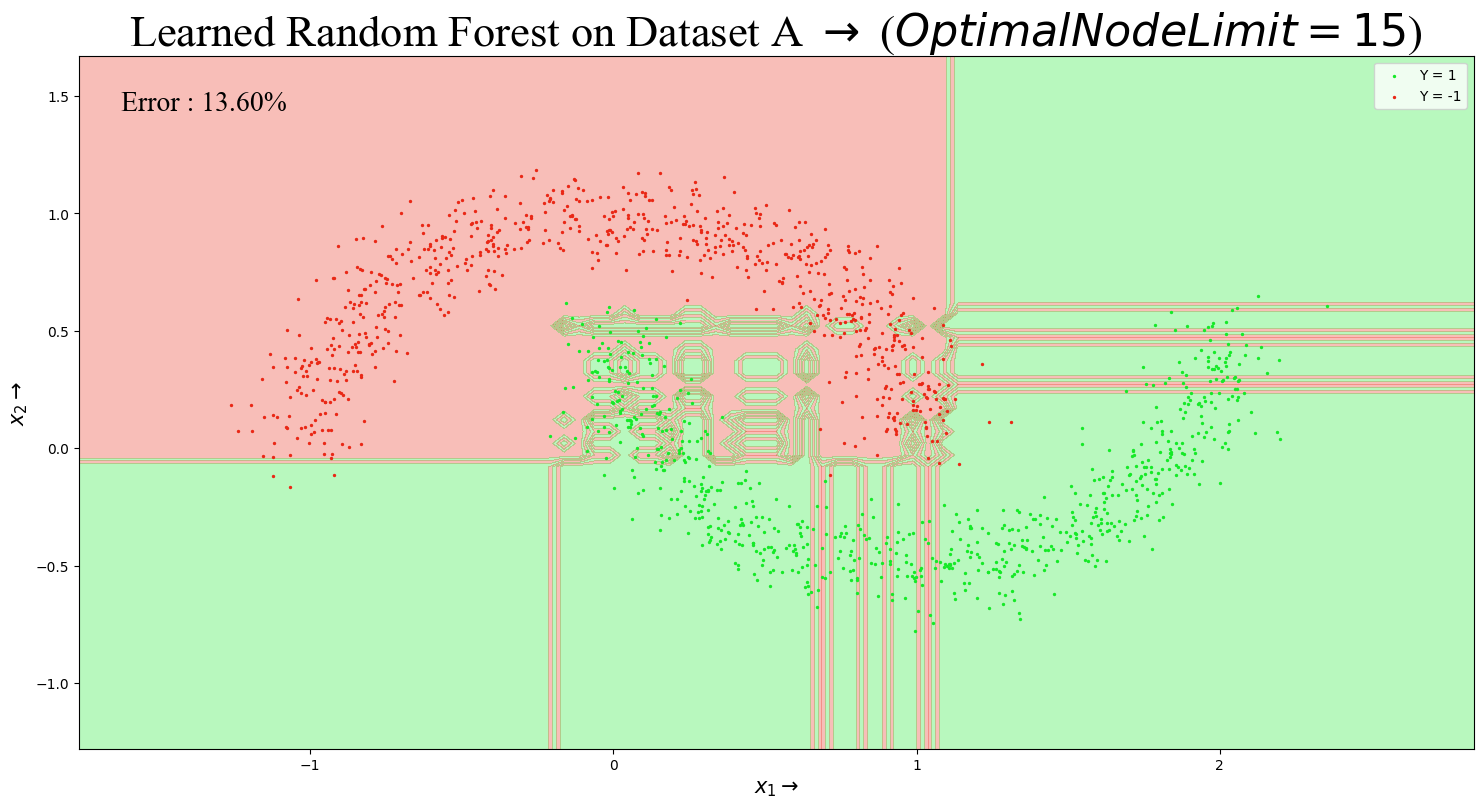

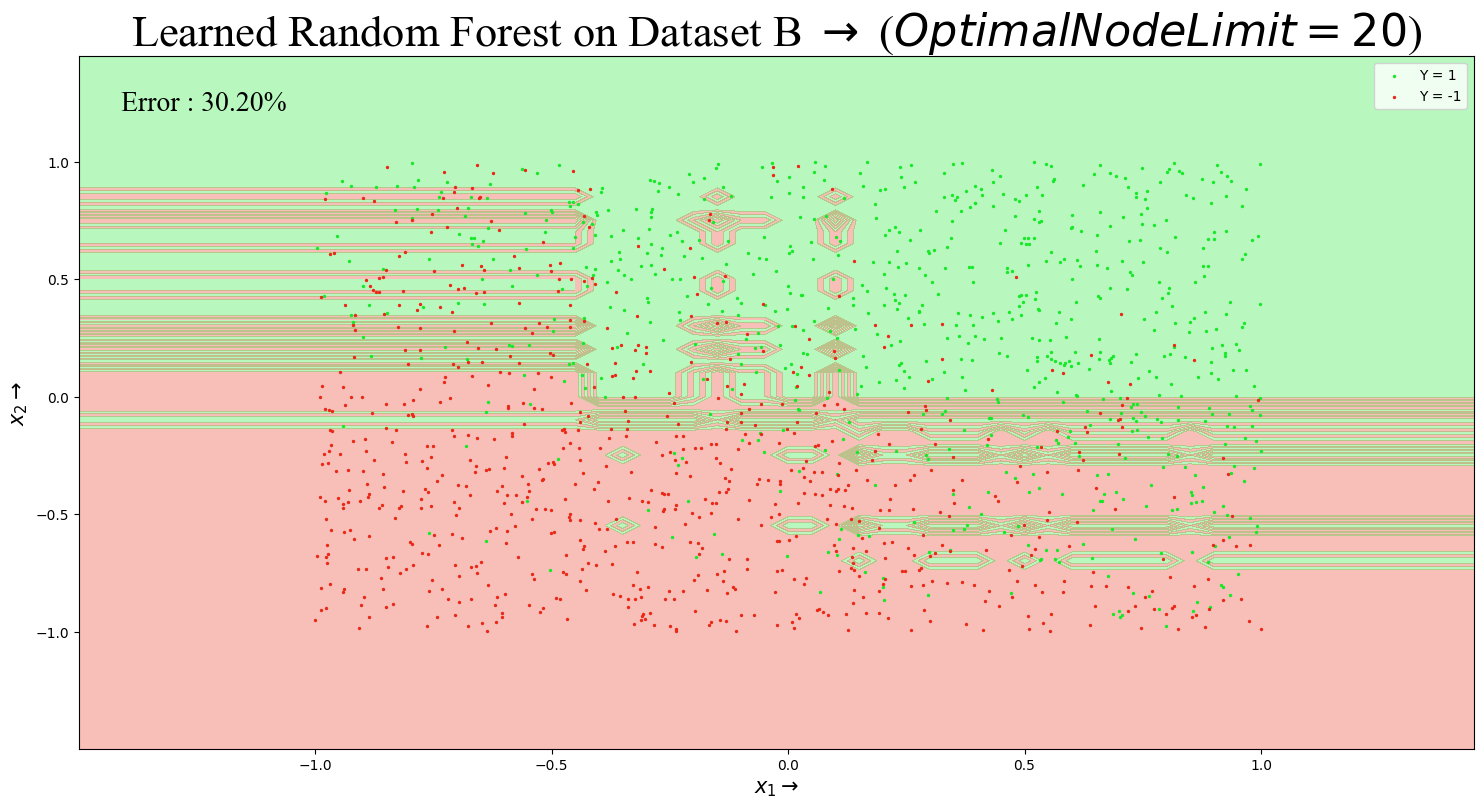

In [39]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

nodes_optimal = [15,20]
num_trees = [10,10]

alph = ['A', 'B']

col = ['#E92816','#16E928']

for i in range(2):
    data_A = np.load('Data/dataset_'+alph[i]+'.npz')
    X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

    X_min = min(X_train[:,0]),min(X_train[:,1])
    X_max = max(X_train[:,0]),max(X_train[:,1])


    X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
    test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
    forest = train_random_forest(X_train, Y_train, num_trees=num_trees[i],num_nodes_stop=nodes_optimal[i])
    pred_Y = eval_random_forest(forest, test_samples)
    Y_err = 100*np.mean(Y_test!=eval_random_forest(forest, X_test))

    # plt.figure(i)
    f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(18,9))
    ax1.contourf(X,Y,pred_Y.reshape(X.shape),colors=col, alpha = 0.3)
    ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c=col[1],label='Y = 1')
    ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c=col[0],label='Y = -1')
    ax1.set_title(r'Learned Random Forest on Dataset {} $\rightarrow$ ($Optimal Node Limit = {}$)'.format(alph[i],nodes_optimal[i]),font = 'Times New Roman',size = 32)
    ax1.text(0.03,0.95,f'Error : {Y_err:.2f}%', verticalalignment='top', c = 'black', fontsize=20, font='Times New Roman', transform=ax1.transAxes)
    ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    ax1.legend() 
    plt.show()

**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [2]:
# Codewrite cell
# Write code to run here (no plotting)




def one_node_tree(X, Y, X_test):  

  d = X.shape[1]
  min_thres = np.zeros((d,1))
  max_thres = np.zeros((d,1))
  for attr in range(d):
    min_thres[attr] = np.min(X[:,attr])
    max_thres[attr] = np.max(X[:,attr])

  split_count = 100
  tree = {}
  max = 0
  for attr in range(d):
    for i in range(split_count-1):
      step = (max_thres[attr]-min_thres[attr])*(i+1)/split_count
      decision_yes = Y[X[:,attr]>=min_thres[attr]+step]
      decision_no = Y[X[:,attr]<min_thres[attr]+step]
      decision_yes_pos = decision_yes[decision_yes==1]
      decision_no_neg = decision_no[decision_no==-1]
      acc_yes_pos = (len(decision_yes_pos)+len(decision_no_neg))/len(Y)
      acc_yes_neg = 1-acc_yes_pos

      if acc_yes_pos>acc_yes_neg:
        if acc_yes_pos>max:
          max = acc_yes_pos
          attribute_optimal = attr
          max_thresh = min_thres[attr]+step
          leaf = 1

      if acc_yes_neg>acc_yes_pos:
        if acc_yes_neg>max:
          max = acc_yes_neg
          attribute_optimal = attr
          max_thresh = min_thres[attr]+step
          leaf = -1

  n = X_test.shape[0]
  pred_y_test = np.zeros((n,1))
  for i in range(n):
    if X_test[i][attribute_optimal]>=max_thresh:
      pred_y_test[i] = leaf
    if X_test[i][attribute_optimal]<max_thresh:
      pred_y_test[i] = -1*leaf

  n = X.shape[0]
  pred_y_train = np.zeros((n,1))
  for i in range(n):
    if X[i][attribute_optimal]>max_thresh:
      pred_y_train[i] = leaf
    if X[i][attribute_optimal]<max_thresh:
      pred_y_train[i] = -1*leaf

  return pred_y_test.reshape(-1,1), pred_y_train.reshape(-1,1)

def weak_learner2and3(X, Y,max_nodes):

#Returns a decision tree trained on X and Y. 
#Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
#Split criterion can be either 'accuracy' or 'entropy'.
#Returns a tree (In whatever format that you find appropriate)


  attribute_number = X.shape[1]
  min_threshold = np.zeros(attribute_number)
  max_threshold = np.zeros(attribute_number)

  for i in range(attribute_number):

    min_threshold[i] = np.min(X[:,i])
    max_threshold[i] = np.max(X[:,i])
    
  tree = {}

  split_count = 50
  node = 1
  
  Y_new = Y
  X_new = X
  nodes = 0
  while node>0:
    max = 0
    for attribute_choice in range(attribute_number):
      for i in range(split_count-1):
        step = (max_threshold[attribute_choice]-min_threshold[attribute_choice])*(i+1)/split_count
        decision_yes = Y_new[X_new[:,attribute_choice]>=min_threshold[attribute_choice]+step]
        decision_no = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
        decision_yes_pos = decision_yes[decision_yes==1]
        decision_no_neg = decision_no[decision_no==-1]
        acc_yes_pos = (len(decision_yes_pos)+len(decision_no_neg))
        acc_yes_neg = len(Y_new)-acc_yes_pos

        
        if acc_yes_pos>acc_yes_neg:
          if acc_yes_pos>max:
              max = acc_yes_pos
              attribute_optimal = attribute_choice
              max_thres = min_threshold[attribute_choice]+step
              leaf = '1'
              Y_new_temp = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
              X_new_temp = X_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]

        if acc_yes_neg>acc_yes_pos:
          if acc_yes_neg>max:
              max = acc_yes_neg
              attribute_optimal = attribute_choice
              max_thres = min_threshold[attribute_choice]+step
              leaf = '-1'
              
              Y_new_temp = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
              X_new_temp = X_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]

    if node >= max_nodes:
      
      tree[node] = [attribute_optimal,max_thres,'none']
      if leaf=='1':
        tree[node+3] = ['none','none','1']
        tree[node+2] = ['none','none','-1']
      if leaf=='-1':
        tree[node+3] = ['none','none','-1']
        tree[node+2] = ['none','none','1']

      break;
    
    if node>1:

      tree[node] = [attribute_optimal,max_thres,'none']
      tree[node+3] = ['none','none',leaf]
      node = node + 2

    if node==1:
      
      tree[node] = [attribute_optimal,max_thres,'none']
      tree[node+2] = ['none','none',leaf]
      node = node + 1
    
    Y_new = Y_new_temp
    X_new = X_new_temp
    max_threshold[attribute_optimal] = max_thres
        
  

  return tree

def eval_decision_tree(tree, test_X):

#Takes in a tree, and a bunch of instances X and 
#returns the tree predicted values at those instances.

  nodes = len(tree)
  pred_Y = np.zeros((test_X.shape[0]))

  for k in range(test_X.shape[0]):
    next_node = 1
    while next_node<=nodes :
      if tree[next_node][0]=='none':
        if tree[next_node][2]=='1':
          pred_Y[k] = 1
        if tree[next_node][2]=='-1':
          pred_Y[k] = -1
        break;
      attr_choice = tree[next_node][0]
      threshold = tree[next_node][1]
      if test_X[k,attr_choice]>= threshold:
        if next_node > 1:
          next_node = next_node + 3
        if next_node == 1:
          next_node = next_node + 2
      if test_X[k,attr_choice] < threshold:
        if next_node > 1:
          next_node = next_node + 2
        if next_node == 1:
          next_node = next_node + 1   
      
  return pred_Y.reshape(-1,1)

def adaboost(X_train, Y_train, X_test, Y_test, iter, learner_choice):

  n_orig = X_train.shape[0]
  weights = np.ones(n_orig)
  sum_train = np.zeros((n_orig,1))
  sum_test = np.zeros((X_test.shape[0],1))
  test_err = np.zeros((iter,1))
  train_err = np.zeros((iter,1))

  
  X_new = X_train
  Y_new = Y_train
  for t in range(iter):
      if learner_choice == 1:
        pred_y_test, pred_y_train = one_node_tree(X_new, Y_new, X_test)
      elif learner_choice == 2:
        tree = weak_learner2and3(X_new, Y_new,3)
        pred_y_test = eval_decision_tree(tree,X_test)
        pred_y_train = eval_decision_tree(tree,X_new)
      elif learner_choice == 3:
        tree = weak_learner2and3(X_new, Y_new,7)
        pred_y_test = eval_decision_tree(tree,X_test)
        pred_y_train = eval_decision_tree(tree,X_new)
      gamma = (len(Y_new[Y_new==pred_y_train]))/len(Y_new) - 0.5
      beta = (0.5+gamma)/(0.5-gamma)
      for i in range(len(weights)):
        weights[i] *= beta**(0.5*abs(pred_y_train[i]-Y_new[i]))
      weights = np.round_(weights)
      X_new_temp = X_new 
      Y_new_temp = Y_new.reshape(-1,1)
      for i in range(n_orig):
        if weights[i]>1:
          a = np.repeat(X_new[i,:].reshape(-1,1).T,int(weights[i]),axis = 0)
          b = np.repeat(Y_new[i,:].reshape(-1,1).T,int(weights[i]),axis = 0)
          X_new_temp = np.vstack((X_new_temp,a))
          Y_new_temp = np.vstack((Y_new_temp,b))
      X_new = X_new_temp
      Y_new = Y_new_temp
      
      
      sum_test += np.log(beta)*pred_y_test
      sum_train += np.log(beta)*pred_y_train[:n_orig]
      y_comb_test = np.sign(sum_test)
      y_comb_train = np.sign(sum_train)
      test_err[t] = 1 - (len(Y_test[Y_test == y_comb_test]))/len(Y_test)
      Y_orig = Y_train[:n_orig].reshape(-1,1)
      train_err[t] = 1 - (len(Y_orig[Y_orig == y_comb_train]))/n_orig

  return test_err, train_err, y_comb_test

C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\3504893291.py:208: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i] *= beta**(0.5*abs(pred_y_train[i]-Y_new[i]))
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:9: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 1)
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:10: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 2)
C:\Users\Achyutha Munimakula\AppDat

<Figure size 640x480 with 0 Axes>

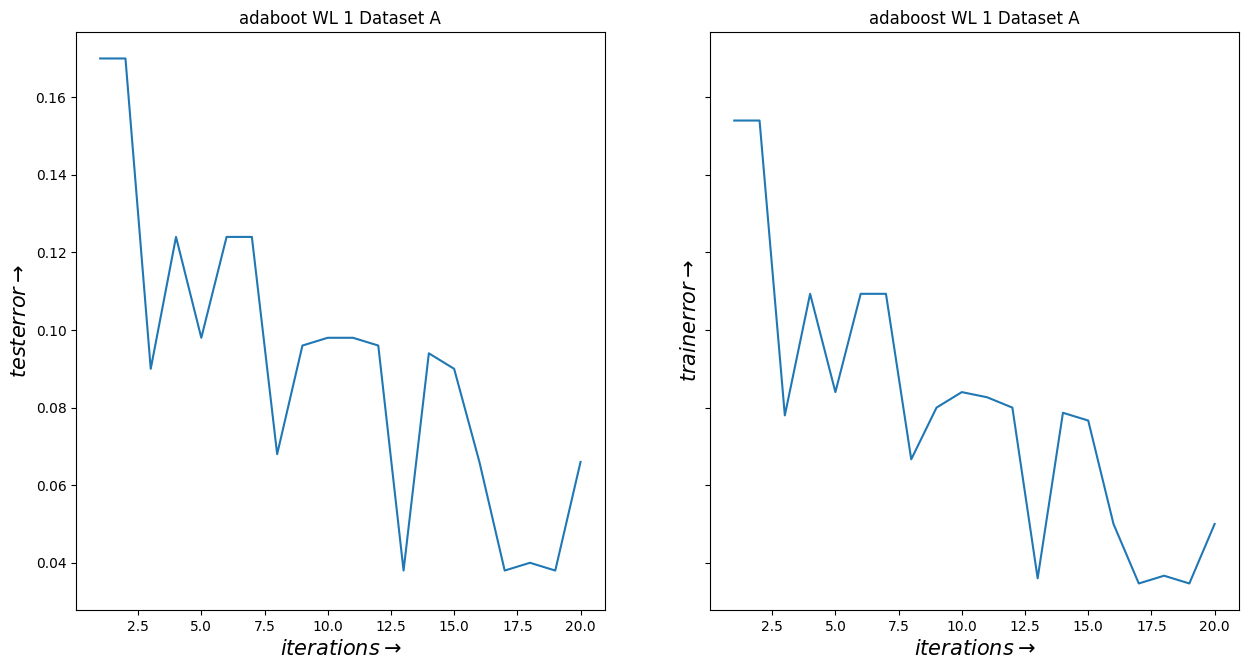

<Figure size 640x480 with 0 Axes>

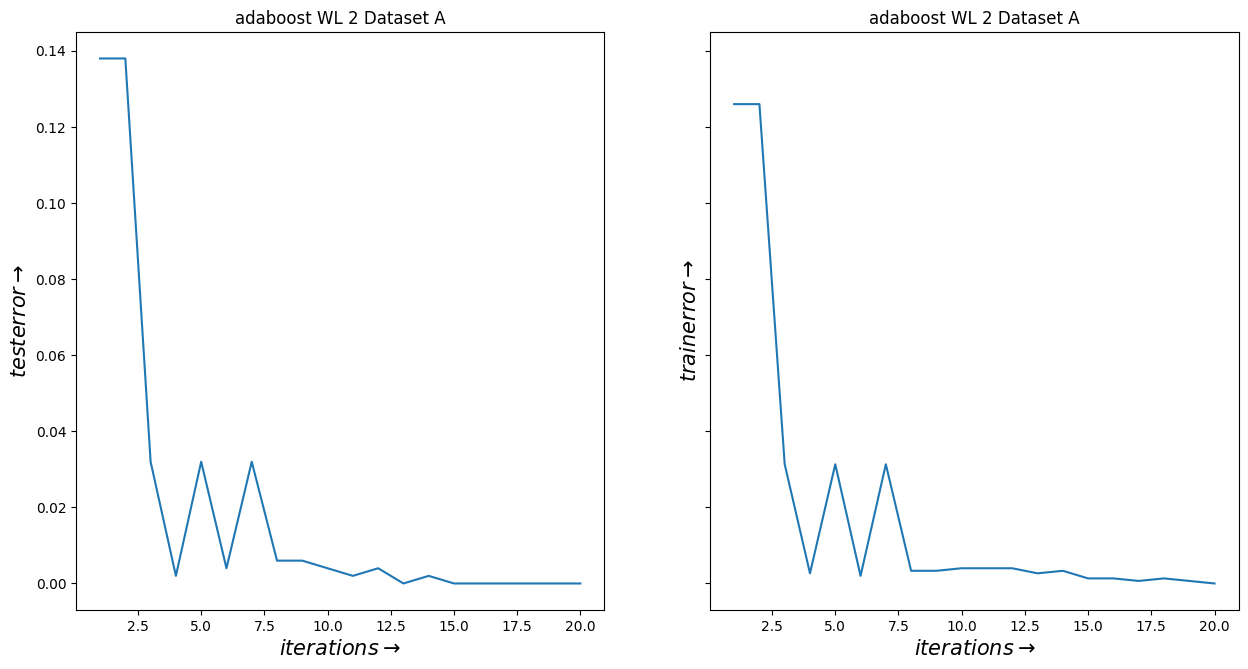

<Figure size 640x480 with 0 Axes>

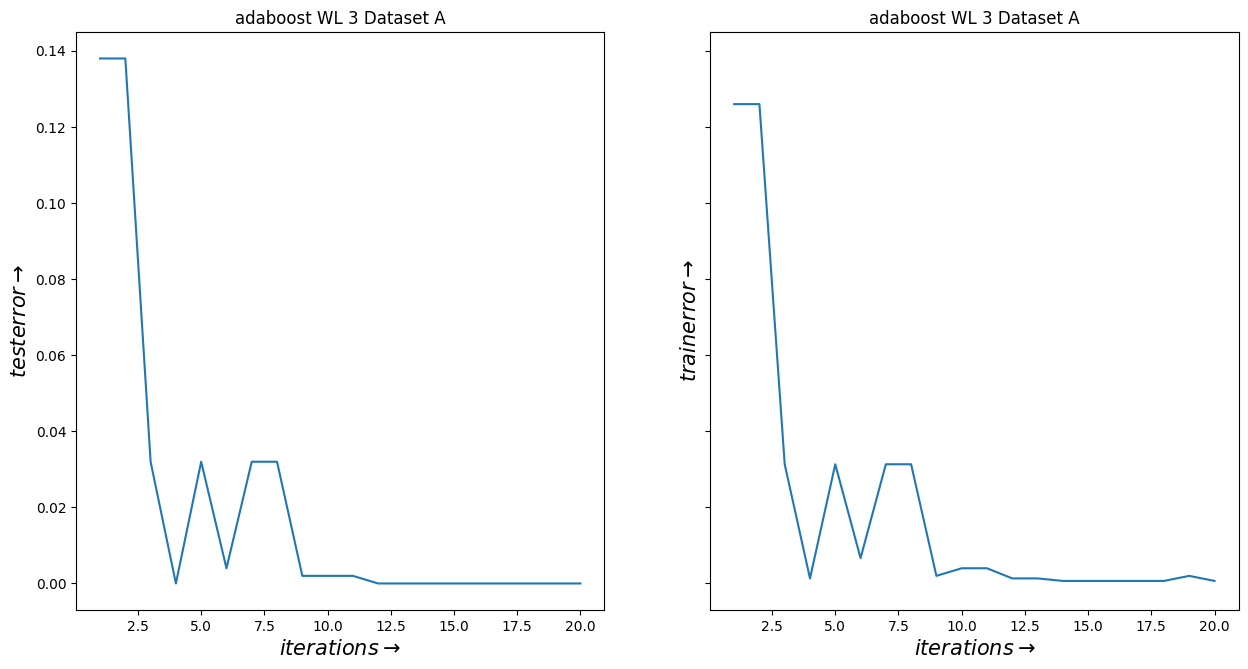

C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:59: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 1)
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:60: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 2)
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:61: DeprecationW

<Figure size 640x480 with 0 Axes>

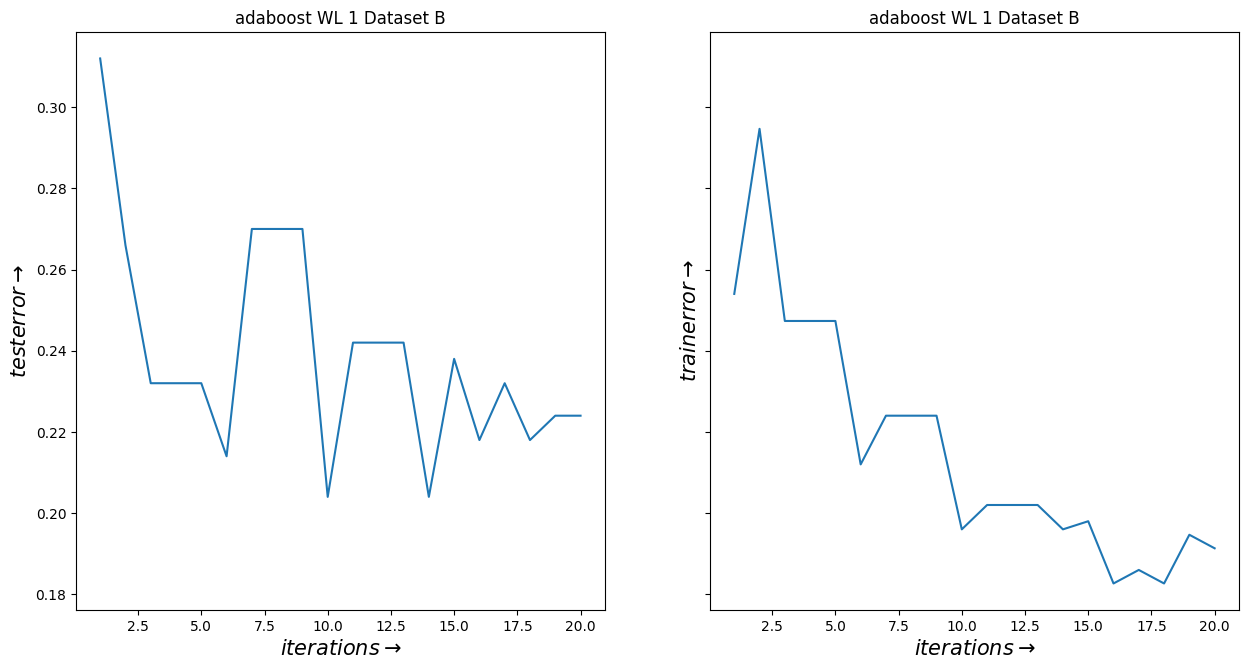

<Figure size 640x480 with 0 Axes>

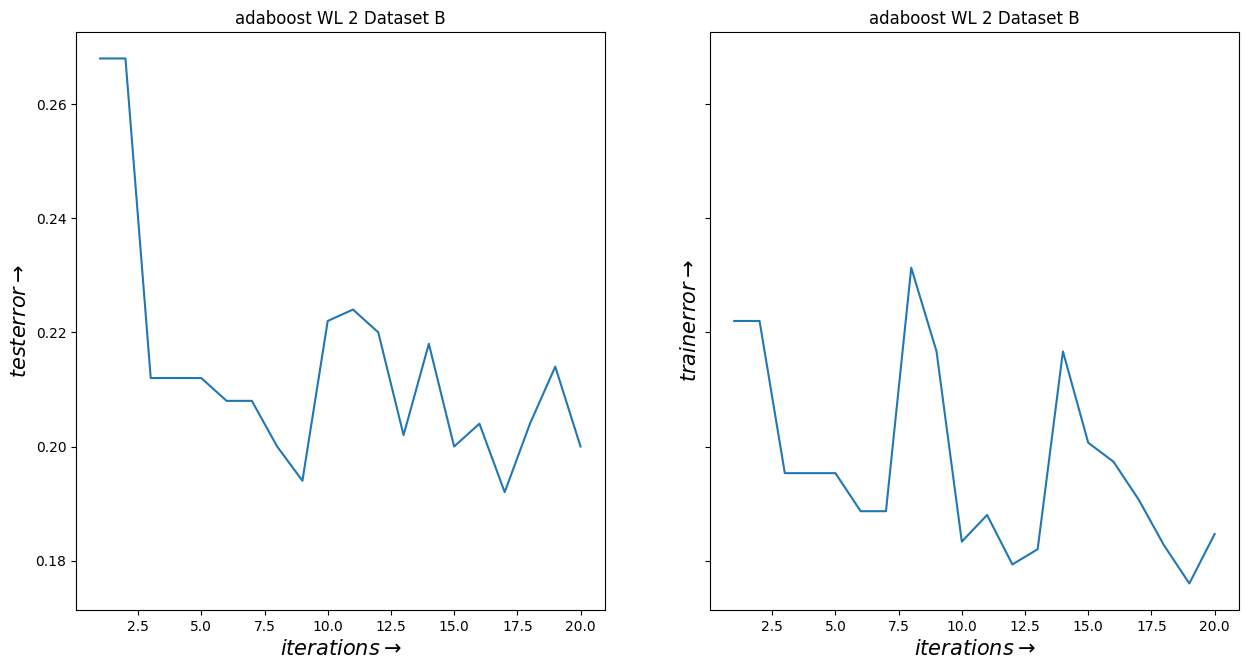

<Figure size 640x480 with 0 Axes>

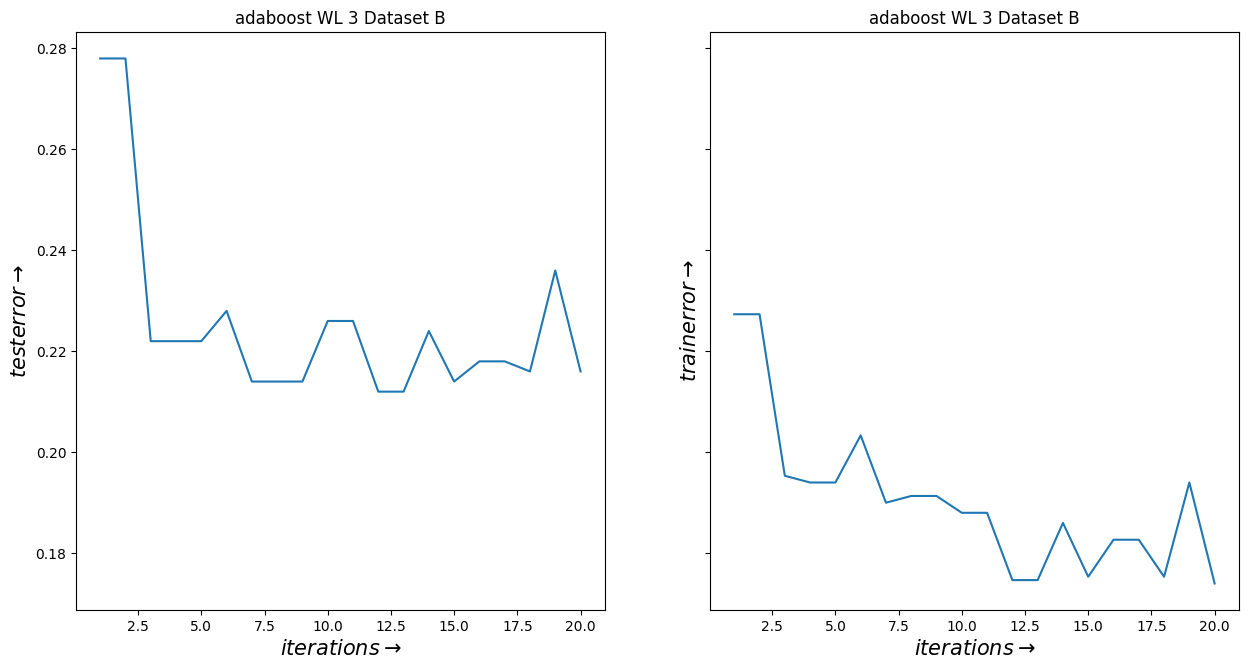

C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:109: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:110: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 2)
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:111: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 3)
No artists with labels found to put in legend.  Note that artists whose label start with an

<Figure size 640x480 with 0 Axes>

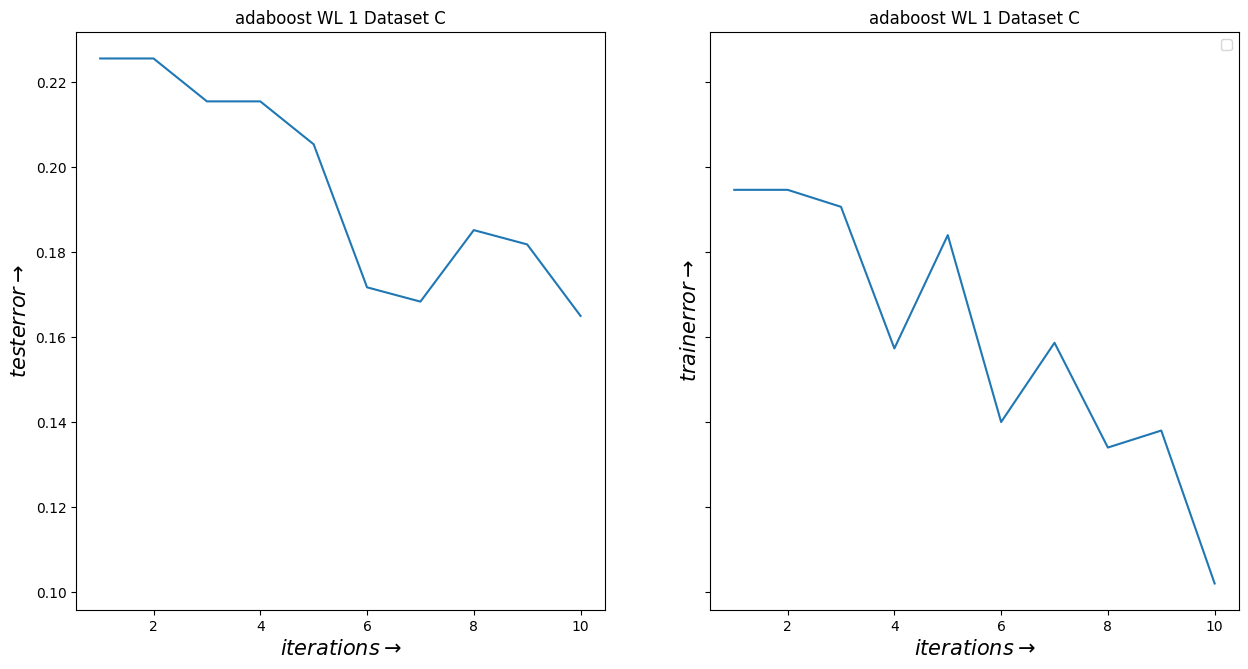

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

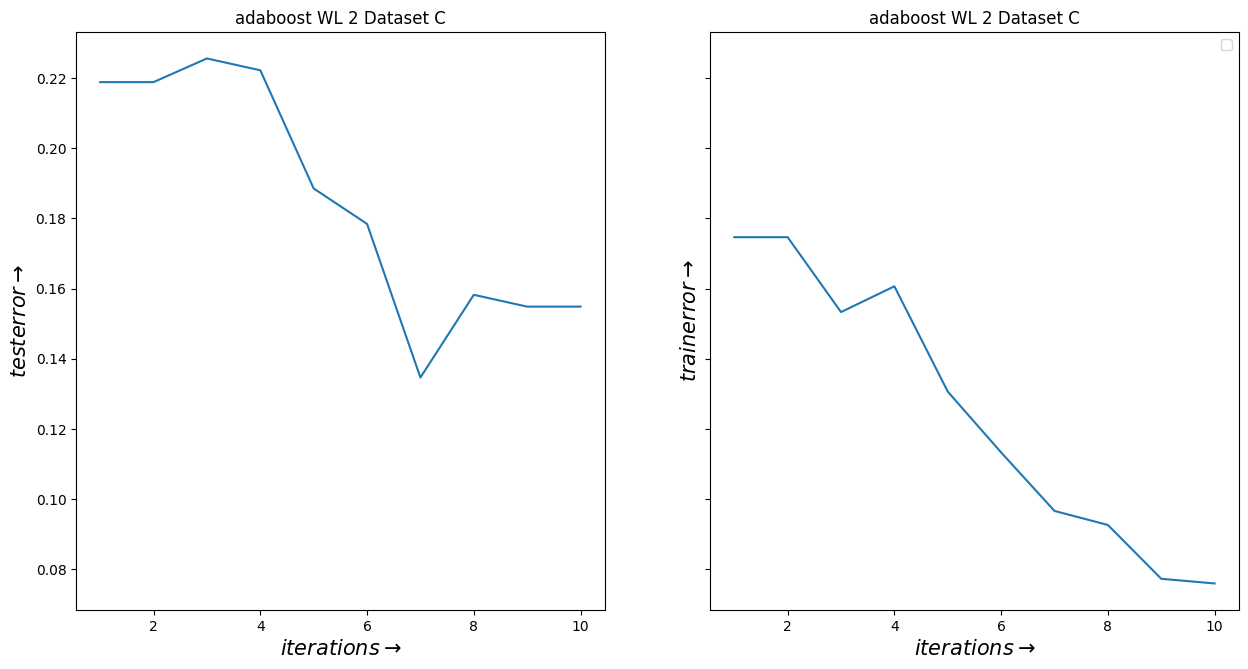

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

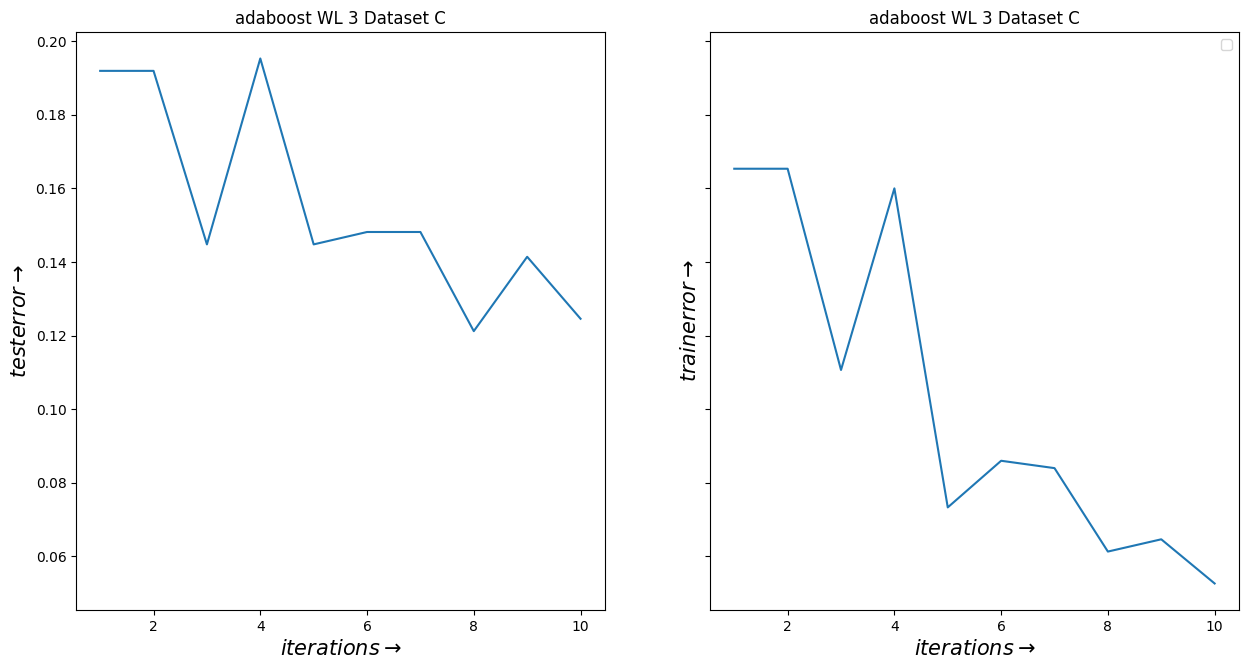

C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:159: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:160: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 2)
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_34572\2681387922.py:161: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 3)
No artists with labels found to put in legend.  Note that artists whose label start with an

<Figure size 640x480 with 0 Axes>

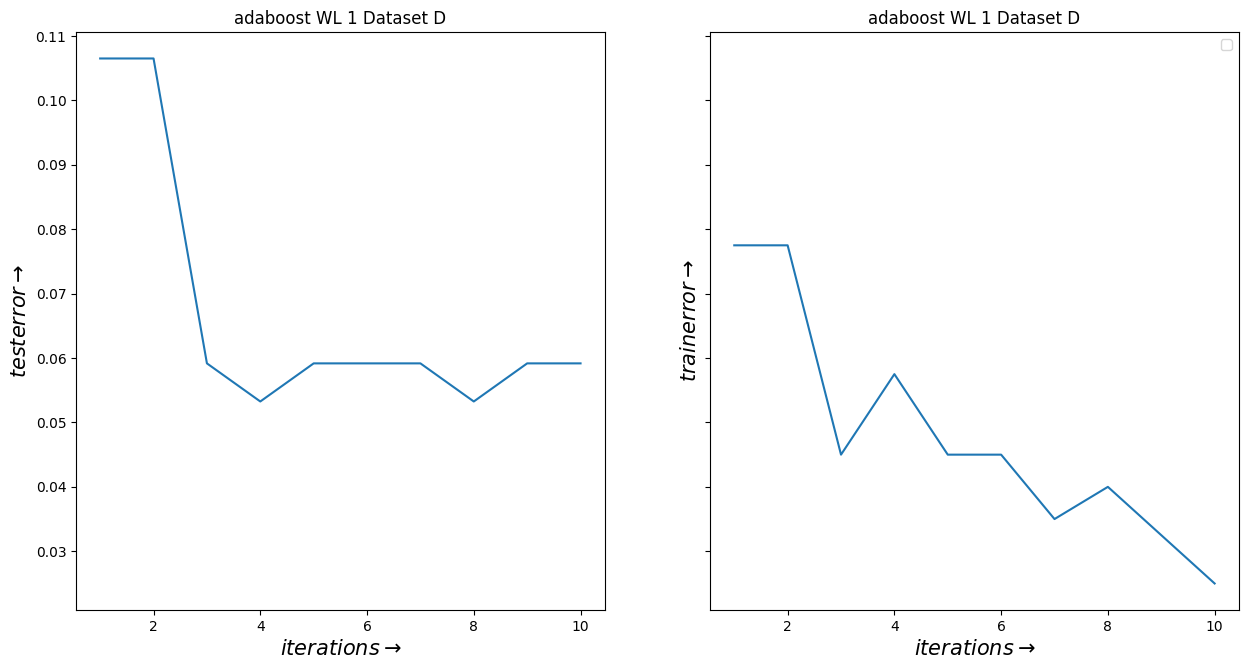

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

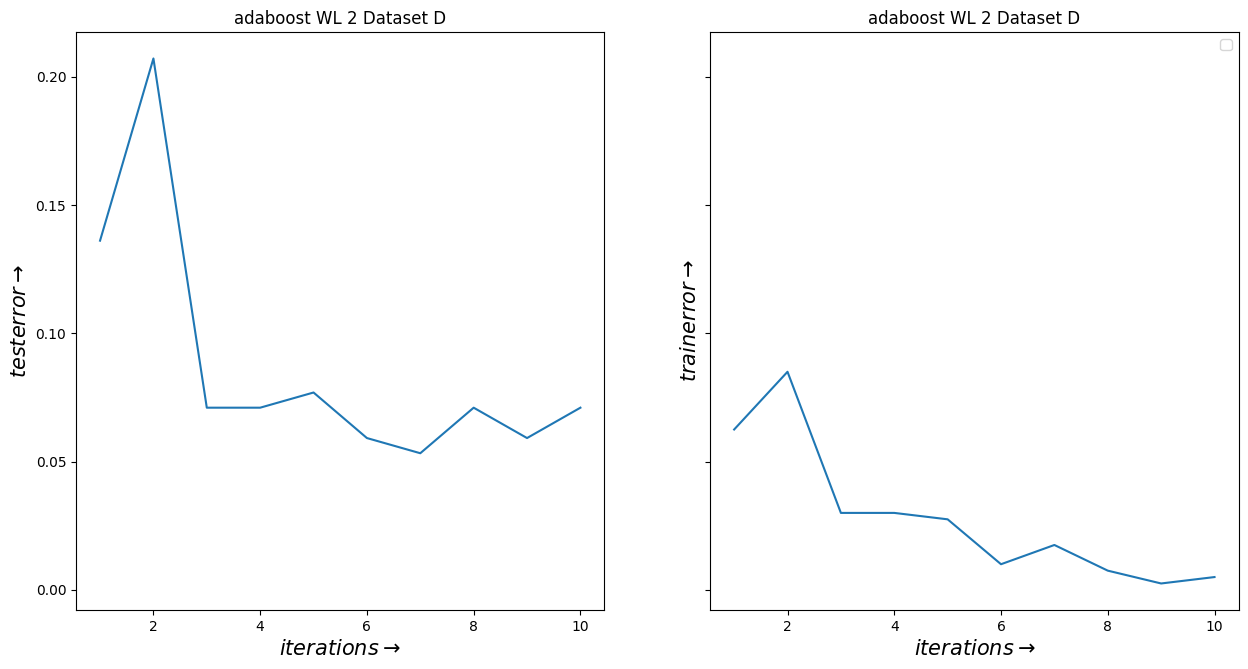

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

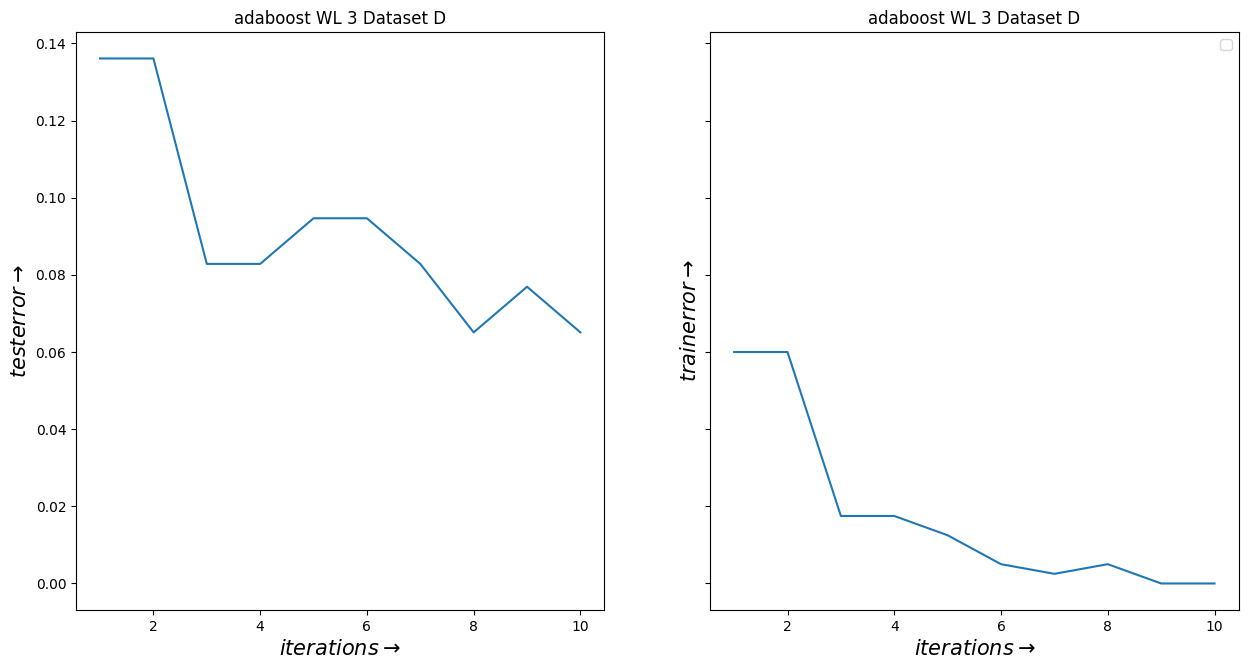

In [11]:
# Codewrite cell 
# Plots for iteration vs error here

# Codewrite cell princeton
# Plots for iteration vs error here
time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
data_A = np.load('Data/dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 3)

plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a1)
ax1.set_title('adaboot WL 1 Dataset A')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b1)
ax2.set_title('adaboost WL 1 Dataset A')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a2)
ax1.set_title('adaboost WL 2 Dataset A')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b2)
ax2.set_title('adaboost WL 2 Dataset A')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

plt.figure(2)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a3)
ax1.set_title('adaboost WL 3 Dataset A')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b3)
ax2.set_title('adaboost WL 3 Dataset A')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

data_A = np.load('Data/dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)

[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 3)

plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a1)
ax1.set_title('adaboost WL 1 Dataset B')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b1)
ax2.set_title('adaboost WL 1 Dataset B')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a2)
ax1.set_title('adaboost WL 2 Dataset B')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b2)
ax2.set_title('adaboost WL 2 Dataset B')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

plt.figure(2)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a3)
ax1.set_title('adaboost WL 3 Dataset B')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b3)
ax2.set_title('adaboost WL 3 Dataset B')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()


data_A = np.load('Data/dataset_C.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
time = [1,2,3,4,5,6,7,8,9,10]
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 3)

plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a1)
ax1.set_title('adaboost WL 1 Dataset C')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b1)
ax2.set_title('adaboost WL 1 Dataset C')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a2)
ax1.set_title('adaboost WL 2 Dataset C')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b2)
ax2.set_title('adaboost WL 2 Dataset C')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

plt.figure(2)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a3)
ax1.set_title('adaboost WL 3 Dataset C')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b3)
ax2.set_title('adaboost WL 3 Dataset C')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()
data_A = np.load('Data/dataset_D.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 3)

plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a1)
ax1.set_title('adaboost WL 1 Dataset D')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b1)
ax2.set_title('adaboost WL 1 Dataset D')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a2)
ax1.set_title('adaboost WL 2 Dataset D')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b2)
ax2.set_title('adaboost WL 2 Dataset D')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

plt.figure(2)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a3)
ax1.set_title('adaboost WL 3 Dataset D')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b3)
ax2.set_title('adaboost WL 3 Dataset D')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_38560\3504893291.py:208: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i] *= beta**(0.5*abs(pred_y_train[i]-Y_new[i]))
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_38560\2689817611.py:20: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a, b, y1] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, np.ones_like(test_samples[:,0]).reshape(-1,1), 20, 1)
C:\Users\Achyutha Munimakula\AppData\Local\Temp\ipykernel_38560\2689817611.py:21: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  [a, b, y2] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, np.ones_like(test_samples[:,0]

<Figure size 640x480 with 0 Axes>

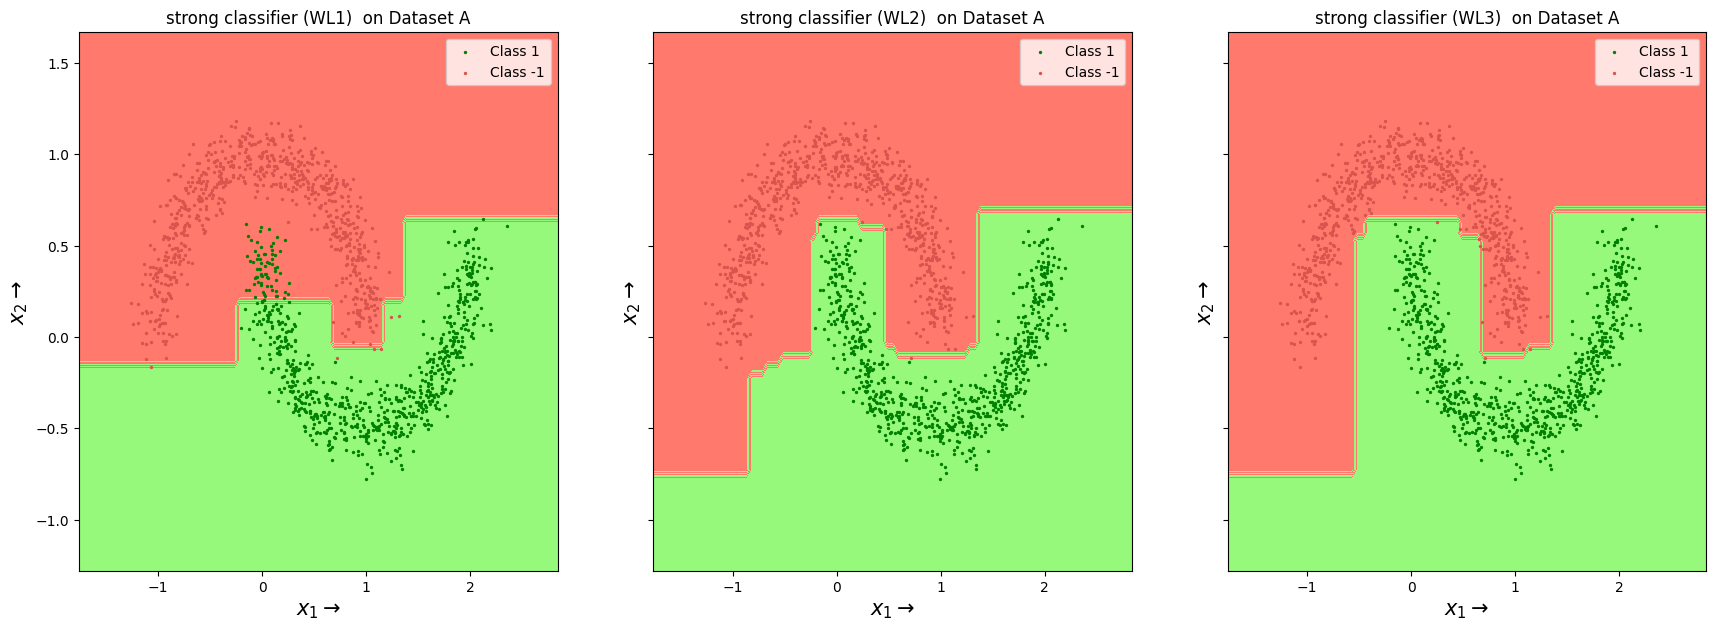

<Figure size 640x480 with 0 Axes>

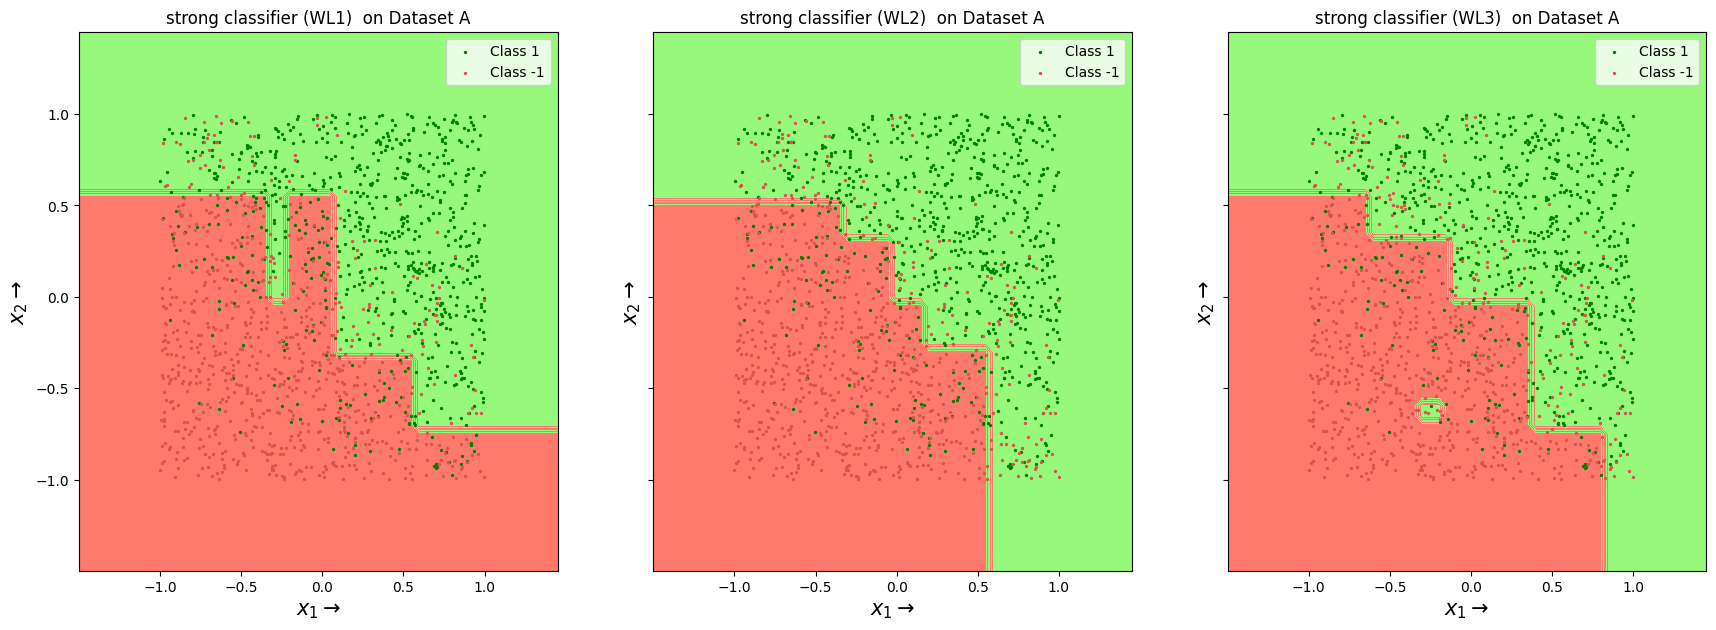

In [6]:
# Codewrite cell 
# Plots for illustrating the classifier here

# Codewrite cell 
# Plots for illustrating the classifier here
alph = ['A', 'B']

col = ['#E92816','#16E928']

for i in range(2):
    data_A = np.load('Data/dataset_'+alph[i]+'.npz')
    X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

    X_min = min(X_train[:,0]),min(X_train[:,1])
    X_max = max(X_train[:,0]),max(X_train[:,1])


    X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
    test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
    [a, b, y1] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, np.ones_like(test_samples[:,0]).reshape(-1,1), 20, 1)
    [a, b, y2] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, np.ones_like(test_samples[:,0]).reshape(-1,1), 20, 2)
    [a, b, y3] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, np.ones_like(test_samples[:,0]).reshape(-1,1), 20, 3)

    plt.figure(0)
    f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(21,7))
    ax1.contourf(X,Y,y1.reshape(X.shape),colors=['#ff796c','#96f97b'])
    ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
    ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
    ax1.set_title('strong classifier (WL1)  on Dataset A')
    ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    ax1.legend() 


    ax2.contourf(X,Y,y2.reshape(X.shape),colors=['#ff796c','#96f97b'])
    ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
    ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
    ax2.set_title('strong classifier (WL2)  on Dataset A')
    ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    ax2.legend() 


    ax3.contourf(X,Y,y3.reshape(X.shape),colors=['#ff796c','#96f97b'])
    ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
    ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
    ax3.set_title('strong classifier (WL3)  on Dataset A')
    ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    ax3.legend() 
    plt.show()


---

Observations :
- As mathematically calculated, the error tends to decrease as the number of iterations increases.
- The following are the optimal hyperparameters found for the Datasets:

| Dataset / hyper-params | error-type | depth | test-error (%)| train-error (%)
| --- | --- | --- | --- | --- |
|*Dataset_A*|accuracy|7| 0 | 0 |
|*Dataset_B*|accuracy|7| 21 | 17 |
|*Dataset_C*|accuracy|7| 12 | 5 |
|*Dataset_D*|accuracy|7| 7 | 0 |


---

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set. 

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional). 




In [41]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs
    
    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

In [42]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need 
# like evaluating the mean squared error or the gradient w.r.t. w

data_A = np.load('Data/LassoReg_data.npz')
X_main, Y_main = data_A['arr_0'],data_A['arr_1']
len(X_main)
X_train, Y_train, X_val, Y_val, X_test, Y_test = X_main[:60], Y_main[:60], X_main[60:90], Y_main[60:90], X_main[90:], Y_main[90:]

def grad_w(X,W,y):
    return X.T @ (X@W - y)

def mean_loss(X,W,y):
    t = X@W-y
    l = len(y)
    v = np.linalg.norm(t)
    return (2/l)*(v)


In [43]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set

#Function to run the gradient descent algorithm
def grad_des(X,W,y,lr,l1_norm,max_iter):
    
    Wd = W
    
    for _ in range(max_iter):
        
        grad = grad_w(X,W,y)

        Wd1 = Wd - lr*grad

        Wd = projection_oracle_l1(Wd1 , l1_norm)
        
        if (Wd == W).all():
            break
    
    return Wd

w = np.zeros([1000,])

learn_rates = [0.01 , 0.001 , 1e-4 , 1e-5 , 1e-6 , 1e-7 , 1e-8]
l1_radii = [0.1 , 0.5 , 0.7 , 0.9 , 1 , 5 , 10 ,20]
max_iters  = [100 , 1000]
optimal = dict()
best_err = float('inf')


for learn_rate in learn_rates:
    
    for l1_radius in l1_radii:
        
        for max_iter in max_iters:
            
            
            w1 = grad_des(X_train , w , Y_train , lr= learn_rate , l1_norm = l1_radius , max_iter = max_iter)
            loss_train  =  mean_loss(X_train , w1 , Y_train)
            # print(f'\n{learn_rate = :>5} || {l1_radius = :>5} || {max_iter = :>5} || {loss_train = :>10.5f}')

            #Using validation loss to find the best hyperparameters
            loss_val = mean_loss(X_val , w1 , Y_val)
            if loss_val<best_err:
                best_err=loss_val
                opt_w = w1
                optimal['learn_rate'] = learn_rate
                optimal['l1_radius'] = l1_radius
                optimal['max_iter'] = max_iter
                # print(f'\n{loss_val = }')
                # print(f'{optimal = }')
                # print(f'{opt_w[:10] = }')
                
            # print(f'\n - {learn_rate = :>5} || {l1_radius = :>5} || {max_iter = :>5} ||   {loss_val = :>10.5f}')

            #Calculating the test loss using the hyperparameters
            loss_test = mean_loss(X_test , w1 , Y_test)
            # print(f'\n{learn_rate = :>5} || {l1_radius = :>5} || {max_iter = :>5} ||  {loss_test = :>10.5f}')


loss_test = mean_loss(X_test , opt_w , Y_test)
print(f'\n{loss_test = }')
print(f'{optimal = }')
print(f'{opt_w[:10] = }')



loss_test = 0.16110946509271726
optimal = {'learn_rate': 0.01, 'l1_radius': 0.9, 'max_iter': 100}
opt_w[:10] = array([ 0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0.])



---
### Observations :

- After iterating through all the selected values for Learning Rate, Max. Iterations and L1 Radii, the optimal values were found to be:
    - Optimal Learning Rate = 0.01
    - Optimal L1 Radius = 0.9
    - Optimal Max. Iterations = 100

- First $10$ terms of $Optimal$ $W =$ $\begin{bmatrix} 0 & -0 & 0 & 0 & 0 & -0 & -0 & -0 & -0 & -0 \\ \end{bmatrix}$

- The Loss encountered with this $optimal$ $W$ is $0.1611$ .

---